## Preparing data

In [4]:
import torch
import sys 
sys.path.append('/home/louis/Documents/Master_project/social-nce/')
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from crowd_nav.utils.dataset import ImitDataset, ImitDatasetTraj
from crowd_nav.policy.sail_traj import ExtendedNetworkTraj
from crowd_nav.policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs

In [6]:
data = torch.load('../data/demonstrate/data_imit.pt')

In [9]:
type(data[1]), data[1].shape, data[0].shape

(torch.Tensor, torch.Size([420845, 5, 4]), torch.Size([420845, 6]))

In [4]:
data[0][40]

tensor([ 0., -4.,  0.,  0.,  0.,  4.])

In [5]:
len(data[0])

420845

In [6]:
human_pos_per_ep = []
prev_val = data[3][0].item()
ep_pos = []
for i in range(len(data[0])) :
    hum_pos, val = data[1][i], data[3][i]
    if abs(val.item()-prev_val) > 1e-1 :
        human_pos_per_ep.append(ep_pos)
        ep_pos=[]
    ep_pos.append(hum_pos)
    prev_val = val
    if i==len(data[0])-1 :
        human_pos_per_ep.append(ep_pos)

In [7]:
obs_memory = 10
human_positions_mem = []
for episode in human_pos_per_ep :
    episode_start = True
    for human_positions in episode :
        if episode_start :
            episode_start = False 
            human_pos_stack = [human_positions] * obs_memory
        else :
            human_pos_stack.append(human_positions)
            human_pos_stack = human_pos_stack[1:]
        human_positions_mem.append(torch.stack(human_pos_stack))

In [8]:
human_positions_mem = torch.stack(human_positions_mem)

In [9]:
human_positions_mem.shape

torch.Size([420845, 10, 5, 4])

In [10]:
data_obs = [data[0], human_positions_mem, data[2], data[3]]

In [11]:
torch.save(data_obs, 'data/demonstrate/data_imit_mem.pt')

In [43]:
data_obs_t = torch.load('data/demonstrate/data_imit_mem.pt')

In [44]:
ds = ImitDatasetTraj(data_obs, None, 'cpu')

## Imitation

In [1]:
import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from utils.dataset import ImitDataset, ImitDatasetTraj
from policy.sail_traj import ExtendedNetworkTraj
from policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs
import matplotlib.pyplot as plt

In [2]:
from crowd_nav.imitate import *

In [5]:
args_no_contrast_traj_simple = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7, 'gpu' : True,
                               'batch_size' : 128}
args_no_contrast = {'contrast_weight' : 0, 'policy' : 'sail', 'data_sample' : 0.7, 'gpu' : False,
                               'batch_size' : 128}
args_contrast = {'contrast_weight' : 0.5, 'policy' : 'sail', 'data_sample' : 0.7, 'gpu' : True,
                               'batch_size' : 128, 'contrast_sampling' : 'event'}
args_no_contrast_uni = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7, 'gpu' : True,
                               'batch_size' : 128, 'trajectory_weight' : 0, 'uni_weight' : 0.3, 'uni_length' : 1}
args_no_contrast_traj = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7, 'gpu' : True,
                               'batch_size' : 128, 'trajectory_weight' : 0.3, 'uni_weight' : 0, 'trajectory_length' : 3}

In [6]:
train_loss_traj, val_loss_traj = imitate(args_no_contrast_traj)

2020-12-25 11:17:15, INFO:  =========================== 
2020-12-25 11:17:15, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-25 11:17:15, INFO: Using device: cuda
2020-12-25 11:17:15, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-25 11:17:17, INFO: +: 0 - 102427
2020-12-25 11:17:17, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1559, 0.0623), task = (0.1559, 0.0623), nce = (0.0000, 0.0000), tpred = (0.2907, 0.0088), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0601, 0.0601), task = (0.0601, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0060), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0581, 0.0597), task = (0.0581, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0056), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0572, 0.0579), task = (0.0572, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0045), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0564, 0.0568), task = (0.0564, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0556, 0.0572), task = (0.0556, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0043), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0548, 0.0564), task = (0.0548, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0043), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0544, 0.0548), task = (0.0544, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0039), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0538, 0.0548), task = (0.0538, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0037), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0532, 0.0552), task = (0.0532, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0529, 0.0555), task = (0.0529, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0523, 0.0543), task = (0.0523, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0035), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0519, 0.0542), task = (0.0519, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0034), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0516, 0.0541), task = (0.0516, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0040), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0511, 0.0535), task = (0.0511, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0509, 0.0538), task = (0.0509, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0505, 0.0523), task = (0.0505, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0034), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0501, 0.0529), task = (0.0501, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0498, 0.0529), task = (0.0498, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0495, 0.0521), task = (0.0495, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0033), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0493, 0.0517), task = (0.0493, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0490, 0.0518), task = (0.0490, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0488, 0.0533), task = (0.0488, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0486, 0.0523), task = (0.0486, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0482, 0.0521), task = (0.0482, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0481, 0.0529), task = (0.0481, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0480, 0.0514), task = (0.0480, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0477, 0.0524), task = (0.0477, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0476, 0.0513), task = (0.0476, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0473, 0.0516), task = (0.0473, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0470, 0.0514), task = (0.0470, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0470, 0.0517), task = (0.0470, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0469, 0.0520), task = (0.0469, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0466, 0.0522), task = (0.0466, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0464, 0.0516), task = (0.0464, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0462, 0.0520), task = (0.0462, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0460, 0.0515), task = (0.0460, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0459, 0.0516), task = (0.0459, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0458, 0.0520), task = (0.0458, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0458, 0.0525), task = (0.0458, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0456, 0.0521), task = (0.0456, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0454, 0.0511), task = (0.0454, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0452, 0.0530), task = (0.0452, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0451, 0.0522), task = (0.0451, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0449, 0.0522), task = (0.0449, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0449, 0.0525), task = (0.0449, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0447, 0.0518), task = (0.0447, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0444, 0.0526), task = (0.0444, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0446, 0.0521), task = (0.0446, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0443, 0.0528), task = (0.0443, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0441, 0.0513), task = (0.0441, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0441, 0.0532), task = (0.0441, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0441, 0.0518), task = (0.0441, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0440, 0.0523), task = (0.0440, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0437, 0.0527), task = (0.0437, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0438, 0.0538), task = (0.0438, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0437, 0.0530), task = (0.0437, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0433, 0.0526), task = (0.0433, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0433, 0.0537), task = (0.0433, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0432, 0.0516), task = (0.0432, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0030), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0430, 0.0531), task = (0.0430, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0429, 0.0534), task = (0.0429, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0429, 0.0524), task = (0.0429, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0428, 0.0530), task = (0.0428, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0429, 0.0527), task = (0.0429, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0424, 0.0533), task = (0.0424, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0424, 0.0533), task = (0.0424, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0423, 0.0535), task = (0.0423, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0424, 0.0531), task = (0.0424, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0422, 0.0535), task = (0.0422, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0421, 0.0526), task = (0.0421, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0421, 0.0526), task = (0.0421, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0420, 0.0530), task = (0.0420, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0419, 0.0543), task = (0.0419, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0415, 0.0530), task = (0.0415, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0417, 0.0527), task = (0.0417, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0415, 0.0542), task = (0.0415, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0415, 0.0539), task = (0.0415, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0414, 0.0537), task = (0.0414, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0414, 0.0546), task = (0.0414, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0413, 0.0552), task = (0.0413, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0410, 0.0545), task = (0.0410, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0413, 0.0535), task = (0.0413, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0410, 0.0533), task = (0.0410, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0409, 0.0540), task = (0.0409, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0409, 0.0549), task = (0.0409, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0409, 0.0538), task = (0.0409, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0406, 0.0540), task = (0.0406, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0405, 0.0541), task = (0.0405, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0405, 0.0540), task = (0.0405, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0404, 0.0544), task = (0.0404, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0402, 0.0539), task = (0.0402, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0402, 0.0557), task = (0.0402, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0403, 0.0535), task = (0.0403, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0402, 0.0541), task = (0.0402, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0399, 0.0545), task = (0.0399, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0399, 0.0552), task = (0.0399, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0399, 0.0545), task = (0.0399, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0397, 0.0544), task = (0.0397, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0042), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0397, 0.0545), task = (0.0397, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0396, 0.0547), task = (0.0396, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0397, 0.0546), task = (0.0397, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0395, 0.0553), task = (0.0395, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0394, 0.0554), task = (0.0394, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0394, 0.0544), task = (0.0394, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0392, 0.0562), task = (0.0392, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0391, 0.0557), task = (0.0391, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0392, 0.0555), task = (0.0392, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0391, 0.0554), task = (0.0391, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0390, 0.0566), task = (0.0390, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0390, 0.0567), task = (0.0390, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0389, 0.0552), task = (0.0389, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0387, 0.0559), task = (0.0387, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0388, 0.0557), task = (0.0388, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0387, 0.0547), task = (0.0387, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0386, 0.0554), task = (0.0386, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0387, 0.0554), task = (0.0387, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0384, 0.0554), task = (0.0384, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0385, 0.0565), task = (0.0385, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0382, 0.0564), task = (0.0382, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0382, 0.0555), task = (0.0382, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0382, 0.0562), task = (0.0382, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0380, 0.0562), task = (0.0380, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0381, 0.0559), task = (0.0381, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0381, 0.0571), task = (0.0381, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0379, 0.0573), task = (0.0379, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0380, 0.0570), task = (0.0380, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0379, 0.0577), task = (0.0379, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0377, 0.0569), task = (0.0377, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0378, 0.0567), task = (0.0378, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0377, 0.0564), task = (0.0377, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0377, 0.0567), task = (0.0377, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0375, 0.0573), task = (0.0375, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0375, 0.0565), task = (0.0375, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0374, 0.0565), task = (0.0374, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0373, 0.0571), task = (0.0373, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0373, 0.0573), task = (0.0373, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0373, 0.0566), task = (0.0373, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0372, 0.0560), task = (0.0372, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0373, 0.0563), task = (0.0373, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0372, 0.0564), task = (0.0372, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0370, 0.0579), task = (0.0370, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0373, 0.0573), task = (0.0373, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0371, 0.0568), task = (0.0371, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0369, 0.0570), task = (0.0369, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0371, 0.0570), task = (0.0371, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0369, 0.0579), task = (0.0369, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0367, 0.0573), task = (0.0367, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0366, 0.0581), task = (0.0366, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0368, 0.0564), task = (0.0368, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0367, 0.0575), task = (0.0367, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0368, 0.0572), task = (0.0368, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0365, 0.0562), task = (0.0365, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0366, 0.0582), task = (0.0366, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0363, 0.0579), task = (0.0363, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0365, 0.0583), task = (0.0365, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0366, 0.0573), task = (0.0366, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0362, 0.0588), task = (0.0362, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0362, 0.0576), task = (0.0362, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0365, 0.0582), task = (0.0365, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0362, 0.0575), task = (0.0362, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0363, 0.0584), task = (0.0363, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0362, 0.0582), task = (0.0362, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0358, 0.0585), task = (0.0358, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0360, 0.0593), task = (0.0360, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0360, 0.0573), task = (0.0360, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0359, 0.0574), task = (0.0359, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0358, 0.0584), task = (0.0358, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0359, 0.0585), task = (0.0359, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0357, 0.0592), task = (0.0357, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0359, 0.0582), task = (0.0359, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0359, 0.0574), task = (0.0359, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0358, 0.0591), task = (0.0358, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0355, 0.0577), task = (0.0355, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0356, 0.0586), task = (0.0356, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0357, 0.0584), task = (0.0357, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0356, 0.0597), task = (0.0356, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0354, 0.0589), task = (0.0354, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0356, 0.0585), task = (0.0356, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0352, 0.0574), task = (0.0352, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0352, 0.0593), task = (0.0352, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0353, 0.0590), task = (0.0353, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0351, 0.0582), task = (0.0351, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0354, 0.0588), task = (0.0354, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0029), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0351, 0.0586), task = (0.0351, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0349, 0.0601), task = (0.0349, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0353, 0.0586), task = (0.0353, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0351, 0.0576), task = (0.0351, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0352, 0.0598), task = (0.0352, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0349, 0.0587), task = (0.0349, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0350, 0.0591), task = (0.0350, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0350, 0.0588), task = (0.0350, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0350, 0.0579), task = (0.0350, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0348, 0.0593), task = (0.0348, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0349, 0.0590), task = (0.0349, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0347, 0.0595), task = (0.0347, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0348, 0.0595), task = (0.0348, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0346, 0.0595), task = (0.0346, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0345, 0.0587), task = (0.0345, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0347, 0.0591), task = (0.0347, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


NameError: name 'train_losses' is not defined

In [12]:
train_loss_traj, val_loss_traj = imitate(args_no_contrast_uni)

2020-12-24 11:39:41, INFO:  =========================== 
2020-12-24 11:39:41, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
Using device: cuda
2020-12-24 11:39:41, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-24 11:39:41, INFO: +: 0 - 102427
2020-12-24 11:39:41, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1153, 0.0613), task = (0.1153, 0.0613), nce = (0.0000, 0.0000), tpred = (0.1528, 0.0056)


Epoch #1: loss = (0.0593, 0.0603), task = (0.0593, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0041)


Epoch #2: loss = (0.0577, 0.0583), task = (0.0577, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0021)


Epoch #3: loss = (0.0566, 0.0576), task = (0.0566, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0023)


Epoch #4: loss = (0.0559, 0.0571), task = (0.0559, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0016)


Epoch #5: loss = (0.0555, 0.0563), task = (0.0555, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0021)


Epoch #6: loss = (0.0551, 0.0559), task = (0.0551, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0034)


Epoch #7: loss = (0.0548, 0.0549), task = (0.0548, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0017)


Epoch #8: loss = (0.0542, 0.0556), task = (0.0542, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0023)


Epoch #9: loss = (0.0540, 0.0548), task = (0.0540, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0028)


Epoch #10: loss = (0.0534, 0.0565), task = (0.0534, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0026)


Epoch #11: loss = (0.0531, 0.0547), task = (0.0531, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0038)


Epoch #12: loss = (0.0528, 0.0546), task = (0.0528, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0018)


Epoch #13: loss = (0.0523, 0.0551), task = (0.0523, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0017)


Epoch #14: loss = (0.0521, 0.0531), task = (0.0521, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0024)


Epoch #15: loss = (0.0517, 0.0532), task = (0.0517, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0017)


Epoch #16: loss = (0.0514, 0.0536), task = (0.0514, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0033)


Epoch #17: loss = (0.0513, 0.0537), task = (0.0513, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0026)


Epoch #18: loss = (0.0508, 0.0524), task = (0.0508, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0019)


Epoch #19: loss = (0.0505, 0.0545), task = (0.0505, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0022)


Epoch #20: loss = (0.0504, 0.0540), task = (0.0504, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0037)


Epoch #21: loss = (0.0499, 0.0524), task = (0.0499, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020)


Epoch #22: loss = (0.0497, 0.0528), task = (0.0497, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0015)


Epoch #23: loss = (0.0494, 0.0514), task = (0.0494, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0016)


Epoch #24: loss = (0.0493, 0.0515), task = (0.0493, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0023)


Epoch #25: loss = (0.0490, 0.0514), task = (0.0490, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0019)


Epoch #26: loss = (0.0488, 0.0520), task = (0.0488, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0031)


Epoch #27: loss = (0.0484, 0.0519), task = (0.0484, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0021)


Epoch #28: loss = (0.0481, 0.0519), task = (0.0481, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0026)


Epoch #29: loss = (0.0479, 0.0519), task = (0.0479, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0017)


Epoch #30: loss = (0.0478, 0.0522), task = (0.0478, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0030)


Epoch #31: loss = (0.0476, 0.0510), task = (0.0476, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0017)


Epoch #32: loss = (0.0473, 0.0511), task = (0.0473, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0024)


Epoch #33: loss = (0.0472, 0.0516), task = (0.0472, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0019)


Epoch #34: loss = (0.0471, 0.0516), task = (0.0471, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0016)


Epoch #35: loss = (0.0470, 0.0508), task = (0.0470, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0027)


Epoch #36: loss = (0.0466, 0.0517), task = (0.0466, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0021)


Epoch #37: loss = (0.0466, 0.0514), task = (0.0466, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0025)


Epoch #38: loss = (0.0464, 0.0517), task = (0.0464, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0021)


Epoch #39: loss = (0.0463, 0.0509), task = (0.0463, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0023)


Epoch #40: loss = (0.0461, 0.0514), task = (0.0461, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0019)


Epoch #41: loss = (0.0461, 0.0500), task = (0.0461, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020)


Epoch #42: loss = (0.0458, 0.0513), task = (0.0458, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0033)


Epoch #43: loss = (0.0457, 0.0508), task = (0.0457, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0018)


Epoch #44: loss = (0.0455, 0.0502), task = (0.0455, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0016)


Epoch #45: loss = (0.0455, 0.0506), task = (0.0455, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0024)


Epoch #46: loss = (0.0455, 0.0509), task = (0.0455, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0019)


Epoch #47: loss = (0.0453, 0.0512), task = (0.0453, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0024)


Epoch #48: loss = (0.0450, 0.0514), task = (0.0450, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0027)


Epoch #49: loss = (0.0450, 0.0525), task = (0.0450, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0031)


Epoch #50: loss = (0.0449, 0.0516), task = (0.0449, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0022)


Epoch #51: loss = (0.0449, 0.0507), task = (0.0449, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0020)


Epoch #52: loss = (0.0446, 0.0503), task = (0.0446, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0027)


Epoch #53: loss = (0.0445, 0.0509), task = (0.0445, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0020)


Epoch #54: loss = (0.0446, 0.0510), task = (0.0446, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0019)


Epoch #55: loss = (0.0442, 0.0508), task = (0.0442, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0016)


Epoch #56: loss = (0.0441, 0.0504), task = (0.0441, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0021)


Epoch #57: loss = (0.0442, 0.0519), task = (0.0442, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0040)


Epoch #58: loss = (0.0440, 0.0509), task = (0.0440, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0019)


Epoch #59: loss = (0.0440, 0.0522), task = (0.0440, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0022)


Epoch #60: loss = (0.0440, 0.0511), task = (0.0440, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0023)


Epoch #61: loss = (0.0438, 0.0508), task = (0.0438, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0026)


Epoch #62: loss = (0.0437, 0.0510), task = (0.0437, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0025)


Epoch #63: loss = (0.0437, 0.0516), task = (0.0437, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0020)


Epoch #64: loss = (0.0434, 0.0514), task = (0.0434, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0021)


Epoch #65: loss = (0.0434, 0.0517), task = (0.0434, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0026)


Epoch #66: loss = (0.0435, 0.0509), task = (0.0435, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020)


Epoch #67: loss = (0.0433, 0.0514), task = (0.0433, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0023)


Epoch #68: loss = (0.0432, 0.0510), task = (0.0432, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0018)


Epoch #69: loss = (0.0430, 0.0509), task = (0.0430, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0014)


Epoch #70: loss = (0.0430, 0.0520), task = (0.0430, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0035)


Epoch #71: loss = (0.0427, 0.0513), task = (0.0427, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0016)


Epoch #72: loss = (0.0427, 0.0511), task = (0.0427, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0016)


Epoch #73: loss = (0.0426, 0.0508), task = (0.0426, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0016)


Epoch #74: loss = (0.0427, 0.0521), task = (0.0427, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0019)


Epoch #75: loss = (0.0425, 0.0524), task = (0.0425, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0020)


Epoch #76: loss = (0.0424, 0.0510), task = (0.0424, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0021)


Epoch #77: loss = (0.0424, 0.0516), task = (0.0424, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0019)


Epoch #78: loss = (0.0422, 0.0520), task = (0.0422, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0023)


Epoch #79: loss = (0.0421, 0.0525), task = (0.0421, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0023)


Epoch #80: loss = (0.0420, 0.0526), task = (0.0420, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0022)


Epoch #81: loss = (0.0420, 0.0524), task = (0.0420, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0022)


Epoch #82: loss = (0.0419, 0.0516), task = (0.0419, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0017)


Epoch #83: loss = (0.0416, 0.0514), task = (0.0416, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0015)


Epoch #84: loss = (0.0418, 0.0518), task = (0.0418, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0024)


Epoch #85: loss = (0.0417, 0.0526), task = (0.0417, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0021)


Epoch #86: loss = (0.0418, 0.0529), task = (0.0418, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0020)


Epoch #87: loss = (0.0414, 0.0525), task = (0.0414, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0017)


Epoch #88: loss = (0.0414, 0.0524), task = (0.0414, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0017)


Epoch #89: loss = (0.0413, 0.0515), task = (0.0413, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0017)


Epoch #90: loss = (0.0413, 0.0527), task = (0.0413, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0021)


Epoch #91: loss = (0.0413, 0.0524), task = (0.0413, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0019)


Epoch #92: loss = (0.0412, 0.0519), task = (0.0412, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0022)


Epoch #93: loss = (0.0411, 0.0534), task = (0.0411, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0021)


Epoch #94: loss = (0.0410, 0.0523), task = (0.0410, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0018)


Epoch #95: loss = (0.0408, 0.0524), task = (0.0408, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0020)


Epoch #96: loss = (0.0408, 0.0529), task = (0.0408, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0018)


Epoch #97: loss = (0.0408, 0.0532), task = (0.0408, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0019)


Epoch #98: loss = (0.0407, 0.0522), task = (0.0407, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0020)


Epoch #99: loss = (0.0405, 0.0526), task = (0.0405, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0020)


Epoch #100: loss = (0.0409, 0.0519), task = (0.0409, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0020)


Epoch #101: loss = (0.0404, 0.0519), task = (0.0404, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0021)


Epoch #102: loss = (0.0403, 0.0558), task = (0.0403, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0022)


Epoch #103: loss = (0.0404, 0.0536), task = (0.0404, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0015)


Epoch #104: loss = (0.0403, 0.0534), task = (0.0403, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0017)


Epoch #105: loss = (0.0403, 0.0529), task = (0.0403, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0016)


Epoch #106: loss = (0.0403, 0.0536), task = (0.0403, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0022)


Epoch #107: loss = (0.0402, 0.0536), task = (0.0402, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0023)


Epoch #108: loss = (0.0399, 0.0538), task = (0.0399, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0019)


Epoch #109: loss = (0.0402, 0.0528), task = (0.0402, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0015)


Epoch #110: loss = (0.0401, 0.0541), task = (0.0401, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0020)


Epoch #111: loss = (0.0399, 0.0532), task = (0.0399, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0020)


Epoch #112: loss = (0.0399, 0.0525), task = (0.0399, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0017)


Epoch #113: loss = (0.0398, 0.0536), task = (0.0398, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0033)


Epoch #114: loss = (0.0398, 0.0533), task = (0.0398, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0018)


Epoch #115: loss = (0.0396, 0.0534), task = (0.0396, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0016)


Epoch #116: loss = (0.0396, 0.0558), task = (0.0396, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0023)


Epoch #117: loss = (0.0396, 0.0538), task = (0.0396, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0020)


Epoch #118: loss = (0.0395, 0.0536), task = (0.0395, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0023)


Epoch #119: loss = (0.0395, 0.0548), task = (0.0395, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0018)


Epoch #120: loss = (0.0392, 0.0538), task = (0.0392, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0016)


Epoch #121: loss = (0.0394, 0.0527), task = (0.0394, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0014)


Epoch #122: loss = (0.0394, 0.0536), task = (0.0394, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0016)


Epoch #123: loss = (0.0393, 0.0549), task = (0.0393, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0015)


Epoch #124: loss = (0.0391, 0.0538), task = (0.0391, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0017)


Epoch #125: loss = (0.0391, 0.0544), task = (0.0391, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0020)


Epoch #126: loss = (0.0391, 0.0547), task = (0.0391, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0018)


Epoch #127: loss = (0.0390, 0.0541), task = (0.0390, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0026)


Epoch #128: loss = (0.0390, 0.0540), task = (0.0390, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0014)


Epoch #129: loss = (0.0387, 0.0534), task = (0.0387, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0023)


Epoch #130: loss = (0.0386, 0.0542), task = (0.0386, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0017)


Epoch #131: loss = (0.0386, 0.0541), task = (0.0386, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0017)


Epoch #132: loss = (0.0387, 0.0544), task = (0.0387, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0022)


Epoch #133: loss = (0.0387, 0.0542), task = (0.0387, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0025)


Epoch #134: loss = (0.0384, 0.0537), task = (0.0384, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0020)


Epoch #135: loss = (0.0386, 0.0541), task = (0.0386, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0020)


Epoch #136: loss = (0.0385, 0.0546), task = (0.0385, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0015)


Epoch #137: loss = (0.0384, 0.0548), task = (0.0384, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0016)


Epoch #138: loss = (0.0386, 0.0537), task = (0.0386, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0019)


Epoch #139: loss = (0.0384, 0.0539), task = (0.0384, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0017)


Epoch #140: loss = (0.0383, 0.0555), task = (0.0383, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0019)


Epoch #141: loss = (0.0381, 0.0546), task = (0.0381, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0020)


Epoch #142: loss = (0.0383, 0.0558), task = (0.0383, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0031)


Epoch #143: loss = (0.0381, 0.0543), task = (0.0381, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0020)


Epoch #144: loss = (0.0379, 0.0540), task = (0.0379, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0018)


Epoch #145: loss = (0.0380, 0.0557), task = (0.0380, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0025)


Epoch #146: loss = (0.0381, 0.0558), task = (0.0381, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0023)


Epoch #147: loss = (0.0378, 0.0548), task = (0.0378, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0018)


Epoch #148: loss = (0.0379, 0.0560), task = (0.0379, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0031)


Epoch #149: loss = (0.0376, 0.0552), task = (0.0376, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0030)


Epoch #150: loss = (0.0379, 0.0548), task = (0.0379, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0021)


Epoch #151: loss = (0.0375, 0.0543), task = (0.0375, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0019)


Epoch #152: loss = (0.0378, 0.0544), task = (0.0378, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0019)


Epoch #153: loss = (0.0376, 0.0541), task = (0.0376, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0017)


Epoch #154: loss = (0.0376, 0.0570), task = (0.0376, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0019)


Epoch #155: loss = (0.0376, 0.0552), task = (0.0376, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0021)


Epoch #156: loss = (0.0374, 0.0552), task = (0.0374, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0022)


Epoch #157: loss = (0.0375, 0.0553), task = (0.0375, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0018)


Epoch #158: loss = (0.0372, 0.0546), task = (0.0372, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0018)


Epoch #159: loss = (0.0376, 0.0545), task = (0.0376, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0015)


Epoch #160: loss = (0.0374, 0.0553), task = (0.0374, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0019)


Epoch #161: loss = (0.0371, 0.0556), task = (0.0371, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0020)


Epoch #162: loss = (0.0372, 0.0539), task = (0.0372, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0013)


Epoch #163: loss = (0.0371, 0.0550), task = (0.0371, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0017)


Epoch #164: loss = (0.0369, 0.0556), task = (0.0369, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0017)


Epoch #165: loss = (0.0371, 0.0562), task = (0.0371, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0018)


Epoch #166: loss = (0.0371, 0.0562), task = (0.0371, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0019)


Epoch #167: loss = (0.0369, 0.0563), task = (0.0369, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0019)


Epoch #168: loss = (0.0369, 0.0555), task = (0.0369, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0019)


Epoch #169: loss = (0.0369, 0.0555), task = (0.0369, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0018)


Epoch #170: loss = (0.0368, 0.0553), task = (0.0368, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0020)


Epoch #171: loss = (0.0366, 0.0567), task = (0.0366, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0020)


Epoch #172: loss = (0.0367, 0.0548), task = (0.0367, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0017)


Epoch #173: loss = (0.0367, 0.0559), task = (0.0367, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0024)


Epoch #174: loss = (0.0367, 0.0573), task = (0.0367, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0025)


Epoch #175: loss = (0.0367, 0.0556), task = (0.0367, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0020)


Epoch #176: loss = (0.0366, 0.0560), task = (0.0366, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0019)


Epoch #177: loss = (0.0364, 0.0569), task = (0.0364, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0023)


Epoch #178: loss = (0.0361, 0.0556), task = (0.0361, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0016)


Epoch #179: loss = (0.0364, 0.0551), task = (0.0364, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0016)


Epoch #180: loss = (0.0364, 0.0556), task = (0.0364, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0022)


Epoch #181: loss = (0.0364, 0.0565), task = (0.0364, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0019)


Epoch #182: loss = (0.0365, 0.0556), task = (0.0365, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0018)


Epoch #183: loss = (0.0362, 0.0552), task = (0.0362, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0022)


Epoch #184: loss = (0.0359, 0.0562), task = (0.0359, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0023)


Epoch #185: loss = (0.0363, 0.0566), task = (0.0363, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0018, 0.0015)


Epoch #186: loss = (0.0361, 0.0560), task = (0.0361, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0018)


Epoch #187: loss = (0.0363, 0.0560), task = (0.0363, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0017)


Epoch #188: loss = (0.0362, 0.0570), task = (0.0362, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0016)


Epoch #189: loss = (0.0359, 0.0556), task = (0.0359, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0019)


Epoch #190: loss = (0.0361, 0.0563), task = (0.0361, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0016)


Epoch #191: loss = (0.0359, 0.0598), task = (0.0359, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0026)


Epoch #192: loss = (0.0357, 0.0556), task = (0.0357, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0016)


Epoch #193: loss = (0.0359, 0.0564), task = (0.0359, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0019)


Epoch #194: loss = (0.0358, 0.0561), task = (0.0358, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0016, 0.0016)


Epoch #195: loss = (0.0359, 0.0552), task = (0.0359, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0015)


Epoch #196: loss = (0.0357, 0.0565), task = (0.0357, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0025)


Epoch #197: loss = (0.0358, 0.0561), task = (0.0358, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0015)


Epoch #198: loss = (0.0358, 0.0554), task = (0.0358, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0018)


Epoch #199: loss = (0.0357, 0.0569), task = (0.0357, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0017, 0.0020)


In [8]:
train_loss_c, val_loss_c = imitate(args_contrast)

2020-12-23 09:49:06, INFO:  =========================== 
2020-12-23 09:49:06, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
Using device: cuda
2020-12-23 09:49:06, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-23 09:49:08, INFO: +: 0 - 102427
2020-12-23 09:49:08, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.2929, 0.1529), task = (0.0709, 0.0608), nce = (0.4439, 0.1842)


Epoch #1: loss = (0.1405, 0.1411), task = (0.0584, 0.0591), nce = (0.1641, 0.1640)


Epoch #2: loss = (0.1311, 0.1369), task = (0.0568, 0.0590), nce = (0.1487, 0.1558)


Epoch #3: loss = (0.1247, 0.1287), task = (0.0557, 0.0567), nce = (0.1382, 0.1442)


Epoch #4: loss = (0.1192, 0.1280), task = (0.0550, 0.0571), nce = (0.1284, 0.1417)


Epoch #5: loss = (0.1138, 0.1187), task = (0.0543, 0.0557), nce = (0.1191, 0.1260)


Epoch #6: loss = (0.1098, 0.1143), task = (0.0534, 0.0546), nce = (0.1129, 0.1194)


Epoch #7: loss = (0.1062, 0.1113), task = (0.0526, 0.0546), nce = (0.1073, 0.1134)


Epoch #8: loss = (0.1045, 0.1091), task = (0.0520, 0.0535), nce = (0.1050, 0.1113)


Epoch #9: loss = (0.1030, 0.1085), task = (0.0515, 0.0532), nce = (0.1029, 0.1106)


Epoch #10: loss = (0.1018, 0.1086), task = (0.0511, 0.0535), nce = (0.1014, 0.1102)


Epoch #11: loss = (0.1005, 0.1070), task = (0.0506, 0.0527), nce = (0.0997, 0.1086)


Epoch #12: loss = (0.0996, 0.1058), task = (0.0502, 0.0524), nce = (0.0988, 0.1069)


Epoch #13: loss = (0.0987, 0.1049), task = (0.0499, 0.0521), nce = (0.0976, 0.1056)


Epoch #14: loss = (0.0984, 0.1052), task = (0.0496, 0.0517), nce = (0.0975, 0.1070)


Epoch #15: loss = (0.0978, 0.1048), task = (0.0495, 0.0517), nce = (0.0966, 0.1062)


Epoch #16: loss = (0.0970, 0.1057), task = (0.0491, 0.0516), nce = (0.0958, 0.1082)


Epoch #17: loss = (0.0967, 0.1088), task = (0.0490, 0.0526), nce = (0.0954, 0.1124)


Epoch #18: loss = (0.0961, 0.1056), task = (0.0487, 0.0522), nce = (0.0947, 0.1069)


Epoch #19: loss = (0.0955, 0.1063), task = (0.0485, 0.0520), nce = (0.0942, 0.1085)


Epoch #20: loss = (0.0955, 0.1031), task = (0.0484, 0.0510), nce = (0.0943, 0.1042)


Epoch #21: loss = (0.0948, 0.1066), task = (0.0481, 0.0520), nce = (0.0933, 0.1091)


Epoch #22: loss = (0.0944, 0.1037), task = (0.0480, 0.0511), nce = (0.0929, 0.1052)


Epoch #23: loss = (0.0944, 0.1046), task = (0.0478, 0.0514), nce = (0.0932, 0.1065)


Epoch #24: loss = (0.0937, 0.1037), task = (0.0475, 0.0512), nce = (0.0923, 0.1050)


Epoch #25: loss = (0.0932, 0.1026), task = (0.0473, 0.0506), nce = (0.0919, 0.1038)


Epoch #26: loss = (0.0932, 0.1052), task = (0.0472, 0.0519), nce = (0.0920, 0.1067)


Epoch #27: loss = (0.0932, 0.1030), task = (0.0471, 0.0509), nce = (0.0923, 0.1042)


Epoch #28: loss = (0.0927, 0.1028), task = (0.0469, 0.0506), nce = (0.0915, 0.1043)


Epoch #29: loss = (0.0922, 0.1029), task = (0.0467, 0.0504), nce = (0.0911, 0.1051)


Epoch #30: loss = (0.0919, 0.1041), task = (0.0465, 0.0514), nce = (0.0909, 0.1053)


Epoch #31: loss = (0.0916, 0.1023), task = (0.0464, 0.0507), nce = (0.0904, 0.1033)


Epoch #32: loss = (0.0918, 0.1026), task = (0.0462, 0.0505), nce = (0.0910, 0.1041)


Epoch #33: loss = (0.0914, 0.1034), task = (0.0461, 0.0505), nce = (0.0904, 0.1059)


Epoch #34: loss = (0.0910, 0.1033), task = (0.0459, 0.0509), nce = (0.0902, 0.1048)


Epoch #35: loss = (0.0907, 0.1045), task = (0.0458, 0.0517), nce = (0.0896, 0.1056)


Epoch #36: loss = (0.0907, 0.1037), task = (0.0457, 0.0505), nce = (0.0900, 0.1065)


Epoch #37: loss = (0.0903, 0.1029), task = (0.0454, 0.0504), nce = (0.0897, 0.1050)


Epoch #38: loss = (0.0904, 0.1032), task = (0.0454, 0.0507), nce = (0.0898, 0.1049)


Epoch #39: loss = (0.0900, 0.1035), task = (0.0453, 0.0503), nce = (0.0894, 0.1064)


Epoch #40: loss = (0.0901, 0.1027), task = (0.0453, 0.0505), nce = (0.0896, 0.1043)


Epoch #41: loss = (0.0893, 0.1047), task = (0.0450, 0.0511), nce = (0.0886, 0.1072)


Epoch #42: loss = (0.0893, 0.1031), task = (0.0449, 0.0503), nce = (0.0887, 0.1056)


Epoch #43: loss = (0.0892, 0.1028), task = (0.0448, 0.0504), nce = (0.0889, 0.1049)


Epoch #44: loss = (0.0891, 0.1021), task = (0.0448, 0.0502), nce = (0.0886, 0.1039)


Epoch #45: loss = (0.0889, 0.1042), task = (0.0447, 0.0518), nce = (0.0885, 0.1049)


Epoch #46: loss = (0.0887, 0.1025), task = (0.0446, 0.0501), nce = (0.0883, 0.1049)


Epoch #47: loss = (0.0885, 0.1032), task = (0.0445, 0.0509), nce = (0.0881, 0.1046)


Epoch #48: loss = (0.0882, 0.1018), task = (0.0442, 0.0501), nce = (0.0881, 0.1034)


Epoch #49: loss = (0.0883, 0.1035), task = (0.0443, 0.0504), nce = (0.0881, 0.1061)


Epoch #50: loss = (0.0880, 0.1026), task = (0.0440, 0.0501), nce = (0.0880, 0.1050)


Epoch #51: loss = (0.0877, 0.1038), task = (0.0439, 0.0506), nce = (0.0876, 0.1065)


Epoch #52: loss = (0.0874, 0.1045), task = (0.0437, 0.0510), nce = (0.0874, 0.1069)


Epoch #53: loss = (0.0874, 0.1031), task = (0.0437, 0.0505), nce = (0.0874, 0.1051)


Epoch #54: loss = (0.0869, 0.1038), task = (0.0434, 0.0503), nce = (0.0869, 0.1070)


Epoch #55: loss = (0.0871, 0.1046), task = (0.0435, 0.0512), nce = (0.0872, 0.1068)


Epoch #56: loss = (0.0871, 0.1026), task = (0.0435, 0.0500), nce = (0.0872, 0.1053)


Epoch #57: loss = (0.0868, 0.1037), task = (0.0433, 0.0512), nce = (0.0870, 0.1050)


Epoch #58: loss = (0.0869, 0.1030), task = (0.0433, 0.0506), nce = (0.0871, 0.1048)


Epoch #59: loss = (0.0866, 0.1049), task = (0.0432, 0.0517), nce = (0.0868, 0.1064)


Epoch #60: loss = (0.0866, 0.1055), task = (0.0431, 0.0517), nce = (0.0869, 0.1077)


Epoch #61: loss = (0.0863, 0.1029), task = (0.0430, 0.0505), nce = (0.0866, 0.1049)


Epoch #62: loss = (0.0861, 0.1044), task = (0.0429, 0.0510), nce = (0.0866, 0.1068)


Epoch #63: loss = (0.0862, 0.1038), task = (0.0428, 0.0515), nce = (0.0867, 0.1048)


Epoch #64: loss = (0.0860, 0.1040), task = (0.0427, 0.0513), nce = (0.0864, 0.1054)


Epoch #65: loss = (0.0855, 0.1036), task = (0.0426, 0.0510), nce = (0.0858, 0.1053)


Epoch #66: loss = (0.0863, 0.1071), task = (0.0428, 0.0523), nce = (0.0871, 0.1096)


Epoch #67: loss = (0.0855, 0.1042), task = (0.0426, 0.0512), nce = (0.0859, 0.1059)


Epoch #68: loss = (0.0858, 0.1043), task = (0.0426, 0.0514), nce = (0.0864, 0.1058)


Epoch #69: loss = (0.0852, 0.1070), task = (0.0422, 0.0521), nce = (0.0860, 0.1099)


Epoch #70: loss = (0.0855, 0.1046), task = (0.0424, 0.0508), nce = (0.0862, 0.1076)


Epoch #71: loss = (0.0851, 0.1073), task = (0.0422, 0.0524), nce = (0.0859, 0.1098)


Epoch #72: loss = (0.0848, 0.1052), task = (0.0421, 0.0516), nce = (0.0855, 0.1072)


Epoch #73: loss = (0.0850, 0.1059), task = (0.0421, 0.0517), nce = (0.0858, 0.1085)


Epoch #74: loss = (0.0846, 0.1067), task = (0.0419, 0.0522), nce = (0.0854, 0.1090)


Epoch #75: loss = (0.0844, 0.1048), task = (0.0417, 0.0516), nce = (0.0853, 0.1065)


Epoch #76: loss = (0.0846, 0.1036), task = (0.0418, 0.0509), nce = (0.0855, 0.1055)


Epoch #77: loss = (0.0841, 0.1051), task = (0.0416, 0.0516), nce = (0.0850, 0.1071)


Epoch #78: loss = (0.0845, 0.1041), task = (0.0417, 0.0512), nce = (0.0857, 0.1058)


Epoch #79: loss = (0.0841, 0.1052), task = (0.0416, 0.0523), nce = (0.0851, 0.1058)


Epoch #80: loss = (0.0842, 0.1042), task = (0.0416, 0.0511), nce = (0.0853, 0.1061)


Epoch #81: loss = (0.0838, 0.1083), task = (0.0413, 0.0529), nce = (0.0850, 0.1109)


Epoch #82: loss = (0.0839, 0.1038), task = (0.0414, 0.0509), nce = (0.0851, 0.1058)


Epoch #83: loss = (0.0836, 0.1057), task = (0.0412, 0.0522), nce = (0.0847, 0.1070)


Epoch #84: loss = (0.0837, 0.1058), task = (0.0412, 0.0524), nce = (0.0851, 0.1069)


Epoch #85: loss = (0.0839, 0.1038), task = (0.0412, 0.0509), nce = (0.0853, 0.1057)


Epoch #86: loss = (0.0833, 0.1060), task = (0.0410, 0.0517), nce = (0.0846, 0.1087)


Epoch #87: loss = (0.0833, 0.1063), task = (0.0409, 0.0523), nce = (0.0848, 0.1079)


Epoch #88: loss = (0.0834, 0.1055), task = (0.0411, 0.0525), nce = (0.0846, 0.1061)


Epoch #89: loss = (0.0831, 0.1055), task = (0.0408, 0.0518), nce = (0.0845, 0.1074)


Epoch #90: loss = (0.0833, 0.1054), task = (0.0409, 0.0515), nce = (0.0849, 0.1077)


Epoch #91: loss = (0.0830, 0.1046), task = (0.0408, 0.0513), nce = (0.0845, 0.1066)


Epoch #92: loss = (0.0826, 0.1049), task = (0.0406, 0.0520), nce = (0.0842, 0.1059)


Epoch #93: loss = (0.0827, 0.1056), task = (0.0406, 0.0518), nce = (0.0842, 0.1075)


Epoch #94: loss = (0.0830, 0.1049), task = (0.0407, 0.0518), nce = (0.0846, 0.1063)


Epoch #95: loss = (0.0828, 0.1089), task = (0.0406, 0.0526), nce = (0.0845, 0.1127)


Epoch #96: loss = (0.0830, 0.1060), task = (0.0407, 0.0527), nce = (0.0846, 0.1066)


Epoch #97: loss = (0.0823, 0.1063), task = (0.0403, 0.0520), nce = (0.0840, 0.1085)


Epoch #98: loss = (0.0826, 0.1057), task = (0.0405, 0.0525), nce = (0.0842, 0.1065)


Epoch #99: loss = (0.0823, 0.1070), task = (0.0403, 0.0522), nce = (0.0840, 0.1096)


Epoch #100: loss = (0.0820, 0.1062), task = (0.0402, 0.0525), nce = (0.0837, 0.1074)


Epoch #101: loss = (0.0822, 0.1065), task = (0.0402, 0.0522), nce = (0.0840, 0.1085)


Epoch #102: loss = (0.0822, 0.1075), task = (0.0402, 0.0529), nce = (0.0840, 0.1091)


Epoch #103: loss = (0.0819, 0.1062), task = (0.0401, 0.0522), nce = (0.0837, 0.1081)


Epoch #104: loss = (0.0820, 0.1080), task = (0.0401, 0.0529), nce = (0.0837, 0.1101)


Epoch #105: loss = (0.0818, 0.1071), task = (0.0399, 0.0528), nce = (0.0839, 0.1086)


Epoch #106: loss = (0.0816, 0.1081), task = (0.0398, 0.0542), nce = (0.0836, 0.1078)


Epoch #107: loss = (0.0817, 0.1083), task = (0.0399, 0.0539), nce = (0.0836, 0.1089)


Epoch #108: loss = (0.0817, 0.1051), task = (0.0399, 0.0523), nce = (0.0837, 0.1058)


Epoch #109: loss = (0.0812, 0.1065), task = (0.0396, 0.0535), nce = (0.0832, 0.1060)


Epoch #110: loss = (0.0816, 0.1082), task = (0.0398, 0.0530), nce = (0.0836, 0.1106)


Epoch #111: loss = (0.0812, 0.1052), task = (0.0396, 0.0521), nce = (0.0831, 0.1061)


Epoch #112: loss = (0.0813, 0.1052), task = (0.0396, 0.0516), nce = (0.0835, 0.1072)


Epoch #113: loss = (0.0809, 0.1073), task = (0.0393, 0.0529), nce = (0.0832, 0.1089)


Epoch #114: loss = (0.0811, 0.1089), task = (0.0394, 0.0543), nce = (0.0833, 0.1092)


Epoch #115: loss = (0.0813, 0.1073), task = (0.0395, 0.0537), nce = (0.0835, 0.1073)


Epoch #116: loss = (0.0809, 0.1085), task = (0.0393, 0.0546), nce = (0.0832, 0.1077)


Epoch #117: loss = (0.0810, 0.1083), task = (0.0394, 0.0535), nce = (0.0832, 0.1097)


Epoch #118: loss = (0.0809, 0.1057), task = (0.0393, 0.0524), nce = (0.0833, 0.1067)


Epoch #119: loss = (0.0806, 0.1070), task = (0.0391, 0.0534), nce = (0.0830, 0.1071)


Epoch #120: loss = (0.0805, 0.1070), task = (0.0391, 0.0535), nce = (0.0830, 0.1071)


Epoch #121: loss = (0.0807, 0.1084), task = (0.0392, 0.0543), nce = (0.0831, 0.1081)


Epoch #122: loss = (0.0804, 0.1072), task = (0.0390, 0.0538), nce = (0.0829, 0.1069)


Epoch #123: loss = (0.0806, 0.1072), task = (0.0391, 0.0531), nce = (0.0831, 0.1083)


Epoch #124: loss = (0.0804, 0.1061), task = (0.0390, 0.0524), nce = (0.0828, 0.1074)


Epoch #125: loss = (0.0804, 0.1081), task = (0.0390, 0.0535), nce = (0.0828, 0.1092)


Epoch #126: loss = (0.0803, 0.1075), task = (0.0389, 0.0535), nce = (0.0828, 0.1081)


Epoch #127: loss = (0.0803, 0.1083), task = (0.0389, 0.0539), nce = (0.0828, 0.1088)


Epoch #128: loss = (0.0801, 0.1070), task = (0.0388, 0.0530), nce = (0.0827, 0.1081)


Epoch #129: loss = (0.0802, 0.1093), task = (0.0389, 0.0551), nce = (0.0826, 0.1086)


Epoch #130: loss = (0.0800, 0.1072), task = (0.0387, 0.0530), nce = (0.0827, 0.1083)


Epoch #131: loss = (0.0798, 0.1062), task = (0.0386, 0.0532), nce = (0.0825, 0.1061)


Epoch #132: loss = (0.0801, 0.1074), task = (0.0387, 0.0532), nce = (0.0828, 0.1082)


Epoch #133: loss = (0.0801, 0.1060), task = (0.0387, 0.0528), nce = (0.0827, 0.1065)


Epoch #134: loss = (0.0798, 0.1079), task = (0.0385, 0.0530), nce = (0.0825, 0.1098)


Epoch #135: loss = (0.0794, 0.1073), task = (0.0383, 0.0525), nce = (0.0822, 0.1095)


Epoch #136: loss = (0.0795, 0.1076), task = (0.0384, 0.0540), nce = (0.0823, 0.1073)


Epoch #137: loss = (0.0795, 0.1071), task = (0.0384, 0.0531), nce = (0.0822, 0.1079)


Epoch #138: loss = (0.0796, 0.1081), task = (0.0383, 0.0539), nce = (0.0824, 0.1084)


Epoch #139: loss = (0.0797, 0.1073), task = (0.0383, 0.0531), nce = (0.0827, 0.1082)


Epoch #140: loss = (0.0794, 0.1072), task = (0.0382, 0.0540), nce = (0.0824, 0.1063)


Epoch #141: loss = (0.0793, 0.1094), task = (0.0382, 0.0549), nce = (0.0823, 0.1089)


Epoch #142: loss = (0.0794, 0.1081), task = (0.0382, 0.0538), nce = (0.0824, 0.1087)


Epoch #143: loss = (0.0795, 0.1080), task = (0.0382, 0.0540), nce = (0.0825, 0.1080)


Epoch #144: loss = (0.0790, 0.1081), task = (0.0380, 0.0539), nce = (0.0819, 0.1085)


Epoch #145: loss = (0.0790, 0.1085), task = (0.0379, 0.0546), nce = (0.0822, 0.1077)


Epoch #146: loss = (0.0792, 0.1093), task = (0.0381, 0.0545), nce = (0.0822, 0.1096)


Epoch #147: loss = (0.0792, 0.1121), task = (0.0380, 0.0562), nce = (0.0823, 0.1118)


Epoch #148: loss = (0.0790, 0.1102), task = (0.0379, 0.0548), nce = (0.0822, 0.1109)


Epoch #149: loss = (0.0790, 0.1069), task = (0.0379, 0.0535), nce = (0.0821, 0.1068)


Epoch #150: loss = (0.0790, 0.1073), task = (0.0379, 0.0535), nce = (0.0822, 0.1075)


Epoch #151: loss = (0.0784, 0.1078), task = (0.0376, 0.0544), nce = (0.0816, 0.1068)


Epoch #152: loss = (0.0789, 0.1071), task = (0.0378, 0.0535), nce = (0.0822, 0.1072)


Epoch #153: loss = (0.0787, 0.1079), task = (0.0378, 0.0535), nce = (0.0819, 0.1088)


Epoch #154: loss = (0.0787, 0.1073), task = (0.0377, 0.0535), nce = (0.0819, 0.1077)


Epoch #155: loss = (0.0785, 0.1106), task = (0.0376, 0.0557), nce = (0.0818, 0.1098)


Epoch #156: loss = (0.0787, 0.1085), task = (0.0378, 0.0538), nce = (0.0819, 0.1095)


Epoch #157: loss = (0.0785, 0.1102), task = (0.0376, 0.0555), nce = (0.0819, 0.1094)


Epoch #158: loss = (0.0784, 0.1088), task = (0.0376, 0.0544), nce = (0.0816, 0.1088)


Epoch #159: loss = (0.0782, 0.1078), task = (0.0373, 0.0542), nce = (0.0817, 0.1072)


Epoch #160: loss = (0.0784, 0.1079), task = (0.0375, 0.0540), nce = (0.0819, 0.1077)


Epoch #161: loss = (0.0784, 0.1081), task = (0.0375, 0.0544), nce = (0.0818, 0.1075)


Epoch #162: loss = (0.0783, 0.1088), task = (0.0375, 0.0538), nce = (0.0816, 0.1100)


Epoch #163: loss = (0.0782, 0.1113), task = (0.0373, 0.0561), nce = (0.0816, 0.1105)


Epoch #164: loss = (0.0782, 0.1104), task = (0.0373, 0.0553), nce = (0.0817, 0.1102)


Epoch #165: loss = (0.0779, 0.1078), task = (0.0371, 0.0542), nce = (0.0817, 0.1073)


Epoch #166: loss = (0.0783, 0.1091), task = (0.0373, 0.0547), nce = (0.0820, 0.1088)


Epoch #167: loss = (0.0778, 0.1117), task = (0.0372, 0.0565), nce = (0.0814, 0.1103)


Epoch #168: loss = (0.0781, 0.1089), task = (0.0372, 0.0544), nce = (0.0818, 0.1089)


Epoch #169: loss = (0.0782, 0.1090), task = (0.0373, 0.0544), nce = (0.0819, 0.1092)


Epoch #170: loss = (0.0780, 0.1088), task = (0.0371, 0.0550), nce = (0.0818, 0.1075)


Epoch #171: loss = (0.0780, 0.1100), task = (0.0371, 0.0556), nce = (0.0818, 0.1089)


Epoch #172: loss = (0.0779, 0.1097), task = (0.0371, 0.0547), nce = (0.0817, 0.1099)


Epoch #173: loss = (0.0779, 0.1089), task = (0.0370, 0.0545), nce = (0.0818, 0.1087)


Epoch #174: loss = (0.0779, 0.1099), task = (0.0371, 0.0554), nce = (0.0816, 0.1089)


Epoch #175: loss = (0.0779, 0.1089), task = (0.0370, 0.0545), nce = (0.0818, 0.1090)


Epoch #176: loss = (0.0778, 0.1091), task = (0.0370, 0.0550), nce = (0.0816, 0.1081)


Epoch #177: loss = (0.0777, 0.1110), task = (0.0370, 0.0564), nce = (0.0815, 0.1092)


Epoch #178: loss = (0.0776, 0.1113), task = (0.0368, 0.0567), nce = (0.0815, 0.1092)


Epoch #179: loss = (0.0778, 0.1094), task = (0.0370, 0.0555), nce = (0.0816, 0.1079)


Epoch #180: loss = (0.0773, 0.1097), task = (0.0368, 0.0553), nce = (0.0812, 0.1089)


Epoch #181: loss = (0.0780, 0.1099), task = (0.0370, 0.0556), nce = (0.0820, 0.1086)


Epoch #182: loss = (0.0776, 0.1104), task = (0.0368, 0.0559), nce = (0.0816, 0.1088)


Epoch #183: loss = (0.0771, 0.1088), task = (0.0365, 0.0546), nce = (0.0813, 0.1085)


Epoch #184: loss = (0.0774, 0.1092), task = (0.0367, 0.0548), nce = (0.0816, 0.1089)


Epoch #185: loss = (0.0772, 0.1103), task = (0.0365, 0.0552), nce = (0.0814, 0.1102)


Epoch #186: loss = (0.0772, 0.1104), task = (0.0365, 0.0558), nce = (0.0813, 0.1092)


Epoch #187: loss = (0.0772, 0.1074), task = (0.0365, 0.0537), nce = (0.0814, 0.1076)


Epoch #188: loss = (0.0771, 0.1120), task = (0.0365, 0.0569), nce = (0.0813, 0.1103)


Epoch #189: loss = (0.0773, 0.1107), task = (0.0366, 0.0560), nce = (0.0814, 0.1093)


Epoch #190: loss = (0.0771, 0.1106), task = (0.0365, 0.0558), nce = (0.0812, 0.1096)


Epoch #191: loss = (0.0771, 0.1128), task = (0.0365, 0.0567), nce = (0.0814, 0.1122)


Epoch #192: loss = (0.0772, 0.1110), task = (0.0365, 0.0566), nce = (0.0814, 0.1088)


Epoch #193: loss = (0.0771, 0.1113), task = (0.0365, 0.0564), nce = (0.0812, 0.1098)


Epoch #194: loss = (0.0768, 0.1109), task = (0.0363, 0.0564), nce = (0.0810, 0.1091)


Epoch #195: loss = (0.0769, 0.1101), task = (0.0363, 0.0551), nce = (0.0810, 0.1101)


Epoch #196: loss = (0.0769, 0.1108), task = (0.0364, 0.0557), nce = (0.0811, 0.1100)


Epoch #197: loss = (0.0768, 0.1091), task = (0.0362, 0.0550), nce = (0.0812, 0.1084)


Epoch #198: loss = (0.0767, 0.1115), task = (0.0362, 0.0569), nce = (0.0810, 0.1093)


Epoch #199: loss = (0.0765, 0.1113), task = (0.0360, 0.0553), nce = (0.0809, 0.1121)


In [6]:
train_loss_, val_loss_ = imitate(args_no_contrast)

2020-12-22 18:30:32, INFO:  =========================== 
2020-12-22 18:30:32, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
Using device: cpu
2020-12-22 18:30:32, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-22 18:30:32, INFO: +: 0 - 102427
2020-12-22 18:30:32, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.0689, 0.0592), task = (0.0689, 0.0592), nce = (0.0000, 0.0000)


Epoch #1: loss = (0.0575, 0.0597), task = (0.0575, 0.0597), nce = (0.0000, 0.0000)


Epoch #2: loss = (0.0557, 0.0583), task = (0.0557, 0.0583), nce = (0.0000, 0.0000)


Epoch #3: loss = (0.0547, 0.0559), task = (0.0547, 0.0559), nce = (0.0000, 0.0000)


Epoch #4: loss = (0.0541, 0.0550), task = (0.0541, 0.0550), nce = (0.0000, 0.0000)


Epoch #5: loss = (0.0534, 0.0559), task = (0.0534, 0.0559), nce = (0.0000, 0.0000)


Epoch #6: loss = (0.0528, 0.0546), task = (0.0528, 0.0546), nce = (0.0000, 0.0000)


Epoch #7: loss = (0.0524, 0.0542), task = (0.0524, 0.0542), nce = (0.0000, 0.0000)


Epoch #8: loss = (0.0518, 0.0545), task = (0.0518, 0.0545), nce = (0.0000, 0.0000)


Epoch #9: loss = (0.0515, 0.0560), task = (0.0515, 0.0560), nce = (0.0000, 0.0000)


Epoch #10: loss = (0.0512, 0.0543), task = (0.0512, 0.0543), nce = (0.0000, 0.0000)


Epoch #11: loss = (0.0507, 0.0540), task = (0.0507, 0.0540), nce = (0.0000, 0.0000)


Epoch #12: loss = (0.0505, 0.0531), task = (0.0505, 0.0531), nce = (0.0000, 0.0000)


Epoch #13: loss = (0.0501, 0.0539), task = (0.0501, 0.0539), nce = (0.0000, 0.0000)


Epoch #14: loss = (0.0497, 0.0531), task = (0.0497, 0.0531), nce = (0.0000, 0.0000)


Epoch #15: loss = (0.0495, 0.0529), task = (0.0495, 0.0529), nce = (0.0000, 0.0000)


Epoch #16: loss = (0.0491, 0.0533), task = (0.0491, 0.0533), nce = (0.0000, 0.0000)


Epoch #17: loss = (0.0488, 0.0541), task = (0.0488, 0.0541), nce = (0.0000, 0.0000)


Epoch #18: loss = (0.0486, 0.0530), task = (0.0486, 0.0530), nce = (0.0000, 0.0000)


Epoch #19: loss = (0.0483, 0.0557), task = (0.0483, 0.0557), nce = (0.0000, 0.0000)


Epoch #20: loss = (0.0480, 0.0531), task = (0.0480, 0.0531), nce = (0.0000, 0.0000)


Epoch #21: loss = (0.0478, 0.0531), task = (0.0478, 0.0531), nce = (0.0000, 0.0000)


Epoch #22: loss = (0.0475, 0.0532), task = (0.0475, 0.0532), nce = (0.0000, 0.0000)


Epoch #23: loss = (0.0471, 0.0534), task = (0.0471, 0.0534), nce = (0.0000, 0.0000)


Epoch #24: loss = (0.0470, 0.0535), task = (0.0470, 0.0535), nce = (0.0000, 0.0000)


Epoch #25: loss = (0.0468, 0.0543), task = (0.0468, 0.0543), nce = (0.0000, 0.0000)


Epoch #26: loss = (0.0465, 0.0522), task = (0.0465, 0.0522), nce = (0.0000, 0.0000)


Epoch #27: loss = (0.0462, 0.0538), task = (0.0462, 0.0538), nce = (0.0000, 0.0000)


Epoch #28: loss = (0.0462, 0.0528), task = (0.0462, 0.0528), nce = (0.0000, 0.0000)


Epoch #29: loss = (0.0460, 0.0524), task = (0.0460, 0.0524), nce = (0.0000, 0.0000)


Epoch #30: loss = (0.0458, 0.0528), task = (0.0458, 0.0528), nce = (0.0000, 0.0000)


Epoch #31: loss = (0.0456, 0.0536), task = (0.0456, 0.0536), nce = (0.0000, 0.0000)


Epoch #32: loss = (0.0453, 0.0523), task = (0.0453, 0.0523), nce = (0.0000, 0.0000)


Epoch #33: loss = (0.0451, 0.0536), task = (0.0451, 0.0536), nce = (0.0000, 0.0000)


Epoch #34: loss = (0.0448, 0.0530), task = (0.0448, 0.0530), nce = (0.0000, 0.0000)


Epoch #35: loss = (0.0447, 0.0538), task = (0.0447, 0.0538), nce = (0.0000, 0.0000)


Epoch #36: loss = (0.0446, 0.0547), task = (0.0446, 0.0547), nce = (0.0000, 0.0000)


Epoch #37: loss = (0.0444, 0.0528), task = (0.0444, 0.0528), nce = (0.0000, 0.0000)


Epoch #38: loss = (0.0443, 0.0534), task = (0.0443, 0.0534), nce = (0.0000, 0.0000)


Epoch #39: loss = (0.0443, 0.0526), task = (0.0443, 0.0526), nce = (0.0000, 0.0000)


Epoch #40: loss = (0.0439, 0.0539), task = (0.0439, 0.0539), nce = (0.0000, 0.0000)


Epoch #41: loss = (0.0439, 0.0537), task = (0.0439, 0.0537), nce = (0.0000, 0.0000)


Epoch #42: loss = (0.0437, 0.0555), task = (0.0437, 0.0555), nce = (0.0000, 0.0000)


Epoch #43: loss = (0.0435, 0.0544), task = (0.0435, 0.0544), nce = (0.0000, 0.0000)


Epoch #44: loss = (0.0432, 0.0544), task = (0.0432, 0.0544), nce = (0.0000, 0.0000)


Epoch #45: loss = (0.0434, 0.0536), task = (0.0434, 0.0536), nce = (0.0000, 0.0000)


Epoch #46: loss = (0.0431, 0.0534), task = (0.0431, 0.0534), nce = (0.0000, 0.0000)


Epoch #47: loss = (0.0430, 0.0546), task = (0.0430, 0.0546), nce = (0.0000, 0.0000)


Epoch #48: loss = (0.0426, 0.0539), task = (0.0426, 0.0539), nce = (0.0000, 0.0000)


Epoch #49: loss = (0.0426, 0.0544), task = (0.0426, 0.0544), nce = (0.0000, 0.0000)


Epoch #50: loss = (0.0426, 0.0544), task = (0.0426, 0.0544), nce = (0.0000, 0.0000)


Epoch #51: loss = (0.0423, 0.0548), task = (0.0423, 0.0548), nce = (0.0000, 0.0000)


Epoch #52: loss = (0.0423, 0.0554), task = (0.0423, 0.0554), nce = (0.0000, 0.0000)


Epoch #53: loss = (0.0422, 0.0553), task = (0.0422, 0.0553), nce = (0.0000, 0.0000)


Epoch #54: loss = (0.0420, 0.0544), task = (0.0420, 0.0544), nce = (0.0000, 0.0000)


Epoch #55: loss = (0.0418, 0.0551), task = (0.0418, 0.0551), nce = (0.0000, 0.0000)


Epoch #56: loss = (0.0418, 0.0547), task = (0.0418, 0.0547), nce = (0.0000, 0.0000)


Epoch #57: loss = (0.0416, 0.0556), task = (0.0416, 0.0556), nce = (0.0000, 0.0000)


Epoch #58: loss = (0.0416, 0.0550), task = (0.0416, 0.0550), nce = (0.0000, 0.0000)


Epoch #59: loss = (0.0415, 0.0558), task = (0.0415, 0.0558), nce = (0.0000, 0.0000)


Epoch #60: loss = (0.0413, 0.0549), task = (0.0413, 0.0549), nce = (0.0000, 0.0000)


Epoch #61: loss = (0.0411, 0.0553), task = (0.0411, 0.0553), nce = (0.0000, 0.0000)


Epoch #62: loss = (0.0411, 0.0549), task = (0.0411, 0.0549), nce = (0.0000, 0.0000)


Epoch #63: loss = (0.0409, 0.0557), task = (0.0409, 0.0557), nce = (0.0000, 0.0000)


Epoch #64: loss = (0.0410, 0.0552), task = (0.0410, 0.0552), nce = (0.0000, 0.0000)


Epoch #65: loss = (0.0407, 0.0560), task = (0.0407, 0.0560), nce = (0.0000, 0.0000)


Epoch #66: loss = (0.0406, 0.0552), task = (0.0406, 0.0552), nce = (0.0000, 0.0000)


Epoch #67: loss = (0.0405, 0.0564), task = (0.0405, 0.0564), nce = (0.0000, 0.0000)


Epoch #68: loss = (0.0404, 0.0551), task = (0.0404, 0.0551), nce = (0.0000, 0.0000)


Epoch #69: loss = (0.0403, 0.0559), task = (0.0403, 0.0559), nce = (0.0000, 0.0000)


Epoch #70: loss = (0.0401, 0.0562), task = (0.0401, 0.0562), nce = (0.0000, 0.0000)


Epoch #71: loss = (0.0400, 0.0558), task = (0.0400, 0.0558), nce = (0.0000, 0.0000)


Epoch #72: loss = (0.0401, 0.0551), task = (0.0401, 0.0551), nce = (0.0000, 0.0000)


Epoch #73: loss = (0.0398, 0.0553), task = (0.0398, 0.0553), nce = (0.0000, 0.0000)


Epoch #74: loss = (0.0399, 0.0566), task = (0.0399, 0.0566), nce = (0.0000, 0.0000)


Epoch #75: loss = (0.0397, 0.0567), task = (0.0397, 0.0567), nce = (0.0000, 0.0000)


Epoch #76: loss = (0.0397, 0.0567), task = (0.0397, 0.0567), nce = (0.0000, 0.0000)


Epoch #77: loss = (0.0394, 0.0565), task = (0.0394, 0.0565), nce = (0.0000, 0.0000)


Epoch #78: loss = (0.0392, 0.0561), task = (0.0392, 0.0561), nce = (0.0000, 0.0000)


Epoch #79: loss = (0.0393, 0.0563), task = (0.0393, 0.0563), nce = (0.0000, 0.0000)


Epoch #80: loss = (0.0393, 0.0557), task = (0.0393, 0.0557), nce = (0.0000, 0.0000)


Epoch #81: loss = (0.0390, 0.0572), task = (0.0390, 0.0572), nce = (0.0000, 0.0000)


Epoch #82: loss = (0.0391, 0.0565), task = (0.0391, 0.0565), nce = (0.0000, 0.0000)


Epoch #83: loss = (0.0390, 0.0574), task = (0.0390, 0.0574), nce = (0.0000, 0.0000)


Epoch #84: loss = (0.0387, 0.0570), task = (0.0387, 0.0570), nce = (0.0000, 0.0000)


Epoch #85: loss = (0.0386, 0.0574), task = (0.0386, 0.0574), nce = (0.0000, 0.0000)


Epoch #86: loss = (0.0387, 0.0574), task = (0.0387, 0.0574), nce = (0.0000, 0.0000)


Epoch #87: loss = (0.0386, 0.0568), task = (0.0386, 0.0568), nce = (0.0000, 0.0000)


Epoch #88: loss = (0.0385, 0.0572), task = (0.0385, 0.0572), nce = (0.0000, 0.0000)


Epoch #89: loss = (0.0385, 0.0566), task = (0.0385, 0.0566), nce = (0.0000, 0.0000)


Epoch #90: loss = (0.0384, 0.0572), task = (0.0384, 0.0572), nce = (0.0000, 0.0000)


Epoch #91: loss = (0.0383, 0.0566), task = (0.0383, 0.0566), nce = (0.0000, 0.0000)


Epoch #92: loss = (0.0381, 0.0564), task = (0.0381, 0.0564), nce = (0.0000, 0.0000)


Epoch #93: loss = (0.0382, 0.0577), task = (0.0382, 0.0577), nce = (0.0000, 0.0000)


Epoch #94: loss = (0.0382, 0.0573), task = (0.0382, 0.0573), nce = (0.0000, 0.0000)


Epoch #95: loss = (0.0379, 0.0562), task = (0.0379, 0.0562), nce = (0.0000, 0.0000)


Epoch #96: loss = (0.0377, 0.0571), task = (0.0377, 0.0571), nce = (0.0000, 0.0000)


Epoch #97: loss = (0.0378, 0.0573), task = (0.0378, 0.0573), nce = (0.0000, 0.0000)


Epoch #98: loss = (0.0376, 0.0577), task = (0.0376, 0.0577), nce = (0.0000, 0.0000)


Epoch #99: loss = (0.0376, 0.0576), task = (0.0376, 0.0576), nce = (0.0000, 0.0000)


Epoch #100: loss = (0.0375, 0.0569), task = (0.0375, 0.0569), nce = (0.0000, 0.0000)


Epoch #101: loss = (0.0373, 0.0589), task = (0.0373, 0.0589), nce = (0.0000, 0.0000)


Epoch #102: loss = (0.0374, 0.0575), task = (0.0374, 0.0575), nce = (0.0000, 0.0000)


Epoch #103: loss = (0.0373, 0.0582), task = (0.0373, 0.0582), nce = (0.0000, 0.0000)


Epoch #104: loss = (0.0372, 0.0583), task = (0.0372, 0.0583), nce = (0.0000, 0.0000)


Epoch #105: loss = (0.0372, 0.0592), task = (0.0372, 0.0592), nce = (0.0000, 0.0000)


Epoch #106: loss = (0.0373, 0.0590), task = (0.0373, 0.0590), nce = (0.0000, 0.0000)


Epoch #107: loss = (0.0372, 0.0578), task = (0.0372, 0.0578), nce = (0.0000, 0.0000)


Epoch #108: loss = (0.0369, 0.0592), task = (0.0369, 0.0592), nce = (0.0000, 0.0000)


Epoch #109: loss = (0.0368, 0.0580), task = (0.0368, 0.0580), nce = (0.0000, 0.0000)


Epoch #110: loss = (0.0369, 0.0579), task = (0.0369, 0.0579), nce = (0.0000, 0.0000)


Epoch #111: loss = (0.0369, 0.0582), task = (0.0369, 0.0582), nce = (0.0000, 0.0000)


Epoch #112: loss = (0.0366, 0.0580), task = (0.0366, 0.0580), nce = (0.0000, 0.0000)


Epoch #113: loss = (0.0368, 0.0581), task = (0.0368, 0.0581), nce = (0.0000, 0.0000)


Epoch #114: loss = (0.0368, 0.0593), task = (0.0368, 0.0593), nce = (0.0000, 0.0000)


Epoch #115: loss = (0.0365, 0.0589), task = (0.0365, 0.0589), nce = (0.0000, 0.0000)


Epoch #116: loss = (0.0366, 0.0594), task = (0.0366, 0.0594), nce = (0.0000, 0.0000)


Epoch #117: loss = (0.0364, 0.0575), task = (0.0364, 0.0575), nce = (0.0000, 0.0000)


Epoch #118: loss = (0.0365, 0.0588), task = (0.0365, 0.0588), nce = (0.0000, 0.0000)


Epoch #119: loss = (0.0364, 0.0587), task = (0.0364, 0.0587), nce = (0.0000, 0.0000)


Epoch #120: loss = (0.0362, 0.0578), task = (0.0362, 0.0578), nce = (0.0000, 0.0000)


Epoch #121: loss = (0.0362, 0.0590), task = (0.0362, 0.0590), nce = (0.0000, 0.0000)


Epoch #122: loss = (0.0361, 0.0593), task = (0.0361, 0.0593), nce = (0.0000, 0.0000)


Epoch #123: loss = (0.0360, 0.0606), task = (0.0360, 0.0606), nce = (0.0000, 0.0000)


Epoch #124: loss = (0.0361, 0.0584), task = (0.0361, 0.0584), nce = (0.0000, 0.0000)


Epoch #125: loss = (0.0360, 0.0584), task = (0.0360, 0.0584), nce = (0.0000, 0.0000)


Epoch #126: loss = (0.0359, 0.0591), task = (0.0359, 0.0591), nce = (0.0000, 0.0000)


Epoch #127: loss = (0.0360, 0.0578), task = (0.0360, 0.0578), nce = (0.0000, 0.0000)


Epoch #128: loss = (0.0361, 0.0592), task = (0.0361, 0.0592), nce = (0.0000, 0.0000)


Epoch #129: loss = (0.0357, 0.0589), task = (0.0357, 0.0589), nce = (0.0000, 0.0000)


Epoch #130: loss = (0.0358, 0.0590), task = (0.0358, 0.0590), nce = (0.0000, 0.0000)


Epoch #131: loss = (0.0359, 0.0597), task = (0.0359, 0.0597), nce = (0.0000, 0.0000)


Epoch #132: loss = (0.0356, 0.0600), task = (0.0356, 0.0600), nce = (0.0000, 0.0000)


Epoch #133: loss = (0.0358, 0.0581), task = (0.0358, 0.0581), nce = (0.0000, 0.0000)


Epoch #134: loss = (0.0357, 0.0578), task = (0.0357, 0.0578), nce = (0.0000, 0.0000)


Epoch #135: loss = (0.0352, 0.0601), task = (0.0352, 0.0601), nce = (0.0000, 0.0000)


Epoch #136: loss = (0.0352, 0.0603), task = (0.0352, 0.0603), nce = (0.0000, 0.0000)


Epoch #137: loss = (0.0353, 0.0601), task = (0.0353, 0.0601), nce = (0.0000, 0.0000)


Epoch #138: loss = (0.0353, 0.0596), task = (0.0353, 0.0596), nce = (0.0000, 0.0000)


Epoch #139: loss = (0.0353, 0.0604), task = (0.0353, 0.0604), nce = (0.0000, 0.0000)


Epoch #140: loss = (0.0352, 0.0599), task = (0.0352, 0.0599), nce = (0.0000, 0.0000)


Epoch #141: loss = (0.0352, 0.0598), task = (0.0352, 0.0598), nce = (0.0000, 0.0000)


Epoch #142: loss = (0.0350, 0.0596), task = (0.0350, 0.0596), nce = (0.0000, 0.0000)


Epoch #143: loss = (0.0348, 0.0605), task = (0.0348, 0.0605), nce = (0.0000, 0.0000)


Epoch #144: loss = (0.0351, 0.0602), task = (0.0351, 0.0602), nce = (0.0000, 0.0000)


Epoch #145: loss = (0.0349, 0.0596), task = (0.0349, 0.0596), nce = (0.0000, 0.0000)


Epoch #146: loss = (0.0348, 0.0611), task = (0.0348, 0.0611), nce = (0.0000, 0.0000)


Epoch #147: loss = (0.0349, 0.0610), task = (0.0349, 0.0610), nce = (0.0000, 0.0000)


Epoch #148: loss = (0.0348, 0.0600), task = (0.0348, 0.0600), nce = (0.0000, 0.0000)


Epoch #149: loss = (0.0348, 0.0618), task = (0.0348, 0.0618), nce = (0.0000, 0.0000)


Epoch #150: loss = (0.0347, 0.0601), task = (0.0347, 0.0601), nce = (0.0000, 0.0000)


Epoch #151: loss = (0.0346, 0.0611), task = (0.0346, 0.0611), nce = (0.0000, 0.0000)


Epoch #152: loss = (0.0348, 0.0602), task = (0.0348, 0.0602), nce = (0.0000, 0.0000)


Epoch #153: loss = (0.0345, 0.0599), task = (0.0345, 0.0599), nce = (0.0000, 0.0000)


Epoch #154: loss = (0.0344, 0.0603), task = (0.0344, 0.0603), nce = (0.0000, 0.0000)


Epoch #155: loss = (0.0348, 0.0604), task = (0.0348, 0.0604), nce = (0.0000, 0.0000)


Epoch #156: loss = (0.0343, 0.0607), task = (0.0343, 0.0607), nce = (0.0000, 0.0000)


Epoch #157: loss = (0.0345, 0.0602), task = (0.0345, 0.0602), nce = (0.0000, 0.0000)


Epoch #158: loss = (0.0342, 0.0604), task = (0.0342, 0.0604), nce = (0.0000, 0.0000)


Epoch #159: loss = (0.0344, 0.0611), task = (0.0344, 0.0611), nce = (0.0000, 0.0000)


Epoch #160: loss = (0.0345, 0.0604), task = (0.0345, 0.0604), nce = (0.0000, 0.0000)


Epoch #161: loss = (0.0343, 0.0616), task = (0.0343, 0.0616), nce = (0.0000, 0.0000)


Epoch #162: loss = (0.0345, 0.0609), task = (0.0345, 0.0609), nce = (0.0000, 0.0000)


Epoch #163: loss = (0.0340, 0.0606), task = (0.0340, 0.0606), nce = (0.0000, 0.0000)


Epoch #164: loss = (0.0339, 0.0617), task = (0.0339, 0.0617), nce = (0.0000, 0.0000)


Epoch #165: loss = (0.0340, 0.0603), task = (0.0340, 0.0603), nce = (0.0000, 0.0000)


Epoch #166: loss = (0.0339, 0.0594), task = (0.0339, 0.0594), nce = (0.0000, 0.0000)


Epoch #167: loss = (0.0340, 0.0617), task = (0.0340, 0.0617), nce = (0.0000, 0.0000)


Epoch #168: loss = (0.0340, 0.0605), task = (0.0340, 0.0605), nce = (0.0000, 0.0000)


Epoch #169: loss = (0.0340, 0.0594), task = (0.0340, 0.0594), nce = (0.0000, 0.0000)


Epoch #170: loss = (0.0338, 0.0609), task = (0.0338, 0.0609), nce = (0.0000, 0.0000)


Epoch #171: loss = (0.0339, 0.0621), task = (0.0339, 0.0621), nce = (0.0000, 0.0000)


Epoch #172: loss = (0.0338, 0.0610), task = (0.0338, 0.0610), nce = (0.0000, 0.0000)


Epoch #173: loss = (0.0337, 0.0610), task = (0.0337, 0.0610), nce = (0.0000, 0.0000)


Epoch #174: loss = (0.0336, 0.0610), task = (0.0336, 0.0610), nce = (0.0000, 0.0000)


Epoch #175: loss = (0.0338, 0.0616), task = (0.0338, 0.0616), nce = (0.0000, 0.0000)


Epoch #176: loss = (0.0336, 0.0604), task = (0.0336, 0.0604), nce = (0.0000, 0.0000)


Epoch #177: loss = (0.0336, 0.0619), task = (0.0336, 0.0619), nce = (0.0000, 0.0000)


Epoch #178: loss = (0.0337, 0.0619), task = (0.0337, 0.0619), nce = (0.0000, 0.0000)


Epoch #179: loss = (0.0333, 0.0612), task = (0.0333, 0.0612), nce = (0.0000, 0.0000)


Epoch #180: loss = (0.0334, 0.0623), task = (0.0334, 0.0623), nce = (0.0000, 0.0000)


Epoch #181: loss = (0.0336, 0.0608), task = (0.0336, 0.0608), nce = (0.0000, 0.0000)


Epoch #182: loss = (0.0333, 0.0613), task = (0.0333, 0.0613), nce = (0.0000, 0.0000)


Epoch #183: loss = (0.0332, 0.0613), task = (0.0332, 0.0613), nce = (0.0000, 0.0000)


Epoch #184: loss = (0.0334, 0.0610), task = (0.0334, 0.0610), nce = (0.0000, 0.0000)


Epoch #185: loss = (0.0333, 0.0615), task = (0.0333, 0.0615), nce = (0.0000, 0.0000)


Epoch #186: loss = (0.0332, 0.0604), task = (0.0332, 0.0604), nce = (0.0000, 0.0000)


Epoch #187: loss = (0.0332, 0.0616), task = (0.0332, 0.0616), nce = (0.0000, 0.0000)


Epoch #188: loss = (0.0332, 0.0610), task = (0.0332, 0.0610), nce = (0.0000, 0.0000)


Epoch #189: loss = (0.0331, 0.0618), task = (0.0331, 0.0618), nce = (0.0000, 0.0000)


Epoch #190: loss = (0.0330, 0.0605), task = (0.0330, 0.0605), nce = (0.0000, 0.0000)


Epoch #191: loss = (0.0332, 0.0617), task = (0.0332, 0.0617), nce = (0.0000, 0.0000)


Epoch #192: loss = (0.0330, 0.0630), task = (0.0330, 0.0630), nce = (0.0000, 0.0000)


Epoch #193: loss = (0.0331, 0.0619), task = (0.0331, 0.0619), nce = (0.0000, 0.0000)


Epoch #194: loss = (0.0331, 0.0631), task = (0.0331, 0.0631), nce = (0.0000, 0.0000)


Epoch #195: loss = (0.0327, 0.0630), task = (0.0327, 0.0630), nce = (0.0000, 0.0000)


Epoch #196: loss = (0.0330, 0.0619), task = (0.0330, 0.0619), nce = (0.0000, 0.0000)


Epoch #197: loss = (0.0329, 0.0612), task = (0.0329, 0.0612), nce = (0.0000, 0.0000)


Epoch #198: loss = (0.0328, 0.0627), task = (0.0328, 0.0627), nce = (0.0000, 0.0000)


Epoch #199: loss = (0.0329, 0.0627), task = (0.0329, 0.0627), nce = (0.0000, 0.0000)


In [8]:
train_loss_traj_simple, val_loss_traj_simple = imitate(args_no_contrast_traj_simple)

2020-12-22 17:32:05, INFO:  =========================== 
2020-12-22 17:32:05, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
Using device: cuda
2020-12-22 17:32:05, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-22 17:32:08, INFO: +: 0 - 102427
2020-12-22 17:32:08, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.0677, 0.0622), task = (0.0677, 0.0622), nce = (0.0000, 0.0000)


Epoch #1: loss = (0.0572, 0.0571), task = (0.0572, 0.0571), nce = (0.0000, 0.0000)


Epoch #2: loss = (0.0557, 0.0576), task = (0.0557, 0.0576), nce = (0.0000, 0.0000)


Epoch #3: loss = (0.0546, 0.0566), task = (0.0546, 0.0566), nce = (0.0000, 0.0000)


Epoch #4: loss = (0.0540, 0.0550), task = (0.0540, 0.0550), nce = (0.0000, 0.0000)


Epoch #5: loss = (0.0535, 0.0551), task = (0.0535, 0.0551), nce = (0.0000, 0.0000)


Epoch #6: loss = (0.0528, 0.0549), task = (0.0528, 0.0549), nce = (0.0000, 0.0000)


Epoch #7: loss = (0.0525, 0.0542), task = (0.0525, 0.0542), nce = (0.0000, 0.0000)


Epoch #8: loss = (0.0522, 0.0544), task = (0.0522, 0.0544), nce = (0.0000, 0.0000)


Epoch #9: loss = (0.0518, 0.0542), task = (0.0518, 0.0542), nce = (0.0000, 0.0000)


Epoch #10: loss = (0.0515, 0.0548), task = (0.0515, 0.0548), nce = (0.0000, 0.0000)


Epoch #11: loss = (0.0511, 0.0537), task = (0.0511, 0.0537), nce = (0.0000, 0.0000)


Epoch #12: loss = (0.0508, 0.0539), task = (0.0508, 0.0539), nce = (0.0000, 0.0000)


Epoch #13: loss = (0.0505, 0.0542), task = (0.0505, 0.0542), nce = (0.0000, 0.0000)


Epoch #14: loss = (0.0502, 0.0544), task = (0.0502, 0.0544), nce = (0.0000, 0.0000)


Epoch #15: loss = (0.0498, 0.0549), task = (0.0498, 0.0549), nce = (0.0000, 0.0000)


Epoch #16: loss = (0.0496, 0.0559), task = (0.0496, 0.0559), nce = (0.0000, 0.0000)


Epoch #17: loss = (0.0494, 0.0539), task = (0.0494, 0.0539), nce = (0.0000, 0.0000)


Epoch #18: loss = (0.0490, 0.0541), task = (0.0490, 0.0541), nce = (0.0000, 0.0000)


Epoch #19: loss = (0.0488, 0.0539), task = (0.0488, 0.0539), nce = (0.0000, 0.0000)


Epoch #20: loss = (0.0486, 0.0530), task = (0.0486, 0.0530), nce = (0.0000, 0.0000)


Epoch #21: loss = (0.0480, 0.0539), task = (0.0480, 0.0539), nce = (0.0000, 0.0000)


Epoch #22: loss = (0.0480, 0.0534), task = (0.0480, 0.0534), nce = (0.0000, 0.0000)


Epoch #23: loss = (0.0478, 0.0531), task = (0.0478, 0.0531), nce = (0.0000, 0.0000)


Epoch #24: loss = (0.0474, 0.0537), task = (0.0474, 0.0537), nce = (0.0000, 0.0000)


Epoch #25: loss = (0.0473, 0.0535), task = (0.0473, 0.0535), nce = (0.0000, 0.0000)


Epoch #26: loss = (0.0471, 0.0535), task = (0.0471, 0.0535), nce = (0.0000, 0.0000)


Epoch #27: loss = (0.0469, 0.0536), task = (0.0469, 0.0536), nce = (0.0000, 0.0000)


Epoch #28: loss = (0.0466, 0.0532), task = (0.0466, 0.0532), nce = (0.0000, 0.0000)


Epoch #29: loss = (0.0463, 0.0533), task = (0.0463, 0.0533), nce = (0.0000, 0.0000)


Epoch #30: loss = (0.0459, 0.0535), task = (0.0459, 0.0535), nce = (0.0000, 0.0000)


Epoch #31: loss = (0.0459, 0.0533), task = (0.0459, 0.0533), nce = (0.0000, 0.0000)


Epoch #32: loss = (0.0455, 0.0539), task = (0.0455, 0.0539), nce = (0.0000, 0.0000)


Epoch #33: loss = (0.0453, 0.0539), task = (0.0453, 0.0539), nce = (0.0000, 0.0000)


Epoch #34: loss = (0.0452, 0.0537), task = (0.0452, 0.0537), nce = (0.0000, 0.0000)


Epoch #35: loss = (0.0450, 0.0544), task = (0.0450, 0.0544), nce = (0.0000, 0.0000)


Epoch #36: loss = (0.0448, 0.0543), task = (0.0448, 0.0543), nce = (0.0000, 0.0000)


Epoch #37: loss = (0.0447, 0.0538), task = (0.0447, 0.0538), nce = (0.0000, 0.0000)


Epoch #38: loss = (0.0446, 0.0544), task = (0.0446, 0.0544), nce = (0.0000, 0.0000)


Epoch #39: loss = (0.0442, 0.0540), task = (0.0442, 0.0540), nce = (0.0000, 0.0000)


Epoch #40: loss = (0.0442, 0.0545), task = (0.0442, 0.0545), nce = (0.0000, 0.0000)


Epoch #41: loss = (0.0440, 0.0548), task = (0.0440, 0.0548), nce = (0.0000, 0.0000)


Epoch #42: loss = (0.0438, 0.0540), task = (0.0438, 0.0540), nce = (0.0000, 0.0000)


Epoch #43: loss = (0.0434, 0.0542), task = (0.0434, 0.0542), nce = (0.0000, 0.0000)


Epoch #44: loss = (0.0434, 0.0540), task = (0.0434, 0.0540), nce = (0.0000, 0.0000)


Epoch #45: loss = (0.0433, 0.0549), task = (0.0433, 0.0549), nce = (0.0000, 0.0000)


Epoch #46: loss = (0.0432, 0.0561), task = (0.0432, 0.0561), nce = (0.0000, 0.0000)


Epoch #47: loss = (0.0428, 0.0547), task = (0.0428, 0.0547), nce = (0.0000, 0.0000)


Epoch #48: loss = (0.0427, 0.0560), task = (0.0427, 0.0560), nce = (0.0000, 0.0000)


Epoch #49: loss = (0.0426, 0.0575), task = (0.0426, 0.0575), nce = (0.0000, 0.0000)


Epoch #50: loss = (0.0424, 0.0574), task = (0.0424, 0.0574), nce = (0.0000, 0.0000)


Epoch #51: loss = (0.0423, 0.0556), task = (0.0423, 0.0556), nce = (0.0000, 0.0000)


Epoch #52: loss = (0.0423, 0.0557), task = (0.0423, 0.0557), nce = (0.0000, 0.0000)


Epoch #53: loss = (0.0420, 0.0547), task = (0.0420, 0.0547), nce = (0.0000, 0.0000)


Epoch #54: loss = (0.0418, 0.0554), task = (0.0418, 0.0554), nce = (0.0000, 0.0000)


Epoch #55: loss = (0.0418, 0.0553), task = (0.0418, 0.0553), nce = (0.0000, 0.0000)


Epoch #56: loss = (0.0416, 0.0547), task = (0.0416, 0.0547), nce = (0.0000, 0.0000)


Epoch #57: loss = (0.0417, 0.0559), task = (0.0417, 0.0559), nce = (0.0000, 0.0000)


Epoch #58: loss = (0.0415, 0.0556), task = (0.0415, 0.0556), nce = (0.0000, 0.0000)


Epoch #59: loss = (0.0414, 0.0559), task = (0.0414, 0.0559), nce = (0.0000, 0.0000)


Epoch #60: loss = (0.0411, 0.0563), task = (0.0411, 0.0563), nce = (0.0000, 0.0000)


Epoch #61: loss = (0.0411, 0.0549), task = (0.0411, 0.0549), nce = (0.0000, 0.0000)


Epoch #62: loss = (0.0408, 0.0569), task = (0.0408, 0.0569), nce = (0.0000, 0.0000)


Epoch #63: loss = (0.0407, 0.0557), task = (0.0407, 0.0557), nce = (0.0000, 0.0000)


Epoch #64: loss = (0.0407, 0.0557), task = (0.0407, 0.0557), nce = (0.0000, 0.0000)


Epoch #65: loss = (0.0406, 0.0563), task = (0.0406, 0.0563), nce = (0.0000, 0.0000)


Epoch #66: loss = (0.0403, 0.0558), task = (0.0403, 0.0558), nce = (0.0000, 0.0000)


Epoch #67: loss = (0.0402, 0.0567), task = (0.0402, 0.0567), nce = (0.0000, 0.0000)


Epoch #68: loss = (0.0402, 0.0553), task = (0.0402, 0.0553), nce = (0.0000, 0.0000)


Epoch #69: loss = (0.0401, 0.0568), task = (0.0401, 0.0568), nce = (0.0000, 0.0000)


Epoch #70: loss = (0.0402, 0.0575), task = (0.0402, 0.0575), nce = (0.0000, 0.0000)


Epoch #71: loss = (0.0397, 0.0574), task = (0.0397, 0.0574), nce = (0.0000, 0.0000)


Epoch #72: loss = (0.0398, 0.0567), task = (0.0398, 0.0567), nce = (0.0000, 0.0000)


Epoch #73: loss = (0.0396, 0.0569), task = (0.0396, 0.0569), nce = (0.0000, 0.0000)


Epoch #74: loss = (0.0396, 0.0573), task = (0.0396, 0.0573), nce = (0.0000, 0.0000)


Epoch #75: loss = (0.0396, 0.0577), task = (0.0396, 0.0577), nce = (0.0000, 0.0000)


Epoch #76: loss = (0.0395, 0.0577), task = (0.0395, 0.0577), nce = (0.0000, 0.0000)


Epoch #77: loss = (0.0391, 0.0595), task = (0.0391, 0.0595), nce = (0.0000, 0.0000)


Epoch #78: loss = (0.0391, 0.0594), task = (0.0391, 0.0594), nce = (0.0000, 0.0000)


Epoch #79: loss = (0.0390, 0.0576), task = (0.0390, 0.0576), nce = (0.0000, 0.0000)


Epoch #80: loss = (0.0389, 0.0586), task = (0.0389, 0.0586), nce = (0.0000, 0.0000)


Epoch #81: loss = (0.0390, 0.0572), task = (0.0390, 0.0572), nce = (0.0000, 0.0000)


Epoch #82: loss = (0.0389, 0.0582), task = (0.0389, 0.0582), nce = (0.0000, 0.0000)


Epoch #83: loss = (0.0386, 0.0589), task = (0.0386, 0.0589), nce = (0.0000, 0.0000)


Epoch #84: loss = (0.0386, 0.0583), task = (0.0386, 0.0583), nce = (0.0000, 0.0000)


Epoch #85: loss = (0.0384, 0.0588), task = (0.0384, 0.0588), nce = (0.0000, 0.0000)


Epoch #86: loss = (0.0386, 0.0581), task = (0.0386, 0.0581), nce = (0.0000, 0.0000)


Epoch #87: loss = (0.0385, 0.0576), task = (0.0385, 0.0576), nce = (0.0000, 0.0000)


Epoch #88: loss = (0.0382, 0.0590), task = (0.0382, 0.0590), nce = (0.0000, 0.0000)


Epoch #89: loss = (0.0380, 0.0581), task = (0.0380, 0.0581), nce = (0.0000, 0.0000)


Epoch #90: loss = (0.0381, 0.0580), task = (0.0381, 0.0580), nce = (0.0000, 0.0000)


Epoch #91: loss = (0.0380, 0.0578), task = (0.0380, 0.0578), nce = (0.0000, 0.0000)


Epoch #92: loss = (0.0381, 0.0583), task = (0.0381, 0.0583), nce = (0.0000, 0.0000)


Epoch #93: loss = (0.0378, 0.0591), task = (0.0378, 0.0591), nce = (0.0000, 0.0000)


Epoch #94: loss = (0.0377, 0.0586), task = (0.0377, 0.0586), nce = (0.0000, 0.0000)


Epoch #95: loss = (0.0376, 0.0590), task = (0.0376, 0.0590), nce = (0.0000, 0.0000)


Epoch #96: loss = (0.0375, 0.0586), task = (0.0375, 0.0586), nce = (0.0000, 0.0000)


Epoch #97: loss = (0.0376, 0.0584), task = (0.0376, 0.0584), nce = (0.0000, 0.0000)


Epoch #98: loss = (0.0375, 0.0596), task = (0.0375, 0.0596), nce = (0.0000, 0.0000)


Epoch #99: loss = (0.0376, 0.0593), task = (0.0376, 0.0593), nce = (0.0000, 0.0000)


Epoch #100: loss = (0.0373, 0.0599), task = (0.0373, 0.0599), nce = (0.0000, 0.0000)


Epoch #101: loss = (0.0372, 0.0590), task = (0.0372, 0.0590), nce = (0.0000, 0.0000)


Epoch #102: loss = (0.0374, 0.0577), task = (0.0374, 0.0577), nce = (0.0000, 0.0000)


Epoch #103: loss = (0.0373, 0.0591), task = (0.0373, 0.0591), nce = (0.0000, 0.0000)


Epoch #104: loss = (0.0376, 0.0596), task = (0.0376, 0.0596), nce = (0.0000, 0.0000)


Epoch #105: loss = (0.0368, 0.0588), task = (0.0368, 0.0588), nce = (0.0000, 0.0000)


Epoch #106: loss = (0.0368, 0.0607), task = (0.0368, 0.0607), nce = (0.0000, 0.0000)


Epoch #107: loss = (0.0367, 0.0595), task = (0.0367, 0.0595), nce = (0.0000, 0.0000)


Epoch #108: loss = (0.0369, 0.0603), task = (0.0369, 0.0603), nce = (0.0000, 0.0000)


Epoch #109: loss = (0.0368, 0.0603), task = (0.0368, 0.0603), nce = (0.0000, 0.0000)


Epoch #110: loss = (0.0365, 0.0607), task = (0.0365, 0.0607), nce = (0.0000, 0.0000)


Epoch #111: loss = (0.0365, 0.0605), task = (0.0365, 0.0605), nce = (0.0000, 0.0000)


Epoch #112: loss = (0.0365, 0.0588), task = (0.0365, 0.0588), nce = (0.0000, 0.0000)


Epoch #113: loss = (0.0366, 0.0609), task = (0.0366, 0.0609), nce = (0.0000, 0.0000)


Epoch #114: loss = (0.0363, 0.0600), task = (0.0363, 0.0600), nce = (0.0000, 0.0000)


Epoch #115: loss = (0.0361, 0.0608), task = (0.0361, 0.0608), nce = (0.0000, 0.0000)


Epoch #116: loss = (0.0359, 0.0594), task = (0.0359, 0.0594), nce = (0.0000, 0.0000)


Epoch #117: loss = (0.0358, 0.0605), task = (0.0358, 0.0605), nce = (0.0000, 0.0000)


Epoch #118: loss = (0.0364, 0.0595), task = (0.0364, 0.0595), nce = (0.0000, 0.0000)


Epoch #119: loss = (0.0361, 0.0599), task = (0.0361, 0.0599), nce = (0.0000, 0.0000)


Epoch #120: loss = (0.0358, 0.0597), task = (0.0358, 0.0597), nce = (0.0000, 0.0000)


Epoch #121: loss = (0.0360, 0.0607), task = (0.0360, 0.0607), nce = (0.0000, 0.0000)


Epoch #122: loss = (0.0359, 0.0611), task = (0.0359, 0.0611), nce = (0.0000, 0.0000)


Epoch #123: loss = (0.0357, 0.0609), task = (0.0357, 0.0609), nce = (0.0000, 0.0000)


Epoch #124: loss = (0.0355, 0.0601), task = (0.0355, 0.0601), nce = (0.0000, 0.0000)


Epoch #125: loss = (0.0357, 0.0608), task = (0.0357, 0.0608), nce = (0.0000, 0.0000)


Epoch #126: loss = (0.0355, 0.0632), task = (0.0355, 0.0632), nce = (0.0000, 0.0000)


Epoch #127: loss = (0.0353, 0.0608), task = (0.0353, 0.0608), nce = (0.0000, 0.0000)


Epoch #128: loss = (0.0356, 0.0616), task = (0.0356, 0.0616), nce = (0.0000, 0.0000)


Epoch #129: loss = (0.0353, 0.0612), task = (0.0353, 0.0612), nce = (0.0000, 0.0000)


Epoch #130: loss = (0.0350, 0.0605), task = (0.0350, 0.0605), nce = (0.0000, 0.0000)


Epoch #131: loss = (0.0355, 0.0613), task = (0.0355, 0.0613), nce = (0.0000, 0.0000)


Epoch #132: loss = (0.0351, 0.0617), task = (0.0351, 0.0617), nce = (0.0000, 0.0000)


Epoch #133: loss = (0.0350, 0.0618), task = (0.0350, 0.0618), nce = (0.0000, 0.0000)


Epoch #134: loss = (0.0350, 0.0619), task = (0.0350, 0.0619), nce = (0.0000, 0.0000)


Epoch #135: loss = (0.0351, 0.0603), task = (0.0351, 0.0603), nce = (0.0000, 0.0000)


Epoch #136: loss = (0.0349, 0.0620), task = (0.0349, 0.0620), nce = (0.0000, 0.0000)


Epoch #137: loss = (0.0349, 0.0612), task = (0.0349, 0.0612), nce = (0.0000, 0.0000)


Epoch #138: loss = (0.0350, 0.0608), task = (0.0350, 0.0608), nce = (0.0000, 0.0000)


Epoch #139: loss = (0.0348, 0.0608), task = (0.0348, 0.0608), nce = (0.0000, 0.0000)


Epoch #140: loss = (0.0347, 0.0609), task = (0.0347, 0.0609), nce = (0.0000, 0.0000)


Epoch #141: loss = (0.0349, 0.0619), task = (0.0349, 0.0619), nce = (0.0000, 0.0000)


Epoch #142: loss = (0.0347, 0.0610), task = (0.0347, 0.0610), nce = (0.0000, 0.0000)


Epoch #143: loss = (0.0347, 0.0620), task = (0.0347, 0.0620), nce = (0.0000, 0.0000)


Epoch #144: loss = (0.0345, 0.0611), task = (0.0345, 0.0611), nce = (0.0000, 0.0000)


Epoch #145: loss = (0.0344, 0.0621), task = (0.0344, 0.0621), nce = (0.0000, 0.0000)


Epoch #146: loss = (0.0346, 0.0619), task = (0.0346, 0.0619), nce = (0.0000, 0.0000)


Epoch #147: loss = (0.0343, 0.0607), task = (0.0343, 0.0607), nce = (0.0000, 0.0000)


Epoch #148: loss = (0.0346, 0.0619), task = (0.0346, 0.0619), nce = (0.0000, 0.0000)


Epoch #149: loss = (0.0344, 0.0632), task = (0.0344, 0.0632), nce = (0.0000, 0.0000)


Epoch #150: loss = (0.0344, 0.0613), task = (0.0344, 0.0613), nce = (0.0000, 0.0000)


Epoch #151: loss = (0.0339, 0.0615), task = (0.0339, 0.0615), nce = (0.0000, 0.0000)


Epoch #152: loss = (0.0341, 0.0614), task = (0.0341, 0.0614), nce = (0.0000, 0.0000)


Epoch #153: loss = (0.0341, 0.0623), task = (0.0341, 0.0623), nce = (0.0000, 0.0000)


Epoch #154: loss = (0.0342, 0.0620), task = (0.0342, 0.0620), nce = (0.0000, 0.0000)


Epoch #155: loss = (0.0343, 0.0608), task = (0.0343, 0.0608), nce = (0.0000, 0.0000)


Epoch #156: loss = (0.0338, 0.0621), task = (0.0338, 0.0621), nce = (0.0000, 0.0000)


Epoch #157: loss = (0.0336, 0.0624), task = (0.0336, 0.0624), nce = (0.0000, 0.0000)


Epoch #158: loss = (0.0339, 0.0613), task = (0.0339, 0.0613), nce = (0.0000, 0.0000)


Epoch #159: loss = (0.0340, 0.0624), task = (0.0340, 0.0624), nce = (0.0000, 0.0000)


Epoch #160: loss = (0.0335, 0.0622), task = (0.0335, 0.0622), nce = (0.0000, 0.0000)


Epoch #161: loss = (0.0337, 0.0629), task = (0.0337, 0.0629), nce = (0.0000, 0.0000)


Epoch #162: loss = (0.0336, 0.0619), task = (0.0336, 0.0619), nce = (0.0000, 0.0000)


Epoch #163: loss = (0.0340, 0.0609), task = (0.0340, 0.0609), nce = (0.0000, 0.0000)


Epoch #164: loss = (0.0339, 0.0615), task = (0.0339, 0.0615), nce = (0.0000, 0.0000)


Epoch #165: loss = (0.0339, 0.0624), task = (0.0339, 0.0624), nce = (0.0000, 0.0000)


Epoch #166: loss = (0.0335, 0.0637), task = (0.0335, 0.0637), nce = (0.0000, 0.0000)


Epoch #167: loss = (0.0336, 0.0616), task = (0.0336, 0.0616), nce = (0.0000, 0.0000)


Epoch #168: loss = (0.0334, 0.0619), task = (0.0334, 0.0619), nce = (0.0000, 0.0000)


Epoch #169: loss = (0.0337, 0.0614), task = (0.0337, 0.0614), nce = (0.0000, 0.0000)


Epoch #170: loss = (0.0334, 0.0627), task = (0.0334, 0.0627), nce = (0.0000, 0.0000)


Epoch #171: loss = (0.0334, 0.0630), task = (0.0334, 0.0630), nce = (0.0000, 0.0000)


Epoch #172: loss = (0.0332, 0.0621), task = (0.0332, 0.0621), nce = (0.0000, 0.0000)


Epoch #173: loss = (0.0335, 0.0616), task = (0.0335, 0.0616), nce = (0.0000, 0.0000)


Epoch #174: loss = (0.0334, 0.0613), task = (0.0334, 0.0613), nce = (0.0000, 0.0000)


Epoch #175: loss = (0.0333, 0.0620), task = (0.0333, 0.0620), nce = (0.0000, 0.0000)


Epoch #176: loss = (0.0334, 0.0635), task = (0.0334, 0.0635), nce = (0.0000, 0.0000)


Epoch #177: loss = (0.0330, 0.0628), task = (0.0330, 0.0628), nce = (0.0000, 0.0000)


Epoch #178: loss = (0.0333, 0.0607), task = (0.0333, 0.0607), nce = (0.0000, 0.0000)


Epoch #179: loss = (0.0332, 0.0629), task = (0.0332, 0.0629), nce = (0.0000, 0.0000)


Epoch #180: loss = (0.0330, 0.0629), task = (0.0330, 0.0629), nce = (0.0000, 0.0000)


Epoch #181: loss = (0.0332, 0.0617), task = (0.0332, 0.0617), nce = (0.0000, 0.0000)


Epoch #182: loss = (0.0330, 0.0628), task = (0.0330, 0.0628), nce = (0.0000, 0.0000)


Epoch #183: loss = (0.0329, 0.0623), task = (0.0329, 0.0623), nce = (0.0000, 0.0000)


Epoch #184: loss = (0.0334, 0.0614), task = (0.0334, 0.0614), nce = (0.0000, 0.0000)


Epoch #185: loss = (0.0331, 0.0625), task = (0.0331, 0.0625), nce = (0.0000, 0.0000)


Epoch #186: loss = (0.0328, 0.0637), task = (0.0328, 0.0637), nce = (0.0000, 0.0000)


Epoch #187: loss = (0.0325, 0.0633), task = (0.0325, 0.0633), nce = (0.0000, 0.0000)


Epoch #188: loss = (0.0327, 0.0635), task = (0.0327, 0.0635), nce = (0.0000, 0.0000)


Epoch #189: loss = (0.0330, 0.0635), task = (0.0330, 0.0635), nce = (0.0000, 0.0000)


Epoch #190: loss = (0.0326, 0.0630), task = (0.0326, 0.0630), nce = (0.0000, 0.0000)


Epoch #191: loss = (0.0326, 0.0626), task = (0.0326, 0.0626), nce = (0.0000, 0.0000)


Epoch #192: loss = (0.0326, 0.0627), task = (0.0326, 0.0627), nce = (0.0000, 0.0000)


Epoch #193: loss = (0.0327, 0.0635), task = (0.0327, 0.0635), nce = (0.0000, 0.0000)


Epoch #194: loss = (0.0326, 0.0633), task = (0.0326, 0.0633), nce = (0.0000, 0.0000)


Epoch #195: loss = (0.0325, 0.0645), task = (0.0325, 0.0645), nce = (0.0000, 0.0000)


Epoch #196: loss = (0.0324, 0.0628), task = (0.0324, 0.0628), nce = (0.0000, 0.0000)


Epoch #197: loss = (0.0329, 0.0626), task = (0.0329, 0.0626), nce = (0.0000, 0.0000)


Epoch #198: loss = (0.0325, 0.0650), task = (0.0325, 0.0650), nce = (0.0000, 0.0000)


Epoch #199: loss = (0.0327, 0.0645), task = (0.0327, 0.0645), nce = (0.0000, 0.0000)


In [ ]:
train_loss_traj_simple, val_loss_traj_simple = imitate(args_no_contrast)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

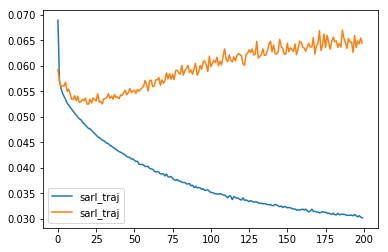

In [20]:
plt.figure()
plt.plot(range(len(train_loss_traj_simple)), train_loss_traj_simple, label='sarl_traj')
plt.plot(range(len(val_loss_traj_simple)), val_loss_traj_simple, label='sarl_traj')

plt.legend()
plt.show()

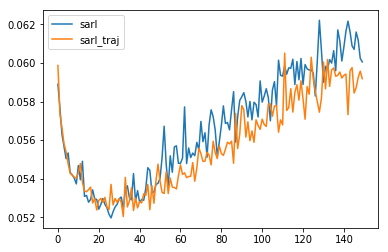

In [43]:
plt.plot(range(len(val_loss)), val_loss, label='sarl')
plt.plot(range(len(val_loss_traj)), val_loss_traj, label='sarl_traj')
plt.legend()
plt.show()

In [11]:
policy_p = 'configs/policy.config'
policy_type = 'sail_traj_simple'
    
# configure policy
policy = policy_factory[policy_type]()
policy_config = configparser.RawConfigParser()
policy_config.read(policy_p)
policy.configure(policy_config)
policy.model.load_state_dict(torch.load('data/output/imitate-baseline-data-0.5-traj/policy_net.pth'))

<All keys matched successfully>

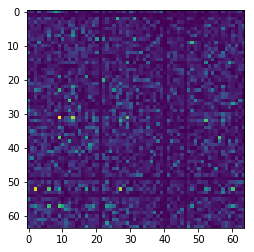

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(torch.abs(list(policy.model.joint_embedding.parameters())[0].data))

In [9]:
policy_p = 'configs/policy.config'
policy_type = 'sail'
    
# configure policy
policy = policy_factory[policy_type]()
policy_config = configparser.RawConfigParser()
policy_config.read(policy_p)
policy.configure(policy_config)
policy.model.load_state_dict(torch.load('data/output/imitate-baseline-data-0.5-notraj/policy_net.pth'))

<All keys matched successfully>

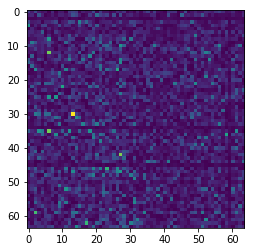

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(torch.abs(list(policy.model.joint_embedding.parameters())[0].data))

## Testing

In [3]:
import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from utils.dataset import ImitDataset, ImitDatasetTraj
from policy.sail_traj import ExtendedNetworkTraj
from policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs
from crowd_nav.imitate import *

In [4]:
def test_model(m_p, model_type, visible=False, n_episodes=5000) :
    policy_p = 'configs/policy.config'
    if not visible : 
        env_p = 'configs/env.config'
    else :
        env_p = 'configs/env_visible.config'
    policy_type = model_type
    
    # configure policy
    policy = policy_factory[policy_type]()
    policy_config = configparser.RawConfigParser()
    policy_config.read(policy_p)
    policy.configure(policy_config)

    # configure environment
    env_config = configparser.RawConfigParser()
    env_config.read(env_p)
    env = CrowdSim()
    env.configure(env_config)

    robot = Robot(env_config, 'robot')
    robot.set_policy(policy)
    env.set_robot(robot)
    policy.set_env(env)

    policy.set_env(env)
    policy.set_phase('val')
    policy.set_device('cpu')

    policy.model.load_state_dict(torch.load(m_p))
    
    if model_type == 'sail' :
        explorer = ExplorerDs(env, robot, 'cpu', 1, gamma=0.9)
    else :
        explorer = ExplorerDs(env, robot, 'cpu', 5, gamma=0.9)
    explorer.robot = robot
    
    return explorer.run_k_episodes(n_episodes, 'val', progressbar=True, output_info=True, notebook=True)

In [9]:
def test(model_type='sail', visible=False, n_episodes=100, model_path=None, itera=range(4, 199, 5)) :
    res_list = []
    if model_path is None :
        if model_type != 'sail' :
            model_path = 'data/output/imitate-baseline-data-0.5-traj/'
        else :
            model_path = 'data/output/imitate-baseline-data-0.5-notraj/'
    for i in itera :
        s = str(i) if i > 10 else '0{}'.format(i)
        res = test_model(model_path + 'policy_net_{}.pth'.format(s), model_type=model_type, visible=visible, n_episodes=n_episodes)
        res_list.append((i, res))
    return res_list

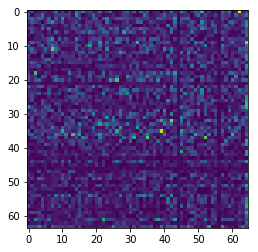

In [4]:
policy_p = 'configs/policy.config'
policy_type = 'sail_traj_simple'
    
# configure policy
policy = policy_factory[policy_type]()
policy_config = configparser.RawConfigParser()
policy_config.read(policy_p)
policy.configure(policy_config)
policy.model.load_state_dict(torch.load('data/output/imitate-baseline-data-0.5-traj/policy_net.pth'))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(torch.abs(list(policy.model.history_attention.parameters())[0].data))

In [16]:
res = test(model_type='sail', visible=True)

2020-12-22 19:04:50, INFO: VAL    success: 0.71, collision: 0.29, nav time: 10.08, reward: 0.1886 +- 0.2291
success: 0.71, collision: 0.29, nav time: 10.08, reward: 0.1886 +- 0.2291


2020-12-22 19:04:55, INFO: VAL    success: 0.76, collision: 0.24, nav time: 10.61, reward: 0.2107 +- 0.2061
success: 0.76, collision: 0.24, nav time: 10.61, reward: 0.2107 +- 0.2061


2020-12-22 19:04:59, INFO: VAL    success: 0.79, collision: 0.21, nav time: 10.34, reward: 0.2243 +- 0.2089
success: 0.79, collision: 0.21, nav time: 10.34, reward: 0.2243 +- 0.2089


2020-12-22 19:05:03, INFO: VAL    success: 0.44, collision: 0.56, nav time: 10.15, reward: 0.0326 +- 0.2542
success: 0.44, collision: 0.56, nav time: 10.15, reward: 0.0326 +- 0.2542


2020-12-22 19:05:08, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.63, reward: 0.2832 +- 0.1485
success: 0.90, collision: 0.10, nav time: 10.63, reward: 0.2832 +- 0.1485


2020-12-22 19:05:12, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.23, reward: 0.2228 +- 0.2171
success: 0.78, collision: 0.22, nav time: 10.23, reward: 0.2228 +- 0.2171


2020-12-22 19:05:17, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.28, reward: 0.2547 +- 0.1859
success: 0.85, collision: 0.15, nav time: 10.28, reward: 0.2547 +- 0.1859


2020-12-22 19:05:21, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.29, reward: 0.2785 +- 0.1608
success: 0.90, collision: 0.10, nav time: 10.29, reward: 0.2785 +- 0.1608


2020-12-22 19:05:26, INFO: VAL    success: 0.75, collision: 0.25, nav time: 10.28, reward: 0.2032 +- 0.2262
success: 0.75, collision: 0.25, nav time: 10.28, reward: 0.2032 +- 0.2262


2020-12-22 19:05:31, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.24, reward: 0.2428 +- 0.1966
success: 0.83, collision: 0.17, nav time: 10.24, reward: 0.2428 +- 0.1966


2020-12-22 19:05:35, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.50, reward: 0.2564 +- 0.1801
success: 0.86, collision: 0.14, nav time: 10.50, reward: 0.2564 +- 0.1801


2020-12-22 19:05:40, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.44, reward: 0.2174 +- 0.2155
success: 0.78, collision: 0.22, nav time: 10.44, reward: 0.2174 +- 0.2155


2020-12-22 19:05:44, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.26, reward: 0.2117 +- 0.2256
success: 0.78, collision: 0.22, nav time: 10.26, reward: 0.2117 +- 0.2256


2020-12-22 19:05:48, INFO: VAL    success: 0.76, collision: 0.24, nav time: 10.35, reward: 0.2001 +- 0.2328
success: 0.76, collision: 0.24, nav time: 10.35, reward: 0.2001 +- 0.2328


2020-12-22 19:05:53, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.65, reward: 0.2570 +- 0.1839
success: 0.87, collision: 0.13, nav time: 10.65, reward: 0.2570 +- 0.1839


2020-12-22 19:05:57, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.58, reward: 0.2519 +- 0.1785
success: 0.86, collision: 0.14, nav time: 10.58, reward: 0.2519 +- 0.1785


2020-12-22 19:06:02, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.29, reward: 0.2539 +- 0.1920
success: 0.85, collision: 0.15, nav time: 10.29, reward: 0.2539 +- 0.1920


2020-12-22 19:06:06, INFO: VAL    success: 0.81, collision: 0.19, nav time: 10.41, reward: 0.2314 +- 0.2065
success: 0.81, collision: 0.19, nav time: 10.41, reward: 0.2314 +- 0.2065


2020-12-22 19:06:11, INFO: VAL    success: 0.74, collision: 0.26, nav time: 9.98, reward: 0.2049 +- 0.2293
success: 0.74, collision: 0.26, nav time: 9.98, reward: 0.2049 +- 0.2293


2020-12-22 19:06:15, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.41, reward: 0.2592 +- 0.1879
success: 0.86, collision: 0.14, nav time: 10.41, reward: 0.2592 +- 0.1879


2020-12-22 19:06:20, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.36, reward: 0.2403 +- 0.1968
success: 0.83, collision: 0.17, nav time: 10.36, reward: 0.2403 +- 0.1968


2020-12-22 19:06:24, INFO: VAL    success: 0.79, collision: 0.21, nav time: 10.19, reward: 0.2212 +- 0.2184
success: 0.79, collision: 0.21, nav time: 10.19, reward: 0.2212 +- 0.2184


2020-12-22 19:06:28, INFO: VAL    success: 0.73, collision: 0.27, nav time: 10.11, reward: 0.1974 +- 0.2315
success: 0.73, collision: 0.27, nav time: 10.11, reward: 0.1974 +- 0.2315


2020-12-22 19:06:33, INFO: VAL    success: 0.88, collision: 0.12, nav time: 10.49, reward: 0.2694 +- 0.1664
success: 0.88, collision: 0.12, nav time: 10.49, reward: 0.2694 +- 0.1664


2020-12-22 19:06:38, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.42, reward: 0.2891 +- 0.1406
success: 0.93, collision: 0.07, nav time: 10.42, reward: 0.2891 +- 0.1406


2020-12-22 19:06:42, INFO: VAL    success: 0.75, collision: 0.25, nav time: 10.17, reward: 0.2056 +- 0.2327
success: 0.75, collision: 0.25, nav time: 10.17, reward: 0.2056 +- 0.2327


2020-12-22 19:06:46, INFO: VAL    success: 0.84, collision: 0.16, nav time: 10.33, reward: 0.2522 +- 0.1926
success: 0.84, collision: 0.16, nav time: 10.33, reward: 0.2522 +- 0.1926


2020-12-22 19:06:51, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.23, reward: 0.2622 +- 0.1746
success: 0.86, collision: 0.14, nav time: 10.23, reward: 0.2622 +- 0.1746


2020-12-22 19:06:56, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.25, reward: 0.2662 +- 0.1849
success: 0.87, collision: 0.13, nav time: 10.25, reward: 0.2662 +- 0.1849


2020-12-22 19:07:01, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.37, reward: 0.2620 +- 0.1840
success: 0.87, collision: 0.13, nav time: 10.37, reward: 0.2620 +- 0.1840


2020-12-22 19:07:05, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.42, reward: 0.2545 +- 0.1888
success: 0.86, collision: 0.14, nav time: 10.42, reward: 0.2545 +- 0.1888


2020-12-22 19:07:09, INFO: VAL    success: 0.79, collision: 0.21, nav time: 10.18, reward: 0.2237 +- 0.2193
success: 0.79, collision: 0.21, nav time: 10.18, reward: 0.2237 +- 0.2193


2020-12-22 19:07:14, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.24, reward: 0.2833 +- 0.1561
success: 0.90, collision: 0.10, nav time: 10.24, reward: 0.2833 +- 0.1561


2020-12-22 19:07:18, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.17, reward: 0.2214 +- 0.2189
success: 0.78, collision: 0.22, nav time: 10.17, reward: 0.2214 +- 0.2189


2020-12-22 19:07:23, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.36, reward: 0.2815 +- 0.1630
success: 0.90, collision: 0.10, nav time: 10.36, reward: 0.2815 +- 0.1630


2020-12-22 19:07:28, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.34, reward: 0.2759 +- 0.1650
success: 0.90, collision: 0.10, nav time: 10.34, reward: 0.2759 +- 0.1650


2020-12-22 19:07:32, INFO: VAL    success: 0.81, collision: 0.19, nav time: 10.23, reward: 0.2419 +- 0.2025
success: 0.81, collision: 0.19, nav time: 10.23, reward: 0.2419 +- 0.2025


2020-12-22 19:07:37, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.48, reward: 0.2356 +- 0.2040
success: 0.82, collision: 0.18, nav time: 10.48, reward: 0.2356 +- 0.2040


2020-12-22 19:07:42, INFO: VAL    success: 0.88, collision: 0.12, nav time: 10.35, reward: 0.2735 +- 0.1714
success: 0.88, collision: 0.12, nav time: 10.35, reward: 0.2735 +- 0.1714


In [17]:
res = test(model_type='sail_traj_simple', visible=True)

2020-12-22 19:07:51, INFO: VAL    success: 0.68, collision: 0.32, nav time: 10.27, reward: 0.1672 +- 0.2380
success: 0.68, collision: 0.32, nav time: 10.27, reward: 0.1672 +- 0.2380


2020-12-22 19:08:00, INFO: VAL    success: 0.74, collision: 0.26, nav time: 10.41, reward: 0.1953 +- 0.2179
success: 0.74, collision: 0.26, nav time: 10.41, reward: 0.1953 +- 0.2179


2020-12-22 19:08:08, INFO: VAL    success: 0.63, collision: 0.37, nav time: 10.11, reward: 0.1357 +- 0.2590
success: 0.63, collision: 0.37, nav time: 10.11, reward: 0.1357 +- 0.2590


2020-12-22 19:08:16, INFO: VAL    success: 0.62, collision: 0.38, nav time: 10.26, reward: 0.1358 +- 0.2488
success: 0.62, collision: 0.38, nav time: 10.26, reward: 0.1358 +- 0.2488


2020-12-22 19:08:24, INFO: VAL    success: 0.57, collision: 0.43, nav time: 9.96, reward: 0.1133 +- 0.2543
success: 0.57, collision: 0.43, nav time: 9.96, reward: 0.1133 +- 0.2543


2020-12-22 19:08:32, INFO: VAL    success: 0.64, collision: 0.36, nav time: 10.23, reward: 0.1476 +- 0.2474
success: 0.64, collision: 0.36, nav time: 10.23, reward: 0.1476 +- 0.2474


2020-12-22 19:08:42, INFO: VAL    success: 0.80, collision: 0.20, nav time: 10.30, reward: 0.2285 +- 0.2109
success: 0.80, collision: 0.20, nav time: 10.30, reward: 0.2285 +- 0.2109


2020-12-22 19:08:52, INFO: VAL    success: 0.79, collision: 0.21, nav time: 10.35, reward: 0.2188 +- 0.2138
success: 0.79, collision: 0.21, nav time: 10.35, reward: 0.2188 +- 0.2138


2020-12-22 19:09:02, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.42, reward: 0.2411 +- 0.1936
success: 0.83, collision: 0.17, nav time: 10.42, reward: 0.2411 +- 0.1936


2020-12-22 19:09:11, INFO: VAL    success: 0.72, collision: 0.28, nav time: 10.25, reward: 0.1915 +- 0.2285
success: 0.72, collision: 0.28, nav time: 10.25, reward: 0.1915 +- 0.2285


2020-12-22 19:09:19, INFO: VAL    success: 0.73, collision: 0.26, nav time: 10.23, reward: 0.1859 +- 0.2390
success: 0.73, collision: 0.26, nav time: 10.23, reward: 0.1859 +- 0.2390


2020-12-22 19:09:29, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.38, reward: 0.2350 +- 0.2053
success: 0.82, collision: 0.18, nav time: 10.38, reward: 0.2350 +- 0.2053


2020-12-22 19:09:39, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.28, reward: 0.2576 +- 0.1823
success: 0.85, collision: 0.15, nav time: 10.28, reward: 0.2576 +- 0.1823


2020-12-22 19:09:49, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.25, reward: 0.2682 +- 0.1772
success: 0.86, collision: 0.14, nav time: 10.25, reward: 0.2682 +- 0.1772


2020-12-22 19:09:58, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.29, reward: 0.2195 +- 0.2139
success: 0.78, collision: 0.22, nav time: 10.29, reward: 0.2195 +- 0.2139


2020-12-22 19:10:07, INFO: VAL    success: 0.89, collision: 0.11, nav time: 10.39, reward: 0.2741 +- 0.1599
success: 0.89, collision: 0.11, nav time: 10.39, reward: 0.2741 +- 0.1599


2020-12-22 19:10:16, INFO: VAL    success: 0.79, collision: 0.21, nav time: 10.20, reward: 0.2219 +- 0.2146
success: 0.79, collision: 0.21, nav time: 10.20, reward: 0.2219 +- 0.2146


2020-12-22 19:10:27, INFO: VAL    success: 0.88, collision: 0.12, nav time: 10.42, reward: 0.2664 +- 0.1761
success: 0.88, collision: 0.12, nav time: 10.42, reward: 0.2664 +- 0.1761


2020-12-22 19:10:37, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.45, reward: 0.2627 +- 0.1743
success: 0.87, collision: 0.13, nav time: 10.45, reward: 0.2627 +- 0.1743


2020-12-22 19:10:47, INFO: VAL    success: 0.89, collision: 0.11, nav time: 10.47, reward: 0.2767 +- 0.1588
success: 0.89, collision: 0.11, nav time: 10.47, reward: 0.2767 +- 0.1588


2020-12-22 19:10:56, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.25, reward: 0.2395 +- 0.2001
success: 0.82, collision: 0.18, nav time: 10.25, reward: 0.2395 +- 0.2001


2020-12-22 19:11:05, INFO: VAL    success: 0.80, collision: 0.20, nav time: 10.26, reward: 0.2295 +- 0.2122
success: 0.80, collision: 0.20, nav time: 10.26, reward: 0.2295 +- 0.2122


2020-12-22 19:11:15, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.20, reward: 0.2891 +- 0.1494
success: 0.91, collision: 0.09, nav time: 10.20, reward: 0.2891 +- 0.1494


2020-12-22 19:11:25, INFO: VAL    success: 0.92, collision: 0.08, nav time: 10.38, reward: 0.2926 +- 0.1459
success: 0.92, collision: 0.08, nav time: 10.38, reward: 0.2926 +- 0.1459


2020-12-22 19:11:34, INFO: VAL    success: 0.81, collision: 0.19, nav time: 10.38, reward: 0.2375 +- 0.1975
success: 0.81, collision: 0.19, nav time: 10.38, reward: 0.2375 +- 0.1975


2020-12-22 19:11:44, INFO: VAL    success: 0.81, collision: 0.19, nav time: 10.20, reward: 0.2367 +- 0.2087
success: 0.81, collision: 0.19, nav time: 10.20, reward: 0.2367 +- 0.2087


2020-12-22 19:11:55, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.22, reward: 0.2641 +- 0.1745
success: 0.86, collision: 0.14, nav time: 10.22, reward: 0.2641 +- 0.1745


2020-12-22 19:12:04, INFO: VAL    success: 0.81, collision: 0.19, nav time: 10.32, reward: 0.2333 +- 0.2081
success: 0.81, collision: 0.19, nav time: 10.32, reward: 0.2333 +- 0.2081


2020-12-22 19:12:14, INFO: VAL    success: 0.77, collision: 0.23, nav time: 10.26, reward: 0.2097 +- 0.2224
success: 0.77, collision: 0.23, nav time: 10.26, reward: 0.2097 +- 0.2224


2020-12-22 19:12:23, INFO: VAL    success: 0.73, collision: 0.27, nav time: 10.38, reward: 0.1901 +- 0.2402
success: 0.73, collision: 0.27, nav time: 10.38, reward: 0.1901 +- 0.2402


2020-12-22 19:12:33, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.34, reward: 0.2400 +- 0.1992
success: 0.82, collision: 0.18, nav time: 10.34, reward: 0.2400 +- 0.1992


2020-12-22 19:12:42, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.32, reward: 0.2374 +- 0.2000
success: 0.82, collision: 0.18, nav time: 10.32, reward: 0.2374 +- 0.2000


2020-12-22 19:12:51, INFO: VAL    success: 0.75, collision: 0.25, nav time: 10.32, reward: 0.1984 +- 0.2360
success: 0.75, collision: 0.25, nav time: 10.32, reward: 0.1984 +- 0.2360


2020-12-22 19:13:01, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.42, reward: 0.2466 +- 0.1881
success: 0.83, collision: 0.17, nav time: 10.42, reward: 0.2466 +- 0.1881


2020-12-22 19:13:11, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.36, reward: 0.2675 +- 0.1786
success: 0.87, collision: 0.13, nav time: 10.36, reward: 0.2675 +- 0.1786


2020-12-22 19:13:21, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.46, reward: 0.2346 +- 0.2001
success: 0.82, collision: 0.18, nav time: 10.46, reward: 0.2346 +- 0.2001


2020-12-22 19:13:31, INFO: VAL    success: 0.84, collision: 0.16, nav time: 10.21, reward: 0.2484 +- 0.1893
success: 0.84, collision: 0.16, nav time: 10.21, reward: 0.2484 +- 0.1893


2020-12-22 19:13:39, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.33, reward: 0.2439 +- 0.2021
success: 0.83, collision: 0.17, nav time: 10.33, reward: 0.2439 +- 0.2021


2020-12-22 19:13:48, INFO: VAL    success: 0.84, collision: 0.16, nav time: 10.19, reward: 0.2518 +- 0.1911
success: 0.84, collision: 0.16, nav time: 10.19, reward: 0.2518 +- 0.1911


In [16]:
res = test(model_type='sail', visible=True, model_path='data/output/imitate-event-data-0.5-weight-0.5-horizon-4-temperature-0.20-nboundary-0-notraj/')

2020-12-23 10:45:30, INFO: VAL    success: 0.48, collision: 0.52, nav time: 9.56, reward: 0.0612 +- 0.2648
success: 0.48, collision: 0.52, nav time: 9.56, reward: 0.0612 +- 0.2648


2020-12-23 10:45:35, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.02, reward: 0.2629 +- 0.1866
success: 0.83, collision: 0.17, nav time: 10.02, reward: 0.2629 +- 0.1866


2020-12-23 10:45:40, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.32, reward: 0.2630 +- 0.1706
success: 0.85, collision: 0.15, nav time: 10.32, reward: 0.2630 +- 0.1706


2020-12-23 10:45:45, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.14, reward: 0.2448 +- 0.1972
success: 0.82, collision: 0.18, nav time: 10.14, reward: 0.2448 +- 0.1972


2020-12-23 10:45:50, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.47, reward: 0.2924 +- 0.1389
success: 0.91, collision: 0.09, nav time: 10.47, reward: 0.2924 +- 0.1389


2020-12-23 10:45:55, INFO: VAL    success: 0.88, collision: 0.12, nav time: 10.17, reward: 0.2763 +- 0.1668
success: 0.88, collision: 0.12, nav time: 10.17, reward: 0.2763 +- 0.1668


2020-12-23 10:46:00, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.23, reward: 0.2950 +- 0.1370
success: 0.91, collision: 0.09, nav time: 10.23, reward: 0.2950 +- 0.1370


2020-12-23 10:46:05, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.21, reward: 0.2970 +- 0.1465
success: 0.91, collision: 0.09, nav time: 10.21, reward: 0.2970 +- 0.1465


2020-12-23 10:46:10, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.30, reward: 0.3135 +- 0.1065
success: 0.95, collision: 0.05, nav time: 10.30, reward: 0.3135 +- 0.1065


2020-12-23 10:46:15, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.14, reward: 0.2763 +- 0.1695
success: 0.87, collision: 0.13, nav time: 10.14, reward: 0.2763 +- 0.1695


2020-12-23 10:46:20, INFO: VAL    success: 0.92, collision: 0.08, nav time: 10.32, reward: 0.2911 +- 0.1425
success: 0.92, collision: 0.08, nav time: 10.32, reward: 0.2911 +- 0.1425


2020-12-23 10:46:25, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.36, reward: 0.2903 +- 0.1379
success: 0.91, collision: 0.09, nav time: 10.36, reward: 0.2903 +- 0.1379


2020-12-23 10:46:30, INFO: VAL    success: 0.92, collision: 0.07, nav time: 10.58, reward: 0.2949 +- 0.1343
success: 0.92, collision: 0.07, nav time: 10.58, reward: 0.2949 +- 0.1343


2020-12-23 10:46:35, INFO: VAL    success: 0.87, collision: 0.12, nav time: 10.34, reward: 0.2688 +- 0.1726
success: 0.87, collision: 0.12, nav time: 10.34, reward: 0.2688 +- 0.1726


2020-12-23 10:46:40, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.46, reward: 0.3179 +- 0.0996
success: 0.96, collision: 0.04, nav time: 10.46, reward: 0.3179 +- 0.0996


2020-12-23 10:46:45, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.46, reward: 0.2747 +- 0.1660
success: 0.87, collision: 0.13, nav time: 10.46, reward: 0.2747 +- 0.1660


2020-12-23 10:46:51, INFO: VAL    success: 0.94, collision: 0.06, nav time: 10.65, reward: 0.3012 +- 0.1146
success: 0.94, collision: 0.06, nav time: 10.65, reward: 0.3012 +- 0.1146


2020-12-23 10:46:56, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.15, reward: 0.3003 +- 0.1436
success: 0.91, collision: 0.09, nav time: 10.15, reward: 0.3003 +- 0.1436


2020-12-23 10:47:01, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.31, reward: 0.3066 +- 0.1244
success: 0.93, collision: 0.07, nav time: 10.31, reward: 0.3066 +- 0.1244


2020-12-23 10:47:05, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.26, reward: 0.2606 +- 0.1826
success: 0.85, collision: 0.15, nav time: 10.26, reward: 0.2606 +- 0.1826


2020-12-23 10:47:11, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.46, reward: 0.3114 +- 0.1086
success: 0.95, collision: 0.05, nav time: 10.46, reward: 0.3114 +- 0.1086


2020-12-23 10:47:16, INFO: VAL    success: 0.98, collision: 0.02, nav time: 10.44, reward: 0.3315 +- 0.0722
success: 0.98, collision: 0.02, nav time: 10.44, reward: 0.3315 +- 0.0722


2020-12-23 10:47:21, INFO: VAL    success: 0.97, collision: 0.03, nav time: 10.49, reward: 0.3166 +- 0.0912
success: 0.97, collision: 0.03, nav time: 10.49, reward: 0.3166 +- 0.0912


2020-12-23 10:47:26, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.31, reward: 0.3227 +- 0.1040
success: 0.96, collision: 0.04, nav time: 10.31, reward: 0.3227 +- 0.1040


2020-12-23 10:47:31, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.63, reward: 0.3125 +- 0.0948
success: 0.96, collision: 0.04, nav time: 10.63, reward: 0.3125 +- 0.0948


2020-12-23 10:47:36, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.49, reward: 0.2956 +- 0.1379
success: 0.91, collision: 0.09, nav time: 10.49, reward: 0.2956 +- 0.1379


2020-12-23 10:47:41, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.33, reward: 0.3168 +- 0.0940
success: 0.96, collision: 0.04, nav time: 10.33, reward: 0.3168 +- 0.0940


2020-12-23 10:47:46, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.33, reward: 0.3050 +- 0.1250
success: 0.93, collision: 0.07, nav time: 10.33, reward: 0.3050 +- 0.1250


2020-12-23 10:47:52, INFO: VAL    success: 0.98, collision: 0.02, nav time: 10.36, reward: 0.3277 +- 0.0728
success: 0.98, collision: 0.02, nav time: 10.36, reward: 0.3277 +- 0.0728


2020-12-23 10:47:57, INFO: VAL    success: 0.97, collision: 0.03, nav time: 10.58, reward: 0.3175 +- 0.0885
success: 0.97, collision: 0.03, nav time: 10.58, reward: 0.3175 +- 0.0885


2020-12-23 10:48:02, INFO: VAL    success: 0.94, collision: 0.06, nav time: 10.39, reward: 0.3097 +- 0.1166
success: 0.94, collision: 0.06, nav time: 10.39, reward: 0.3097 +- 0.1166


2020-12-23 10:48:07, INFO: VAL    success: 0.92, collision: 0.08, nav time: 10.30, reward: 0.3023 +- 0.1320
success: 0.92, collision: 0.08, nav time: 10.30, reward: 0.3023 +- 0.1320


2020-12-23 10:48:13, INFO: VAL    success: 0.95, collision: 0.04, nav time: 10.82, reward: 0.3032 +- 0.1003
success: 0.95, collision: 0.04, nav time: 10.82, reward: 0.3032 +- 0.1003


2020-12-23 10:48:18, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.43, reward: 0.3117 +- 0.1117
success: 0.95, collision: 0.05, nav time: 10.43, reward: 0.3117 +- 0.1117


2020-12-23 10:48:23, INFO: VAL    success: 0.96, collision: 0.03, nav time: 10.30, reward: 0.3216 +- 0.0942
success: 0.96, collision: 0.03, nav time: 10.30, reward: 0.3216 +- 0.0942


2020-12-23 10:48:29, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.46, reward: 0.3021 +- 0.1213
success: 0.93, collision: 0.07, nav time: 10.46, reward: 0.3021 +- 0.1213


2020-12-23 10:48:34, INFO: VAL    success: 0.94, collision: 0.06, nav time: 10.35, reward: 0.3083 +- 0.1174
success: 0.94, collision: 0.06, nav time: 10.35, reward: 0.3083 +- 0.1174


2020-12-23 10:48:39, INFO: VAL    success: 0.94, collision: 0.05, nav time: 10.40, reward: 0.3059 +- 0.1124
success: 0.94, collision: 0.05, nav time: 10.40, reward: 0.3059 +- 0.1124


2020-12-23 10:48:44, INFO: VAL    success: 0.94, collision: 0.06, nav time: 10.56, reward: 0.3030 +- 0.1229
success: 0.94, collision: 0.06, nav time: 10.56, reward: 0.3030 +- 0.1229


In [43]:
res = test(model_type='sail_traj_simple', visible=True, model_path='data/output/imitate-0.3-weight-1-length-traj/')

2020-12-25 20:26:15, INFO: VAL    success: 0.63, collision: 0.37, nav time: 9.90, reward: 0.1540 +- 0.2533


2020-12-25 20:26:24, INFO: VAL    success: 0.69, collision: 0.31, nav time: 10.08, reward: 0.1803 +- 0.2380


2020-12-25 20:26:31, INFO: VAL    success: 0.71, collision: 0.29, nav time: 10.18, reward: 0.1809 +- 0.2310


2020-12-25 20:26:39, INFO: VAL    success: 0.66, collision: 0.34, nav time: 9.90, reward: 0.1641 +- 0.2409


2020-12-25 20:26:47, INFO: VAL    success: 0.89, collision: 0.11, nav time: 10.47, reward: 0.2708 +- 0.1601


2020-12-25 20:26:55, INFO: VAL    success: 0.73, collision: 0.27, nav time: 10.00, reward: 0.2002 +- 0.2279


2020-12-25 20:27:04, INFO: VAL    success: 0.92, collision: 0.08, nav time: 10.54, reward: 0.2921 +- 0.1336


2020-12-25 20:27:13, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.52, reward: 0.2887 +- 0.1383


2020-12-25 20:27:21, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.18, reward: 0.3017 +- 0.1316


2020-12-25 20:27:30, INFO: VAL    success: 0.98, collision: 0.02, nav time: 10.45, reward: 0.3166 +- 0.0907


2020-12-25 20:27:38, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.19, reward: 0.2707 +- 0.1660


2020-12-25 20:27:47, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.37, reward: 0.3170 +- 0.1033


2020-12-25 20:27:56, INFO: VAL    success: 0.92, collision: 0.08, nav time: 10.27, reward: 0.2834 +- 0.1485


2020-12-25 20:28:05, INFO: VAL    success: 0.94, collision: 0.06, nav time: 10.37, reward: 0.2957 +- 0.1331


2020-12-25 20:28:14, INFO: VAL    success: 0.99, collision: 0.01, nav time: 10.42, reward: 0.3259 +- 0.0710


2020-12-25 20:28:25, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.26, reward: 0.3122 +- 0.1185


2020-12-25 20:28:36, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.27, reward: 0.3160 +- 0.1028


2020-12-25 20:28:47, INFO: VAL    success: 0.89, collision: 0.11, nav time: 10.51, reward: 0.2750 +- 0.1634


2020-12-25 20:28:58, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.35, reward: 0.2968 +- 0.1372


2020-12-25 20:29:09, INFO: VAL    success: 0.99, collision: 0.01, nav time: 10.52, reward: 0.3282 +- 0.0648


2020-12-25 20:29:20, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.44, reward: 0.2850 +- 0.1606


2020-12-25 20:29:30, INFO: VAL    success: 0.97, collision: 0.03, nav time: 10.48, reward: 0.3189 +- 0.0868


KeyboardInterrupt: 

In [46]:
res = test(model_type='sail_traj_simple', visible=True, model_path='data/output/unipredtests/imitate-unipred-0.3-weight-1-length-traj/')

2020-12-25 20:31:13, INFO: VAL    success: 0.55, collision: 0.45, nav time: 10.05, reward: 0.0915 +- 0.2623


2020-12-25 20:31:23, INFO: VAL    success: 0.89, collision: 0.11, nav time: 10.93, reward: 0.2647 +- 0.1477


2020-12-25 20:31:32, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.35, reward: 0.2196 +- 0.2046


2020-12-25 20:31:40, INFO: VAL    success: 0.77, collision: 0.23, nav time: 10.16, reward: 0.2236 +- 0.2130


2020-12-25 20:31:48, INFO: VAL    success: 0.69, collision: 0.31, nav time: 10.12, reward: 0.1780 +- 0.2407


2020-12-25 20:31:57, INFO: VAL    success: 0.89, collision: 0.11, nav time: 10.21, reward: 0.2774 +- 0.1655


2020-12-25 20:32:05, INFO: VAL    success: 0.79, collision: 0.21, nav time: 10.09, reward: 0.2285 +- 0.2146


2020-12-25 20:32:14, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.59, reward: 0.3075 +- 0.1128


2020-12-25 20:32:23, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.19, reward: 0.2602 +- 0.1877


2020-12-25 20:32:33, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.10, reward: 0.3085 +- 0.1352


2020-12-25 20:32:42, INFO: VAL    success: 0.94, collision: 0.06, nav time: 10.34, reward: 0.3051 +- 0.1220


2020-12-25 20:32:51, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.46, reward: 0.3150 +- 0.0992


2020-12-25 20:33:01, INFO: VAL    success: 0.92, collision: 0.08, nav time: 10.43, reward: 0.2986 +- 0.1342


2020-12-25 20:33:10, INFO: VAL    success: 0.94, collision: 0.06, nav time: 10.28, reward: 0.3047 +- 0.1302


2020-12-25 20:33:20, INFO: VAL    success: 0.93, collision: 0.06, nav time: 10.36, reward: 0.3048 +- 0.1205


2020-12-25 20:33:30, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.20, reward: 0.3155 +- 0.1122


2020-12-25 20:33:39, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.43, reward: 0.2823 +- 0.1528


2020-12-25 20:33:49, INFO: VAL    success: 0.94, collision: 0.05, nav time: 10.58, reward: 0.3031 +- 0.1103


2020-12-25 20:33:58, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.20, reward: 0.2705 +- 0.1736


2020-12-25 20:34:08, INFO: VAL    success: 0.97, collision: 0.03, nav time: 10.38, reward: 0.3221 +- 0.0880


2020-12-25 20:34:18, INFO: VAL    success: 0.97, collision: 0.03, nav time: 10.40, reward: 0.3156 +- 0.0892


FileNotFoundError: [Errno 2] No such file or directory: 'data/output/unipredtests/imitate-unipred-0.3-weight-1-length-traj/policy_net_109.pth'

In [11]:
res = test(model_type='sail_traj_simple', visible=True, model_path='data/output/imitate-trajpred-0.3-weight-3-length-traj/')

2020-12-25 12:15:24, INFO: VAL    success: 0.55, collision: 0.45, nav time: 10.01, reward: 0.1005 +- 0.2664


2020-12-25 12:15:33, INFO: VAL    success: 0.84, collision: 0.16, nav time: 10.68, reward: 0.2446 +- 0.1798


2020-12-25 12:15:40, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.49, reward: 0.2128 +- 0.2192


2020-12-25 12:15:47, INFO: VAL    success: 0.67, collision: 0.33, nav time: 10.13, reward: 0.1665 +- 0.2448


2020-12-25 12:15:55, INFO: VAL    success: 0.73, collision: 0.27, nav time: 10.29, reward: 0.1919 +- 0.2339


2020-12-25 12:16:03, INFO: VAL    success: 0.84, collision: 0.16, nav time: 10.29, reward: 0.2486 +- 0.2040


2020-12-25 12:16:09, INFO: VAL    success: 0.71, collision: 0.29, nav time: 10.05, reward: 0.1848 +- 0.2458


2020-12-25 12:16:18, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.61, reward: 0.3116 +- 0.0985


2020-12-25 12:16:26, INFO: VAL    success: 0.84, collision: 0.16, nav time: 9.97, reward: 0.2562 +- 0.1935


2020-12-25 12:16:33, INFO: VAL    success: 0.82, collision: 0.18, nav time: 10.17, reward: 0.2421 +- 0.2152


2020-12-25 12:16:41, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.29, reward: 0.2501 +- 0.1865


2020-12-25 12:16:50, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.39, reward: 0.3070 +- 0.1153


2020-12-25 12:16:58, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.50, reward: 0.2956 +- 0.1318


2020-12-25 12:17:06, INFO: VAL    success: 0.89, collision: 0.11, nav time: 10.48, reward: 0.2683 +- 0.1694


2020-12-25 12:17:15, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.38, reward: 0.2690 +- 0.1783


2020-12-25 12:17:25, INFO: VAL    success: 0.82, collision: 0.17, nav time: 10.29, reward: 0.2438 +- 0.1912


2020-12-25 12:17:35, INFO: VAL    success: 0.88, collision: 0.12, nav time: 10.33, reward: 0.2735 +- 0.1676


2020-12-25 12:17:43, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.68, reward: 0.2508 +- 0.1814


2020-12-25 12:17:52, INFO: VAL    success: 0.84, collision: 0.16, nav time: 10.22, reward: 0.2508 +- 0.1918


2020-12-25 12:18:00, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.32, reward: 0.2829 +- 0.1624


2020-12-25 12:18:08, INFO: VAL    success: 0.86, collision: 0.14, nav time: 10.33, reward: 0.2629 +- 0.1813


2020-12-25 12:18:16, INFO: VAL    success: 0.73, collision: 0.27, nav time: 10.15, reward: 0.1852 +- 0.2406


2020-12-25 12:18:24, INFO: VAL    success: 0.90, collision: 0.09, nav time: 10.41, reward: 0.2803 +- 0.1548


2020-12-25 12:18:32, INFO: VAL    success: 0.92, collision: 0.08, nav time: 10.43, reward: 0.2879 +- 0.1410


2020-12-25 12:18:40, INFO: VAL    success: 0.87, collision: 0.13, nav time: 10.41, reward: 0.2657 +- 0.1771


2020-12-25 12:18:49, INFO: VAL    success: 0.93, collision: 0.07, nav time: 10.53, reward: 0.2982 +- 0.1291


2020-12-25 12:18:58, INFO: VAL    success: 0.90, collision: 0.10, nav time: 10.37, reward: 0.2798 +- 0.1575


2020-12-25 12:19:06, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.30, reward: 0.2427 +- 0.2090


2020-12-25 12:19:16, INFO: VAL    success: 0.95, collision: 0.05, nav time: 10.37, reward: 0.3046 +- 0.1213


2020-12-25 12:19:25, INFO: VAL    success: 0.83, collision: 0.17, nav time: 10.29, reward: 0.2450 +- 0.2006


2020-12-25 12:19:34, INFO: VAL    success: 0.89, collision: 0.10, nav time: 10.60, reward: 0.2717 +- 0.1616


2020-12-25 12:19:42, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.54, reward: 0.2803 +- 0.1527


2020-12-25 12:19:51, INFO: VAL    success: 0.96, collision: 0.04, nav time: 10.66, reward: 0.3061 +- 0.1025


2020-12-25 12:19:59, INFO: VAL    success: 0.78, collision: 0.22, nav time: 10.42, reward: 0.2119 +- 0.2218


2020-12-25 12:20:07, INFO: VAL    success: 0.76, collision: 0.24, nav time: 10.35, reward: 0.2096 +- 0.2263


2020-12-25 12:20:15, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.69, reward: 0.2473 +- 0.1871


2020-12-25 12:20:23, INFO: VAL    success: 0.88, collision: 0.12, nav time: 10.34, reward: 0.2740 +- 0.1645


2020-12-25 12:20:32, INFO: VAL    success: 0.91, collision: 0.09, nav time: 10.54, reward: 0.2755 +- 0.1579


2020-12-25 12:20:40, INFO: VAL    success: 0.85, collision: 0.15, nav time: 10.39, reward: 0.2512 +- 0.1888


### Comparing

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [42]:
names = ['baseline', 'snce', '1-step-TP']
model_paths = ['data/output/imitate-baseline-data-0.5-notraj/', 
               'data/output/imitate-event-data-0.5-weight-0.5-horizon-4-temperature-0.20-nboundary-0-notraj/',
               'data/output/imitate-0.3-weight-1-length-traj/']
model_types = ['sail', 'sail', 'sail_traj_simple']

In [43]:
def compare(names, model_ps, types, n_episodes=100, visible=True) :
    results = []
    for name, path, model_type in zip(names, model_ps, types) :
        res = test(model_type=model_type, visible=visible, n_episodes=n_episodes, model_path=path)
        results.append((name, path, model_type, res))
    return results

In [44]:
#compare_results = compare(names, model_paths, model_types)
#torch.save(compare_results, 'data/testing/compare_v0.pt')

In [48]:
compare_results = [(names[i], p, mt, res) for i, (_, p, mt, res) in enumerate(compare_results)]

In [47]:
compare_results = torch.load('data/testing/compare_v0.pt')

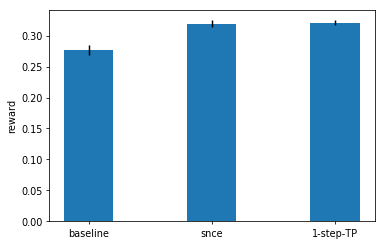

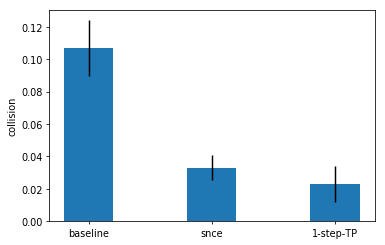

In [64]:
accuracy_metrics = ['reward', 'collision']
sort_type = [True, False]
top_n_res = 10

for metric, reverse in zip(accuracy_metrics, sort_type) :
    avg_perfs = []
    std_perfs = []

    for name, _, _, res in compare_results :
        perfs = sorted([r[1][metric] for r in res], reverse=reverse)[:10]
        avg_perf = np.mean(perfs)
        std_perf = np.std(perfs)
        avg_perfs.append(avg_perf)
        std_perfs.append(std_perf)
    plt.figure(dpi=70)
    x = np.arange(len(compare_results)) * .5
    plt.bar(x, avg_perfs, width=.2, yerr=std_perfs)
    plt.xticks(x, [c[0] for c in compare_results])
    plt.ylabel(metric)
    plt.show()
        

### Training models

In [3]:
import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from utils.dataset import ImitDataset, ImitDatasetTraj
from policy.sail_traj import ExtendedNetworkTraj
from policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs
import matplotlib.pyplot as plt

In [4]:
from crowd_nav.imitate import *

#### Baseline and Traj

In [26]:
args_baseline = {'contrast_weight' : 0, 'policy' : 'sail', 'data_sample' : 0.7
                        , 'gpu' : True, 'batch_size' : 128, 'trajectory_weight' : 0, 'uni_weight' : 0,
                       'output_dir' : 'data/output/basetests/imitate', 'num_epoch' :100}
args_traj = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7
                        , 'gpu' : True, 'batch_size' : 128, 'trajectory_weight' : 0, 'uni_weight' : 0,
                       'output_dir' : 'data/output/basetests/imitate', 'num_epoch' :100}
args_traj_test = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7
                        , 'gpu' : True, 'batch_size' : 128, 'trajectory_weight' : 0, 'uni_weight' : 0,
                       'output_dir' : 'data/output/basetests/imitatetest', 'num_epoch' :100, 'max_obs' : 1}
args_traj_test_2 = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7
                        , 'gpu' : True, 'batch_size' : 128, 'trajectory_weight' : 0, 'uni_length' : 5
                    ,'uni_weight' : 0.3,
                       'output_dir' : 'data/output/basetests/imitatetest2', 'num_epoch' :100, 'max_obs' : 1}

args_traj_test_3 = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7
                        , 'gpu' : True, 'batch_size' : 128, 'trajectory_weight' : 0, 'uni_length' : 5
                    ,'uni_weight' : 0.3,
                       'output_dir' : 'data/output/basetests/imitatetest3', 'num_epoch' :100, 'max_obs' : 5}

In [27]:
_ = imitate(args_change=args_traj_test_3)

2020-12-26 19:19:02, INFO:  =========================== 
2020-12-26 19:19:02, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 19:19:02, INFO: Using device: cuda
2020-12-26 19:19:02, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 19:19:03, INFO: +: 0 - 102427
2020-12-26 19:19:03, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1274, 0.0666), task = (0.1274, 0.0666), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.2020, 0.0251)


Epoch #1: loss = (0.0643, 0.0644), task = (0.0643, 0.0644), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0229, 0.0233)


Epoch #2: loss = (0.0625, 0.0624), task = (0.0625, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0211, 0.0202)


Epoch #3: loss = (0.0614, 0.0619), task = (0.0614, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0201, 0.0196)


Epoch #4: loss = (0.0606, 0.0614), task = (0.0606, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0193, 0.0198)


Epoch #5: loss = (0.0599, 0.0627), task = (0.0599, 0.0627), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0187, 0.0210)


Epoch #6: loss = (0.0592, 0.0602), task = (0.0592, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0181, 0.0178)


Epoch #7: loss = (0.0584, 0.0598), task = (0.0584, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0177, 0.0188)


Epoch #8: loss = (0.0580, 0.0594), task = (0.0580, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0175, 0.0186)


Epoch #9: loss = (0.0573, 0.0581), task = (0.0573, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0172, 0.0171)


Epoch #10: loss = (0.0568, 0.0586), task = (0.0568, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0170, 0.0171)


Epoch #11: loss = (0.0564, 0.0583), task = (0.0564, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0168, 0.0168)


Epoch #12: loss = (0.0559, 0.0587), task = (0.0559, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0168, 0.0191)


Epoch #13: loss = (0.0555, 0.0581), task = (0.0555, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0168, 0.0176)


Epoch #14: loss = (0.0552, 0.0577), task = (0.0552, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0167, 0.0164)


Epoch #15: loss = (0.0549, 0.0569), task = (0.0549, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0164, 0.0171)


Epoch #16: loss = (0.0545, 0.0574), task = (0.0545, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0164, 0.0171)


Epoch #17: loss = (0.0542, 0.0565), task = (0.0542, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0165, 0.0168)


Epoch #18: loss = (0.0538, 0.0569), task = (0.0538, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0163, 0.0165)


Epoch #19: loss = (0.0537, 0.0560), task = (0.0537, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0163, 0.0171)


Epoch #20: loss = (0.0535, 0.0570), task = (0.0535, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0164, 0.0165)


Epoch #21: loss = (0.0532, 0.0563), task = (0.0532, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0163, 0.0160)


Epoch #22: loss = (0.0529, 0.0563), task = (0.0529, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0161, 0.0169)


Epoch #23: loss = (0.0529, 0.0559), task = (0.0529, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0160, 0.0171)


Epoch #24: loss = (0.0526, 0.0554), task = (0.0526, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0161, 0.0184)


Epoch #25: loss = (0.0524, 0.0556), task = (0.0524, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0159, 0.0163)


Epoch #26: loss = (0.0521, 0.0552), task = (0.0521, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0159, 0.0159)


Epoch #27: loss = (0.0520, 0.0557), task = (0.0520, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0159, 0.0195)


Epoch #28: loss = (0.0517, 0.0559), task = (0.0517, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0159, 0.0188)


Epoch #29: loss = (0.0517, 0.0556), task = (0.0517, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0159, 0.0174)


Epoch #30: loss = (0.0513, 0.0553), task = (0.0513, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0158, 0.0172)


Epoch #31: loss = (0.0512, 0.0552), task = (0.0512, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0158, 0.0164)


Epoch #32: loss = (0.0512, 0.0551), task = (0.0512, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0157, 0.0165)


Epoch #33: loss = (0.0509, 0.0552), task = (0.0509, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0155, 0.0169)


Epoch #34: loss = (0.0508, 0.0547), task = (0.0508, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0153, 0.0161)


Epoch #35: loss = (0.0506, 0.0550), task = (0.0506, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0154, 0.0170)


Epoch #36: loss = (0.0504, 0.0570), task = (0.0504, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0152, 0.0173)


Epoch #37: loss = (0.0503, 0.0571), task = (0.0503, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0152, 0.0167)


Epoch #38: loss = (0.0500, 0.0545), task = (0.0500, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0151, 0.0169)


Epoch #39: loss = (0.0500, 0.0546), task = (0.0500, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0151, 0.0161)


Epoch #40: loss = (0.0499, 0.0548), task = (0.0499, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0149, 0.0152)


Epoch #41: loss = (0.0498, 0.0541), task = (0.0498, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0150, 0.0153)


Epoch #42: loss = (0.0495, 0.0550), task = (0.0495, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0149, 0.0166)


Epoch #43: loss = (0.0495, 0.0547), task = (0.0495, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0149, 0.0157)


Epoch #44: loss = (0.0492, 0.0557), task = (0.0492, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0149, 0.0160)


Epoch #45: loss = (0.0493, 0.0547), task = (0.0493, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0149, 0.0156)


Epoch #46: loss = (0.0491, 0.0543), task = (0.0491, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0147, 0.0162)


Epoch #47: loss = (0.0490, 0.0552), task = (0.0490, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0148, 0.0168)


Epoch #48: loss = (0.0490, 0.0554), task = (0.0490, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0147, 0.0151)


Epoch #49: loss = (0.0487, 0.0545), task = (0.0487, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0146, 0.0162)


Epoch #50: loss = (0.0487, 0.0542), task = (0.0487, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0146, 0.0150)


Epoch #51: loss = (0.0485, 0.0537), task = (0.0485, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0146, 0.0157)


Epoch #52: loss = (0.0484, 0.0542), task = (0.0484, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0147, 0.0158)


Epoch #53: loss = (0.0484, 0.0539), task = (0.0484, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0145, 0.0151)


Epoch #54: loss = (0.0483, 0.0538), task = (0.0483, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0145, 0.0149)


Epoch #55: loss = (0.0481, 0.0546), task = (0.0481, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0144, 0.0154)


Epoch #56: loss = (0.0481, 0.0547), task = (0.0481, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0145, 0.0151)


Epoch #57: loss = (0.0479, 0.0547), task = (0.0479, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0145, 0.0155)


Epoch #58: loss = (0.0480, 0.0545), task = (0.0480, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0146, 0.0154)


Epoch #59: loss = (0.0479, 0.0541), task = (0.0479, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0144, 0.0158)


Epoch #60: loss = (0.0478, 0.0544), task = (0.0478, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0143, 0.0162)


Epoch #61: loss = (0.0476, 0.0540), task = (0.0476, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0143, 0.0150)


Epoch #62: loss = (0.0477, 0.0542), task = (0.0477, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0144, 0.0149)


Epoch #63: loss = (0.0476, 0.0542), task = (0.0476, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0143, 0.0150)


Epoch #64: loss = (0.0474, 0.0538), task = (0.0474, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0142, 0.0150)


Epoch #65: loss = (0.0473, 0.0562), task = (0.0473, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0142, 0.0174)


Epoch #66: loss = (0.0472, 0.0547), task = (0.0472, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0142, 0.0148)


Epoch #67: loss = (0.0471, 0.0546), task = (0.0471, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0140, 0.0146)


Epoch #68: loss = (0.0471, 0.0544), task = (0.0471, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0141, 0.0151)


Epoch #69: loss = (0.0470, 0.0542), task = (0.0470, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0140, 0.0153)


Epoch #70: loss = (0.0468, 0.0541), task = (0.0468, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0139, 0.0149)


Epoch #71: loss = (0.0468, 0.0541), task = (0.0468, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0140, 0.0163)


Epoch #72: loss = (0.0467, 0.0544), task = (0.0467, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0140, 0.0148)


Epoch #73: loss = (0.0466, 0.0546), task = (0.0466, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0138, 0.0149)


Epoch #74: loss = (0.0465, 0.0545), task = (0.0465, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0139, 0.0153)


Epoch #75: loss = (0.0465, 0.0552), task = (0.0465, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0139, 0.0153)


Epoch #76: loss = (0.0464, 0.0552), task = (0.0464, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0139, 0.0155)


Epoch #77: loss = (0.0463, 0.0552), task = (0.0463, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0138, 0.0160)


Epoch #78: loss = (0.0461, 0.0541), task = (0.0461, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0139, 0.0145)


Epoch #79: loss = (0.0461, 0.0549), task = (0.0461, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0137, 0.0156)


Epoch #80: loss = (0.0460, 0.0540), task = (0.0460, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0137, 0.0147)


Epoch #81: loss = (0.0461, 0.0547), task = (0.0461, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0138, 0.0144)


Epoch #82: loss = (0.0458, 0.0544), task = (0.0458, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0136, 0.0141)


Epoch #83: loss = (0.0458, 0.0551), task = (0.0458, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0136, 0.0164)


Epoch #84: loss = (0.0459, 0.0551), task = (0.0459, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0138, 0.0144)


Epoch #85: loss = (0.0457, 0.0543), task = (0.0457, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0136, 0.0144)


Epoch #86: loss = (0.0456, 0.0542), task = (0.0456, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0134, 0.0145)


Epoch #87: loss = (0.0454, 0.0545), task = (0.0454, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0149)


Epoch #88: loss = (0.0455, 0.0539), task = (0.0455, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0139)


Epoch #89: loss = (0.0455, 0.0552), task = (0.0455, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0150)


Epoch #90: loss = (0.0453, 0.0543), task = (0.0453, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0152)


Epoch #91: loss = (0.0452, 0.0551), task = (0.0452, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0134, 0.0145)


Epoch #92: loss = (0.0452, 0.0557), task = (0.0452, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0148)


Epoch #93: loss = (0.0452, 0.0542), task = (0.0452, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0142)


Epoch #94: loss = (0.0451, 0.0552), task = (0.0451, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0147)


Epoch #95: loss = (0.0450, 0.0546), task = (0.0450, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0134, 0.0143)


Epoch #96: loss = (0.0447, 0.0556), task = (0.0447, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0132, 0.0143)


Epoch #97: loss = (0.0447, 0.0561), task = (0.0447, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0134, 0.0149)


Epoch #98: loss = (0.0449, 0.0559), task = (0.0449, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0134, 0.0159)


Epoch #99: loss = (0.0447, 0.0555), task = (0.0447, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0133, 0.0148)


In [8]:
_ = imitate(args_change=args_traj_test_2)

2020-12-26 17:41:07, INFO:  =========================== 
2020-12-26 17:41:07, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 17:41:07, INFO: Using device: cuda
2020-12-26 17:41:07, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 17:41:11, INFO: +: 0 - 102427
2020-12-26 17:41:11, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1301, 0.0681), task = (0.1301, 0.0681), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.2049, 0.0241)


Epoch #1: loss = (0.0647, 0.0670), task = (0.0647, 0.0670), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0227, 0.0218)


Epoch #2: loss = (0.0627, 0.0635), task = (0.0627, 0.0635), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0208, 0.0212)


Epoch #3: loss = (0.0617, 0.0632), task = (0.0617, 0.0632), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0196, 0.0204)


Epoch #4: loss = (0.0609, 0.0620), task = (0.0609, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0188, 0.0199)


Epoch #5: loss = (0.0602, 0.0620), task = (0.0602, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0185, 0.0189)


Epoch #6: loss = (0.0596, 0.0605), task = (0.0596, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0181, 0.0187)


Epoch #7: loss = (0.0592, 0.0618), task = (0.0592, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0179, 0.0194)


Epoch #8: loss = (0.0586, 0.0617), task = (0.0586, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0177, 0.0187)


Epoch #9: loss = (0.0582, 0.0598), task = (0.0582, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0175, 0.0192)


Epoch #10: loss = (0.0577, 0.0599), task = (0.0577, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0174, 0.0180)


Epoch #11: loss = (0.0570, 0.0593), task = (0.0570, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0172, 0.0182)


Epoch #12: loss = (0.0566, 0.0588), task = (0.0566, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0172, 0.0180)


Epoch #13: loss = (0.0561, 0.0582), task = (0.0561, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0170, 0.0185)


Epoch #14: loss = (0.0557, 0.0580), task = (0.0557, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0170, 0.0185)


Epoch #15: loss = (0.0554, 0.0582), task = (0.0554, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0171, 0.0176)


Epoch #16: loss = (0.0552, 0.0572), task = (0.0552, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0171, 0.0180)


Epoch #17: loss = (0.0547, 0.0564), task = (0.0547, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0168, 0.0172)


Epoch #18: loss = (0.0544, 0.0572), task = (0.0544, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0168, 0.0191)


Epoch #19: loss = (0.0540, 0.0558), task = (0.0540, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0168, 0.0167)


Epoch #20: loss = (0.0538, 0.0561), task = (0.0538, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0168, 0.0178)


Epoch #21: loss = (0.0535, 0.0557), task = (0.0535, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0165, 0.0174)


Epoch #22: loss = (0.0533, 0.0564), task = (0.0533, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0166, 0.0180)


Epoch #23: loss = (0.0530, 0.0562), task = (0.0530, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0166, 0.0176)


Epoch #24: loss = (0.0528, 0.0559), task = (0.0528, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0166, 0.0177)


Epoch #25: loss = (0.0526, 0.0554), task = (0.0526, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0167, 0.0170)


Epoch #26: loss = (0.0525, 0.0552), task = (0.0525, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0166, 0.0174)


Epoch #27: loss = (0.0522, 0.0559), task = (0.0522, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0164, 0.0173)


Epoch #28: loss = (0.0521, 0.0556), task = (0.0521, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0166, 0.0173)


Epoch #29: loss = (0.0519, 0.0556), task = (0.0519, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0164, 0.0170)


Epoch #30: loss = (0.0517, 0.0550), task = (0.0517, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0163, 0.0166)


Epoch #31: loss = (0.0516, 0.0560), task = (0.0516, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0162, 0.0165)


Epoch #32: loss = (0.0515, 0.0564), task = (0.0515, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0164, 0.0190)


Epoch #33: loss = (0.0511, 0.0555), task = (0.0511, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0161, 0.0165)


Epoch #34: loss = (0.0511, 0.0559), task = (0.0511, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0160, 0.0173)


Epoch #35: loss = (0.0509, 0.0559), task = (0.0509, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0160, 0.0179)


Epoch #36: loss = (0.0507, 0.0549), task = (0.0507, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0160, 0.0166)


Epoch #37: loss = (0.0507, 0.0569), task = (0.0507, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0160, 0.0186)


Epoch #38: loss = (0.0505, 0.0544), task = (0.0505, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0159, 0.0168)


Epoch #39: loss = (0.0502, 0.0551), task = (0.0502, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0158, 0.0159)


Epoch #40: loss = (0.0501, 0.0542), task = (0.0501, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0156, 0.0156)


Epoch #41: loss = (0.0501, 0.0553), task = (0.0501, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0155, 0.0164)


Epoch #42: loss = (0.0499, 0.0558), task = (0.0499, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0155, 0.0164)


Epoch #43: loss = (0.0497, 0.0543), task = (0.0497, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0153, 0.0161)


Epoch #44: loss = (0.0497, 0.0553), task = (0.0497, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0151, 0.0162)


Epoch #45: loss = (0.0496, 0.0543), task = (0.0496, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0151, 0.0160)


Epoch #46: loss = (0.0492, 0.0546), task = (0.0492, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0148, 0.0155)


Epoch #47: loss = (0.0492, 0.0546), task = (0.0492, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0148, 0.0161)


Epoch #48: loss = (0.0490, 0.0547), task = (0.0490, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0146, 0.0152)


Epoch #49: loss = (0.0489, 0.0578), task = (0.0489, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0146, 0.0178)


Epoch #50: loss = (0.0488, 0.0562), task = (0.0488, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0144, 0.0153)


Epoch #51: loss = (0.0487, 0.0555), task = (0.0487, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0143, 0.0165)


Epoch #52: loss = (0.0485, 0.0547), task = (0.0485, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0142, 0.0155)


Epoch #53: loss = (0.0484, 0.0547), task = (0.0484, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0141, 0.0146)


Epoch #54: loss = (0.0484, 0.0559), task = (0.0484, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0141, 0.0151)


Epoch #55: loss = (0.0483, 0.0548), task = (0.0483, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0139, 0.0151)


Epoch #56: loss = (0.0482, 0.0544), task = (0.0482, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0138, 0.0152)


Epoch #57: loss = (0.0480, 0.0543), task = (0.0480, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0138, 0.0152)


Epoch #58: loss = (0.0476, 0.0555), task = (0.0476, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0136, 0.0152)


Epoch #59: loss = (0.0478, 0.0542), task = (0.0478, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0138, 0.0147)


Epoch #60: loss = (0.0477, 0.0545), task = (0.0477, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0136, 0.0145)


Epoch #61: loss = (0.0476, 0.0539), task = (0.0476, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0136, 0.0148)


Epoch #62: loss = (0.0474, 0.0546), task = (0.0474, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0145)


Epoch #63: loss = (0.0475, 0.0543), task = (0.0475, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0135, 0.0150)


Epoch #64: loss = (0.0472, 0.0540), task = (0.0472, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0134, 0.0145)


Epoch #65: loss = (0.0473, 0.0547), task = (0.0473, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0134, 0.0150)


Epoch #66: loss = (0.0470, 0.0551), task = (0.0470, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0132, 0.0150)


Epoch #67: loss = (0.0470, 0.0546), task = (0.0470, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0133, 0.0147)


Epoch #68: loss = (0.0469, 0.0544), task = (0.0469, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0133, 0.0149)


Epoch #69: loss = (0.0468, 0.0545), task = (0.0468, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0132, 0.0138)


Epoch #70: loss = (0.0467, 0.0553), task = (0.0467, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0132, 0.0139)


Epoch #71: loss = (0.0467, 0.0546), task = (0.0467, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0130, 0.0149)


Epoch #72: loss = (0.0466, 0.0546), task = (0.0466, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0131, 0.0142)


Epoch #73: loss = (0.0466, 0.0550), task = (0.0466, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0131, 0.0147)


Epoch #74: loss = (0.0464, 0.0554), task = (0.0464, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0131, 0.0133)


Epoch #75: loss = (0.0463, 0.0550), task = (0.0463, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0130, 0.0140)


Epoch #76: loss = (0.0462, 0.0548), task = (0.0462, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0130, 0.0148)


Epoch #77: loss = (0.0462, 0.0548), task = (0.0462, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0130, 0.0147)


Epoch #78: loss = (0.0463, 0.0560), task = (0.0463, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0129, 0.0145)


Epoch #79: loss = (0.0462, 0.0549), task = (0.0462, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0130, 0.0136)


Epoch #80: loss = (0.0460, 0.0545), task = (0.0460, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0130, 0.0135)


Epoch #81: loss = (0.0458, 0.0551), task = (0.0458, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0141)


Epoch #82: loss = (0.0458, 0.0551), task = (0.0458, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0129, 0.0148)


Epoch #83: loss = (0.0457, 0.0561), task = (0.0457, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0129, 0.0137)


Epoch #84: loss = (0.0458, 0.0565), task = (0.0458, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0129, 0.0152)


Epoch #85: loss = (0.0456, 0.0562), task = (0.0456, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0144)


Epoch #86: loss = (0.0457, 0.0550), task = (0.0457, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0129, 0.0140)


Epoch #87: loss = (0.0456, 0.0550), task = (0.0456, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0147)


Epoch #88: loss = (0.0453, 0.0565), task = (0.0453, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0127, 0.0145)


Epoch #89: loss = (0.0455, 0.0545), task = (0.0455, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0138)


Epoch #90: loss = (0.0454, 0.0545), task = (0.0454, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0137)


Epoch #91: loss = (0.0453, 0.0554), task = (0.0453, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0140)


Epoch #92: loss = (0.0451, 0.0555), task = (0.0451, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0138)


Epoch #93: loss = (0.0453, 0.0552), task = (0.0453, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0128, 0.0138)


Epoch #94: loss = (0.0450, 0.0546), task = (0.0450, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0127, 0.0133)


Epoch #95: loss = (0.0450, 0.0550), task = (0.0450, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0127, 0.0139)


Epoch #96: loss = (0.0450, 0.0555), task = (0.0450, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0127, 0.0141)


Epoch #97: loss = (0.0450, 0.0562), task = (0.0450, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0129, 0.0143)


Epoch #98: loss = (0.0448, 0.0553), task = (0.0448, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0127, 0.0141)


Epoch #99: loss = (0.0447, 0.0566), task = (0.0447, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0126, 0.0151)


In [81]:
_ = imitate(args_change=args_traj_test)

2020-12-26 15:23:03, INFO:  =========================== 
2020-12-26 15:23:03, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 15:23:03, INFO: Using device: cuda
2020-12-26 15:23:03, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 15:23:04, INFO: +: 0 - 102427
2020-12-26 15:23:04, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.0683, 0.0619), task = (0.0683, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0577, 0.0573), task = (0.0577, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0558, 0.0572), task = (0.0558, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0547, 0.0563), task = (0.0547, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0541, 0.0551), task = (0.0541, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0535, 0.0541), task = (0.0535, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0529, 0.0553), task = (0.0529, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0525, 0.0549), task = (0.0525, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0521, 0.0540), task = (0.0521, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0516, 0.0535), task = (0.0516, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0512, 0.0537), task = (0.0512, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0507, 0.0536), task = (0.0507, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0506, 0.0526), task = (0.0506, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0501, 0.0536), task = (0.0501, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0497, 0.0532), task = (0.0497, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0494, 0.0532), task = (0.0494, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0492, 0.0522), task = (0.0492, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0488, 0.0528), task = (0.0488, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0486, 0.0523), task = (0.0486, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0481, 0.0526), task = (0.0481, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0479, 0.0526), task = (0.0479, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0476, 0.0524), task = (0.0476, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0474, 0.0530), task = (0.0474, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0470, 0.0523), task = (0.0470, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0468, 0.0526), task = (0.0468, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0465, 0.0520), task = (0.0465, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0462, 0.0523), task = (0.0462, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0462, 0.0524), task = (0.0462, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0460, 0.0520), task = (0.0460, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0458, 0.0530), task = (0.0458, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0455, 0.0518), task = (0.0455, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0456, 0.0524), task = (0.0456, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0452, 0.0519), task = (0.0452, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0449, 0.0526), task = (0.0449, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0448, 0.0526), task = (0.0448, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0445, 0.0525), task = (0.0445, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0445, 0.0525), task = (0.0445, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0444, 0.0524), task = (0.0444, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0442, 0.0521), task = (0.0442, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0439, 0.0525), task = (0.0439, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0438, 0.0529), task = (0.0438, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0434, 0.0525), task = (0.0434, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0434, 0.0530), task = (0.0434, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0432, 0.0537), task = (0.0432, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0430, 0.0526), task = (0.0430, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0431, 0.0542), task = (0.0431, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0427, 0.0528), task = (0.0427, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0425, 0.0537), task = (0.0425, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0424, 0.0524), task = (0.0424, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0423, 0.0531), task = (0.0423, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0422, 0.0529), task = (0.0422, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0420, 0.0547), task = (0.0420, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0420, 0.0532), task = (0.0420, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0418, 0.0536), task = (0.0418, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0416, 0.0534), task = (0.0416, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0417, 0.0538), task = (0.0417, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0415, 0.0533), task = (0.0415, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0412, 0.0547), task = (0.0412, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0412, 0.0545), task = (0.0412, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0410, 0.0555), task = (0.0410, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0410, 0.0548), task = (0.0410, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0409, 0.0537), task = (0.0409, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0407, 0.0555), task = (0.0407, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0406, 0.0552), task = (0.0406, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0402, 0.0545), task = (0.0402, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0403, 0.0549), task = (0.0403, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0402, 0.0543), task = (0.0402, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0401, 0.0548), task = (0.0401, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0401, 0.0555), task = (0.0401, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0399, 0.0547), task = (0.0399, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0397, 0.0545), task = (0.0397, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0397, 0.0549), task = (0.0397, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0396, 0.0567), task = (0.0396, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0396, 0.0551), task = (0.0396, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0394, 0.0554), task = (0.0394, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0392, 0.0545), task = (0.0392, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0389, 0.0553), task = (0.0389, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0391, 0.0552), task = (0.0391, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0389, 0.0561), task = (0.0389, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0389, 0.0556), task = (0.0389, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0386, 0.0557), task = (0.0386, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0389, 0.0553), task = (0.0389, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0385, 0.0562), task = (0.0385, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0384, 0.0559), task = (0.0384, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0383, 0.0570), task = (0.0383, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0384, 0.0563), task = (0.0384, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0383, 0.0558), task = (0.0383, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0382, 0.0552), task = (0.0382, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0381, 0.0559), task = (0.0381, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0378, 0.0562), task = (0.0378, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0379, 0.0561), task = (0.0379, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0378, 0.0579), task = (0.0378, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0377, 0.0563), task = (0.0377, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0378, 0.0563), task = (0.0378, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0375, 0.0574), task = (0.0375, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0376, 0.0559), task = (0.0376, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0374, 0.0573), task = (0.0374, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0374, 0.0568), task = (0.0374, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0374, 0.0578), task = (0.0374, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0370, 0.0571), task = (0.0370, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


In [67]:
_ = imitate(args_change=args_baseline)

2020-12-26 14:07:37, INFO:  =========================== 
2020-12-26 14:07:37, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 14:07:37, INFO: Using device: cuda
2020-12-26 14:07:37, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 14:07:38, INFO: +: 0 - 102427
2020-12-26 14:07:38, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.0698, 0.0596), task = (0.0698, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0574, 0.0578), task = (0.0574, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0557, 0.0566), task = (0.0557, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0546, 0.0556), task = (0.0546, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0538, 0.0557), task = (0.0538, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0533, 0.0546), task = (0.0533, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0527, 0.0561), task = (0.0527, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0520, 0.0537), task = (0.0520, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0517, 0.0540), task = (0.0517, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0513, 0.0531), task = (0.0513, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0509, 0.0538), task = (0.0509, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0504, 0.0548), task = (0.0504, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0499, 0.0536), task = (0.0499, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0497, 0.0528), task = (0.0497, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0493, 0.0540), task = (0.0493, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0491, 0.0524), task = (0.0491, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0487, 0.0533), task = (0.0487, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0483, 0.0519), task = (0.0483, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0480, 0.0519), task = (0.0480, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0478, 0.0524), task = (0.0478, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0475, 0.0522), task = (0.0475, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0472, 0.0532), task = (0.0472, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0470, 0.0519), task = (0.0470, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0468, 0.0523), task = (0.0468, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0466, 0.0523), task = (0.0466, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0464, 0.0524), task = (0.0464, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0462, 0.0522), task = (0.0462, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0460, 0.0517), task = (0.0460, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0458, 0.0516), task = (0.0458, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0456, 0.0520), task = (0.0456, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0453, 0.0532), task = (0.0453, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0451, 0.0525), task = (0.0451, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0451, 0.0519), task = (0.0451, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0448, 0.0531), task = (0.0448, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0445, 0.0528), task = (0.0445, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0444, 0.0526), task = (0.0444, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0444, 0.0528), task = (0.0444, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0441, 0.0529), task = (0.0441, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0438, 0.0535), task = (0.0438, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0439, 0.0523), task = (0.0439, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0436, 0.0527), task = (0.0436, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0434, 0.0536), task = (0.0434, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0434, 0.0530), task = (0.0434, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0433, 0.0525), task = (0.0433, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0431, 0.0538), task = (0.0431, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0428, 0.0525), task = (0.0428, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0428, 0.0544), task = (0.0428, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0427, 0.0540), task = (0.0427, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0425, 0.0528), task = (0.0425, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0424, 0.0534), task = (0.0424, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0423, 0.0530), task = (0.0423, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0421, 0.0540), task = (0.0421, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0420, 0.0534), task = (0.0420, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0419, 0.0541), task = (0.0419, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0417, 0.0534), task = (0.0417, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0418, 0.0552), task = (0.0418, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0413, 0.0535), task = (0.0413, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0414, 0.0537), task = (0.0414, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0412, 0.0540), task = (0.0412, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0410, 0.0535), task = (0.0410, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0412, 0.0535), task = (0.0412, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0409, 0.0550), task = (0.0409, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0407, 0.0547), task = (0.0407, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0406, 0.0542), task = (0.0406, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0406, 0.0545), task = (0.0406, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0403, 0.0540), task = (0.0403, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0403, 0.0540), task = (0.0403, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0400, 0.0541), task = (0.0400, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0402, 0.0542), task = (0.0402, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0399, 0.0547), task = (0.0399, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0397, 0.0553), task = (0.0397, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0396, 0.0556), task = (0.0396, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0397, 0.0553), task = (0.0397, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0396, 0.0549), task = (0.0396, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0393, 0.0558), task = (0.0393, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0395, 0.0555), task = (0.0395, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0391, 0.0561), task = (0.0391, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0391, 0.0577), task = (0.0391, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0390, 0.0553), task = (0.0390, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0388, 0.0552), task = (0.0388, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0387, 0.0566), task = (0.0387, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0385, 0.0562), task = (0.0385, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0386, 0.0562), task = (0.0386, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0386, 0.0566), task = (0.0386, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0386, 0.0549), task = (0.0386, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0384, 0.0568), task = (0.0384, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0382, 0.0572), task = (0.0382, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0381, 0.0571), task = (0.0381, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0383, 0.0558), task = (0.0383, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0380, 0.0568), task = (0.0380, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0379, 0.0553), task = (0.0379, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0378, 0.0558), task = (0.0378, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0380, 0.0567), task = (0.0380, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0378, 0.0554), task = (0.0378, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0377, 0.0570), task = (0.0377, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0375, 0.0564), task = (0.0375, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0372, 0.0559), task = (0.0372, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0372, 0.0569), task = (0.0372, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0371, 0.0571), task = (0.0371, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0373, 0.0575), task = (0.0373, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


In [69]:
_ = imitate(args_change=args_traj)

2020-12-26 14:25:05, INFO:  =========================== 
2020-12-26 14:25:05, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 14:25:05, INFO: Using device: cuda
2020-12-26 14:25:05, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 14:25:05, INFO: +: 0 - 102427
2020-12-26 14:25:05, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.0703, 0.0595), task = (0.0703, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0572, 0.0579), task = (0.0572, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0555, 0.0562), task = (0.0555, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0548, 0.0558), task = (0.0548, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0540, 0.0553), task = (0.0540, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0536, 0.0546), task = (0.0536, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0530, 0.0558), task = (0.0530, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0526, 0.0542), task = (0.0526, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0521, 0.0547), task = (0.0521, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0518, 0.0543), task = (0.0518, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0514, 0.0536), task = (0.0514, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0510, 0.0534), task = (0.0510, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0507, 0.0538), task = (0.0507, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0506, 0.0554), task = (0.0506, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0502, 0.0537), task = (0.0502, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0498, 0.0538), task = (0.0498, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0495, 0.0553), task = (0.0495, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0493, 0.0538), task = (0.0493, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0489, 0.0534), task = (0.0489, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0487, 0.0534), task = (0.0487, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0482, 0.0526), task = (0.0482, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0481, 0.0531), task = (0.0481, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0479, 0.0536), task = (0.0479, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0476, 0.0531), task = (0.0476, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0474, 0.0527), task = (0.0474, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0472, 0.0534), task = (0.0472, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0469, 0.0529), task = (0.0469, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0467, 0.0527), task = (0.0467, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0465, 0.0526), task = (0.0465, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0464, 0.0533), task = (0.0464, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0461, 0.0526), task = (0.0461, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0460, 0.0527), task = (0.0460, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0457, 0.0536), task = (0.0457, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0456, 0.0526), task = (0.0456, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0453, 0.0528), task = (0.0453, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0452, 0.0534), task = (0.0452, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0448, 0.0543), task = (0.0448, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0448, 0.0539), task = (0.0448, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0445, 0.0537), task = (0.0445, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0445, 0.0546), task = (0.0445, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0442, 0.0535), task = (0.0442, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0440, 0.0535), task = (0.0440, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0438, 0.0540), task = (0.0438, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0436, 0.0543), task = (0.0436, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0435, 0.0534), task = (0.0435, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0436, 0.0530), task = (0.0436, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0432, 0.0546), task = (0.0432, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0432, 0.0551), task = (0.0432, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0430, 0.0546), task = (0.0430, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0429, 0.0540), task = (0.0429, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0427, 0.0539), task = (0.0427, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0424, 0.0537), task = (0.0424, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0423, 0.0546), task = (0.0423, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0423, 0.0558), task = (0.0423, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0422, 0.0542), task = (0.0422, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0422, 0.0542), task = (0.0422, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0416, 0.0542), task = (0.0416, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0418, 0.0555), task = (0.0418, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0415, 0.0560), task = (0.0415, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0414, 0.0558), task = (0.0414, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0410, 0.0544), task = (0.0410, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0412, 0.0561), task = (0.0412, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0410, 0.0542), task = (0.0410, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0410, 0.0550), task = (0.0410, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0407, 0.0556), task = (0.0407, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0407, 0.0562), task = (0.0407, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0405, 0.0559), task = (0.0405, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0405, 0.0562), task = (0.0405, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0402, 0.0571), task = (0.0402, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0403, 0.0556), task = (0.0403, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0402, 0.0556), task = (0.0402, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0399, 0.0577), task = (0.0399, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0399, 0.0567), task = (0.0399, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0396, 0.0561), task = (0.0396, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0396, 0.0562), task = (0.0396, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0395, 0.0556), task = (0.0395, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0393, 0.0560), task = (0.0393, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0391, 0.0573), task = (0.0391, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0393, 0.0574), task = (0.0393, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0391, 0.0581), task = (0.0391, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0392, 0.0567), task = (0.0392, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0392, 0.0564), task = (0.0392, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0388, 0.0577), task = (0.0388, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0386, 0.0567), task = (0.0386, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0389, 0.0566), task = (0.0389, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0385, 0.0567), task = (0.0385, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0383, 0.0588), task = (0.0383, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0384, 0.0588), task = (0.0384, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0384, 0.0572), task = (0.0384, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0382, 0.0583), task = (0.0382, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0379, 0.0572), task = (0.0379, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0379, 0.0571), task = (0.0379, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0381, 0.0572), task = (0.0381, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0380, 0.0595), task = (0.0380, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0378, 0.0581), task = (0.0378, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0376, 0.0592), task = (0.0376, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0378, 0.0572), task = (0.0378, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0374, 0.0588), task = (0.0374, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0373, 0.0590), task = (0.0373, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0374, 0.0588), task = (0.0374, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


#### Baseline and traj + contrastive

#### Traj+n-STP 

In [7]:
args_no_contrast_uni_test = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7
                        , 'gpu' : True, 'batch_size' : 128, 'trajectory_weight' : 0, 'uni_weight' : 0.3,
                       'output_dir' : 'data/output/unipredtests/imitatettt', 'num_epoch' :100}

def test_unipred(range_pred=5) :
    train_losses = []
    eval_losses = []
    for n in range(range_pred) :
        args_change = args_no_contrast_uni_test.copy()
        args_change['uni_length'] = n+1
        t_loss, e_loss = imitate(args_change=args_change)
        train_losses.append(t_loss)
        eval_losses.append(e_loss)
    return train_losses, eval_losses

In [6]:
train_losses, eval_losses = test_unipred(range_pred=6)

2020-12-27 19:23:26, INFO:  =========================== 
2020-12-27 19:23:26, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-27 19:23:26, INFO: Using device: cuda
2020-12-27 19:23:26, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-27 19:23:28, INFO: +: 0 - 102427
2020-12-27 19:23:28, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1325, 0.0680), task = (0.1325, 0.0680), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.2111, 0.0250)


Epoch #1: loss = (0.0647, 0.0650), task = (0.0647, 0.0650), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0226, 0.0215)


KeyboardInterrupt: 

#### Traj+n-TP

In [18]:
args_no_contrast_traj_test = {'contrast_weight' : 0, 'policy' : 'sail_traj_simple', 'data_sample' : 0.7
                        , 'gpu' : True, 'batch_size' : 128, 'trajectory_weight' : 0.3, 'uni_weight' : 0,
                       'output_dir' : 'data/output/trajtests/imitate', 'num_epoch' :100}

def test_trajpred(range_pred=5) :
    train_losses = []
    eval_losses = []
    for n in range(range_pred) :
        args_change = args_no_contrast_traj_test.copy()
        args_change['trajectory_length'] = n+1
        t_loss, e_loss = imitate(args_change=args_change)
        train_losses.append(t_loss)
        eval_losses.append(e_loss)
    return train_losses, eval_losses

In [19]:
train_losses_traj, eval_losses_traj = test_trajpred(range_pred=6)

2020-12-25 23:21:30, INFO:  =========================== 
2020-12-25 23:21:30, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-25 23:21:30, INFO: Using device: cuda
2020-12-25 23:21:30, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-25 23:21:30, INFO: +: 0 - 102427
2020-12-25 23:21:30, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1179, 0.0614), task = (0.1179, 0.0614), nce = (0.0000, 0.0000), tpred = (0.1587, 0.0049), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0591, 0.0595), task = (0.0591, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0032), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0573, 0.0602), task = (0.0573, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0023), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0564, 0.0583), task = (0.0564, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0024, 0.0026), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0558, 0.0564), task = (0.0558, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0014), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0553, 0.0565), task = (0.0553, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0018), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0549, 0.0555), task = (0.0549, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0021), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0546, 0.0561), task = (0.0546, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0024), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0541, 0.0561), task = (0.0541, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0019), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0538, 0.0553), task = (0.0538, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0020), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0536, 0.0556), task = (0.0536, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0016), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0532, 0.0540), task = (0.0532, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0012), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0529, 0.0544), task = (0.0529, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0015), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0526, 0.0537), task = (0.0526, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0014), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0524, 0.0555), task = (0.0524, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0043), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0521, 0.0540), task = (0.0521, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0030), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0519, 0.0532), task = (0.0519, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0018), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0515, 0.0541), task = (0.0515, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0033), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0511, 0.0531), task = (0.0511, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0016), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0508, 0.0542), task = (0.0508, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0042), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0506, 0.0523), task = (0.0506, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0016), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0503, 0.0523), task = (0.0503, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0023), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0501, 0.0533), task = (0.0501, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0032), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0495, 0.0529), task = (0.0495, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0026), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0493, 0.0519), task = (0.0493, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0032), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0492, 0.0523), task = (0.0492, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0019), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0487, 0.0511), task = (0.0487, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0018), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0485, 0.0515), task = (0.0485, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0026), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0483, 0.0521), task = (0.0483, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0026), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0480, 0.0511), task = (0.0480, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0018), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0481, 0.0514), task = (0.0481, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0022), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0477, 0.0511), task = (0.0477, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0028), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0475, 0.0513), task = (0.0475, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0022), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0472, 0.0509), task = (0.0472, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0020), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0472, 0.0512), task = (0.0472, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0027), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0469, 0.0522), task = (0.0469, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0019), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0468, 0.0521), task = (0.0468, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0025), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0467, 0.0504), task = (0.0467, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0026), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0465, 0.0507), task = (0.0465, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0016), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0464, 0.0507), task = (0.0464, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0024, 0.0018), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0462, 0.0515), task = (0.0462, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0021), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0460, 0.0510), task = (0.0460, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0029), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0461, 0.0513), task = (0.0461, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0028), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0458, 0.0507), task = (0.0458, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0023), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0456, 0.0514), task = (0.0456, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0029), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0455, 0.0505), task = (0.0455, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0020), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0455, 0.0503), task = (0.0455, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0020), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0453, 0.0508), task = (0.0453, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0025), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0450, 0.0512), task = (0.0450, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0029), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0450, 0.0515), task = (0.0450, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0030), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0451, 0.0513), task = (0.0451, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0024), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0449, 0.0509), task = (0.0449, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0020), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0447, 0.0506), task = (0.0447, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0018), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0446, 0.0507), task = (0.0446, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0021), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0447, 0.0522), task = (0.0447, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0024, 0.0024), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0446, 0.0510), task = (0.0446, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0034), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0444, 0.0518), task = (0.0444, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0021), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0442, 0.0507), task = (0.0442, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0021), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0441, 0.0506), task = (0.0441, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0441, 0.0514), task = (0.0441, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0021), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0440, 0.0517), task = (0.0440, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0028), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0441, 0.0513), task = (0.0441, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0025), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0437, 0.0513), task = (0.0437, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0023, 0.0023), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0437, 0.0512), task = (0.0437, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0019), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0437, 0.0513), task = (0.0437, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0023), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0435, 0.0510), task = (0.0435, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0021), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0433, 0.0516), task = (0.0433, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0027), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0433, 0.0510), task = (0.0433, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0022), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0434, 0.0513), task = (0.0434, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0019), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0431, 0.0516), task = (0.0431, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0026), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0433, 0.0516), task = (0.0433, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0021), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0431, 0.0512), task = (0.0431, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0022), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0430, 0.0524), task = (0.0430, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0022), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0428, 0.0514), task = (0.0428, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0018), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0427, 0.0514), task = (0.0427, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0020), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0428, 0.0516), task = (0.0428, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0019), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0426, 0.0511), task = (0.0426, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0018), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0426, 0.0517), task = (0.0426, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0424, 0.0525), task = (0.0424, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0029), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0423, 0.0519), task = (0.0423, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0423, 0.0535), task = (0.0423, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0027), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0423, 0.0514), task = (0.0423, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0421, 0.0519), task = (0.0421, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0025), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0420, 0.0515), task = (0.0420, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0022, 0.0018), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0420, 0.0518), task = (0.0420, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0020), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0419, 0.0516), task = (0.0419, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0018), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0416, 0.0528), task = (0.0416, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0022), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0417, 0.0526), task = (0.0417, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0022), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0414, 0.0520), task = (0.0414, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0019), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0415, 0.0521), task = (0.0415, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0024), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0414, 0.0520), task = (0.0414, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0023), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0414, 0.0516), task = (0.0414, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0024), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0413, 0.0518), task = (0.0413, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0021, 0.0018), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0413, 0.0532), task = (0.0413, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0028), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0414, 0.0527), task = (0.0414, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0019), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0408, 0.0520), task = (0.0408, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0017), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0409, 0.0522), task = (0.0409, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0019, 0.0015), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0410, 0.0524), task = (0.0410, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0023), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0409, 0.0529), task = (0.0409, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0017), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0410, 0.0523), task = (0.0410, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0020, 0.0018), upred = (0.0000, 0.0000)
2020-12-25 23:43:38, INFO:  =========================== 
2020-12-25 23:43:38, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-25 23:43:38, INFO: Using device: cuda
2020-12-25 23:43:38, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-25 23:43:38, INFO: +: 0 - 102427
2020-12-25 23:43:38, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1242, 0.0624), task = (0.1242, 0.0624), nce = (0.0000, 0.0000), tpred = (0.1864, 0.0068), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0593, 0.0598), task = (0.0593, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0042), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0578, 0.0583), task = (0.0578, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0037), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0567, 0.0579), task = (0.0567, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0559, 0.0568), task = (0.0559, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0041), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0554, 0.0563), task = (0.0554, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0027), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0550, 0.0567), task = (0.0550, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0545, 0.0577), task = (0.0545, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0541, 0.0549), task = (0.0541, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0025), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0538, 0.0554), task = (0.0538, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0028), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0532, 0.0550), task = (0.0532, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0528, 0.0541), task = (0.0528, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0525, 0.0546), task = (0.0525, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0519, 0.0545), task = (0.0519, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0516, 0.0538), task = (0.0516, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0511, 0.0540), task = (0.0511, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0026), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0508, 0.0529), task = (0.0508, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0027), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0504, 0.0522), task = (0.0504, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0029), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0501, 0.0523), task = (0.0501, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0025), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0498, 0.0518), task = (0.0498, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0031), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0495, 0.0525), task = (0.0495, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0040), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0494, 0.0526), task = (0.0494, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0029), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0489, 0.0512), task = (0.0489, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0025), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0488, 0.0513), task = (0.0488, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0032), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0487, 0.0512), task = (0.0487, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0483, 0.0519), task = (0.0483, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0031), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0482, 0.0521), task = (0.0482, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0479, 0.0519), task = (0.0479, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0477, 0.0516), task = (0.0477, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0029), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0476, 0.0507), task = (0.0476, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0474, 0.0518), task = (0.0474, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0472, 0.0511), task = (0.0472, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0472, 0.0510), task = (0.0472, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0471, 0.0505), task = (0.0471, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0469, 0.0509), task = (0.0469, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0467, 0.0522), task = (0.0467, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0029), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0465, 0.0508), task = (0.0465, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0463, 0.0524), task = (0.0463, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0463, 0.0508), task = (0.0463, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0461, 0.0502), task = (0.0461, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0027), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0459, 0.0521), task = (0.0459, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0030), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0457, 0.0511), task = (0.0457, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0457, 0.0509), task = (0.0457, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0030), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0457, 0.0507), task = (0.0457, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0455, 0.0505), task = (0.0455, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0455, 0.0507), task = (0.0455, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0452, 0.0505), task = (0.0452, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0451, 0.0513), task = (0.0451, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0451, 0.0510), task = (0.0451, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0448, 0.0511), task = (0.0448, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0028), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0447, 0.0519), task = (0.0447, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0027), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0447, 0.0513), task = (0.0447, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0042), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0445, 0.0515), task = (0.0445, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0030), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0445, 0.0506), task = (0.0445, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0445, 0.0506), task = (0.0445, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0442, 0.0504), task = (0.0442, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0029), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0442, 0.0516), task = (0.0442, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0442, 0.0520), task = (0.0442, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0441, 0.0509), task = (0.0441, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0439, 0.0510), task = (0.0439, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0438, 0.0508), task = (0.0438, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0436, 0.0506), task = (0.0436, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0437, 0.0519), task = (0.0437, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0436, 0.0510), task = (0.0436, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0435, 0.0516), task = (0.0435, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0434, 0.0509), task = (0.0434, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0029), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0432, 0.0521), task = (0.0432, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0043), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0431, 0.0513), task = (0.0431, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0027), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0430, 0.0512), task = (0.0430, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0030), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0430, 0.0511), task = (0.0430, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0028), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0428, 0.0510), task = (0.0428, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0029), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0429, 0.0509), task = (0.0429, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0430, 0.0514), task = (0.0430, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0428, 0.0518), task = (0.0428, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0427, 0.0519), task = (0.0427, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0425, 0.0519), task = (0.0425, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0425, 0.0540), task = (0.0425, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0425, 0.0517), task = (0.0425, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0028), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0424, 0.0510), task = (0.0424, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0028), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0422, 0.0513), task = (0.0422, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0029), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0422, 0.0520), task = (0.0422, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0421, 0.0519), task = (0.0421, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0419, 0.0515), task = (0.0419, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0421, 0.0520), task = (0.0421, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0030), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0418, 0.0517), task = (0.0418, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0418, 0.0520), task = (0.0418, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0030), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0416, 0.0520), task = (0.0416, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0040), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0419, 0.0520), task = (0.0419, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0030), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0415, 0.0523), task = (0.0415, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0415, 0.0518), task = (0.0415, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0416, 0.0521), task = (0.0416, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0029), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0413, 0.0530), task = (0.0413, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0413, 0.0522), task = (0.0413, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0414, 0.0537), task = (0.0414, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0412, 0.0521), task = (0.0412, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0412, 0.0528), task = (0.0412, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0411, 0.0516), task = (0.0411, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0027), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0410, 0.0520), task = (0.0410, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0028), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0409, 0.0526), task = (0.0409, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0409, 0.0528), task = (0.0409, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0029), upred = (0.0000, 0.0000)
2020-12-26 00:05:27, INFO:  =========================== 
2020-12-26 00:05:27, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 00:05:27, INFO: Using device: cuda
2020-12-26 00:05:27, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 00:05:27, INFO: +: 0 - 102427
2020-12-26 00:05:27, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1324, 0.0634), task = (0.1324, 0.0634), nce = (0.0000, 0.0000), tpred = (0.2178, 0.0133), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0603, 0.0602), task = (0.0603, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0069), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0580, 0.0590), task = (0.0580, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0058, 0.0059), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0571, 0.0584), task = (0.0571, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0041), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0564, 0.0575), task = (0.0564, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0042), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0559, 0.0568), task = (0.0559, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0044), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0552, 0.0570), task = (0.0552, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0548, 0.0564), task = (0.0548, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0043), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0544, 0.0562), task = (0.0544, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0537, 0.0566), task = (0.0537, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0048), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0533, 0.0537), task = (0.0533, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0041), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0528, 0.0537), task = (0.0528, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0041), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0523, 0.0534), task = (0.0523, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0056), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0520, 0.0542), task = (0.0520, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0041), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0512, 0.0530), task = (0.0512, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0049), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0510, 0.0533), task = (0.0510, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0059), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0505, 0.0521), task = (0.0505, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0040), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0501, 0.0516), task = (0.0501, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0499, 0.0519), task = (0.0499, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0496, 0.0512), task = (0.0496, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0041), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0493, 0.0515), task = (0.0493, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0044), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0490, 0.0514), task = (0.0490, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0487, 0.0518), task = (0.0487, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0051), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0484, 0.0530), task = (0.0484, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0063), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0484, 0.0523), task = (0.0484, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0058), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0481, 0.0519), task = (0.0481, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0480, 0.0515), task = (0.0480, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0061), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0477, 0.0507), task = (0.0477, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0046), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0478, 0.0511), task = (0.0478, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0049), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0473, 0.0508), task = (0.0473, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0041), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0474, 0.0512), task = (0.0474, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0472, 0.0505), task = (0.0472, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0040), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0470, 0.0527), task = (0.0470, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0469, 0.0511), task = (0.0469, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0056), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0466, 0.0516), task = (0.0466, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0044), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0467, 0.0523), task = (0.0467, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0067), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0465, 0.0505), task = (0.0465, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0042), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0464, 0.0506), task = (0.0464, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0462, 0.0527), task = (0.0462, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0092), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0463, 0.0502), task = (0.0463, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0039), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0460, 0.0506), task = (0.0460, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0460, 0.0523), task = (0.0460, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0040), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0459, 0.0512), task = (0.0459, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0456, 0.0505), task = (0.0456, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0040), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0455, 0.0498), task = (0.0455, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0043), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0454, 0.0511), task = (0.0454, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0044), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0454, 0.0514), task = (0.0454, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0452, 0.0507), task = (0.0452, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0054), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0450, 0.0527), task = (0.0450, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0044), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0451, 0.0515), task = (0.0451, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0451, 0.0508), task = (0.0451, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0044), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0449, 0.0507), task = (0.0449, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0448, 0.0515), task = (0.0448, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0447, 0.0509), task = (0.0447, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0444, 0.0510), task = (0.0444, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0050), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0446, 0.0502), task = (0.0446, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0041), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0444, 0.0510), task = (0.0444, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0443, 0.0505), task = (0.0443, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0440, 0.0508), task = (0.0440, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0442, 0.0511), task = (0.0442, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0045), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0441, 0.0508), task = (0.0441, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0440, 0.0508), task = (0.0440, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0051), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0438, 0.0510), task = (0.0438, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0438, 0.0522), task = (0.0438, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0437, 0.0524), task = (0.0437, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0437, 0.0508), task = (0.0437, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0041), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0437, 0.0517), task = (0.0437, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0048), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0435, 0.0521), task = (0.0435, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0051), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0434, 0.0520), task = (0.0434, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0053), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0430, 0.0512), task = (0.0430, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0432, 0.0523), task = (0.0432, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0041), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0430, 0.0507), task = (0.0430, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0043), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0431, 0.0508), task = (0.0431, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0050), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0428, 0.0514), task = (0.0428, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0050), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0430, 0.0513), task = (0.0430, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0050), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0429, 0.0508), task = (0.0429, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0041), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0427, 0.0517), task = (0.0427, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0039), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0426, 0.0516), task = (0.0426, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0050), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0427, 0.0526), task = (0.0427, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0080), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0426, 0.0523), task = (0.0426, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0423, 0.0528), task = (0.0423, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0424, 0.0510), task = (0.0424, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0040), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0422, 0.0531), task = (0.0422, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0057), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0421, 0.0518), task = (0.0421, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0040), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0422, 0.0519), task = (0.0422, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0041), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0420, 0.0510), task = (0.0420, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0419, 0.0547), task = (0.0419, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0043), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0418, 0.0522), task = (0.0418, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0420, 0.0517), task = (0.0420, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0417, 0.0528), task = (0.0417, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0039), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0416, 0.0522), task = (0.0416, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0040), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0413, 0.0541), task = (0.0413, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0416, 0.0522), task = (0.0416, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0046), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0415, 0.0513), task = (0.0415, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0413, 0.0528), task = (0.0413, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0049), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0414, 0.0522), task = (0.0414, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0041), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0411, 0.0528), task = (0.0411, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0410, 0.0519), task = (0.0410, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0044), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0410, 0.0522), task = (0.0410, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0410, 0.0522), task = (0.0410, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0051), upred = (0.0000, 0.0000)
2020-12-26 00:27:22, INFO:  =========================== 
2020-12-26 00:27:22, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 00:27:22, INFO: Using device: cuda
2020-12-26 00:27:22, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 00:27:22, INFO: +: 0 - 102427
2020-12-26 00:27:22, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1309, 0.0650), task = (0.1309, 0.0650), nce = (0.0000, 0.0000), tpred = (0.2102, 0.0128), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0611, 0.0606), task = (0.0611, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0100, 0.0082), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0592, 0.0592), task = (0.0592, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0076, 0.0068), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0580, 0.0586), task = (0.0580, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0078), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0572, 0.0567), task = (0.0572, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0059), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0565, 0.0571), task = (0.0565, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0072), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0558, 0.0566), task = (0.0558, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0063), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0552, 0.0562), task = (0.0552, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0061), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0547, 0.0559), task = (0.0547, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0072), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0544, 0.0555), task = (0.0544, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0062), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0539, 0.0553), task = (0.0539, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0064), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0532, 0.0548), task = (0.0532, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0067), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0528, 0.0544), task = (0.0528, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0058), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0525, 0.0542), task = (0.0525, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0066), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0521, 0.0538), task = (0.0521, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0069), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0518, 0.0542), task = (0.0518, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0063), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0516, 0.0532), task = (0.0516, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0068), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0511, 0.0528), task = (0.0511, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0060), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0507, 0.0534), task = (0.0507, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0064), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0507, 0.0529), task = (0.0507, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0069), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0504, 0.0531), task = (0.0504, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0071), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0500, 0.0538), task = (0.0500, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0063), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0499, 0.0522), task = (0.0499, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0065), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0497, 0.0519), task = (0.0497, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0069), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0492, 0.0532), task = (0.0492, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0064), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0494, 0.0519), task = (0.0494, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0068, 0.0065), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0491, 0.0526), task = (0.0491, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0067), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0488, 0.0524), task = (0.0488, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0075), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0488, 0.0515), task = (0.0488, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0071), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0486, 0.0527), task = (0.0486, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0092), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0485, 0.0511), task = (0.0485, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0060), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0483, 0.0515), task = (0.0483, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0064), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0481, 0.0519), task = (0.0481, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0071), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0480, 0.0510), task = (0.0480, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0064), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0481, 0.0539), task = (0.0481, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0084), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0479, 0.0510), task = (0.0479, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0067), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0477, 0.0521), task = (0.0477, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0075), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0475, 0.0514), task = (0.0475, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0065), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0474, 0.0512), task = (0.0474, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0059), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0473, 0.0518), task = (0.0473, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0060), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0472, 0.0512), task = (0.0472, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0060), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0469, 0.0519), task = (0.0469, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0077), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0470, 0.0517), task = (0.0470, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0070), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0469, 0.0514), task = (0.0469, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0062), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0468, 0.0513), task = (0.0468, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0062), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0465, 0.0514), task = (0.0465, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0063), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0464, 0.0508), task = (0.0464, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0057), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0466, 0.0514), task = (0.0466, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0061), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0464, 0.0519), task = (0.0464, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0061), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0461, 0.0537), task = (0.0461, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0093), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0460, 0.0512), task = (0.0460, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0066), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0461, 0.0520), task = (0.0461, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0062), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0459, 0.0514), task = (0.0459, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0060), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0457, 0.0519), task = (0.0457, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0067), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0458, 0.0510), task = (0.0458, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0056), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0457, 0.0520), task = (0.0457, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0070), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0455, 0.0510), task = (0.0455, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0068), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0455, 0.0516), task = (0.0455, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0065), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0457, 0.0514), task = (0.0457, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0060), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0454, 0.0518), task = (0.0454, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0063), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0454, 0.0518), task = (0.0454, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0062), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0452, 0.0509), task = (0.0452, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0058), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0451, 0.0509), task = (0.0451, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0058), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0451, 0.0529), task = (0.0451, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0073), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0448, 0.0514), task = (0.0448, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0060), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0448, 0.0533), task = (0.0448, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0068), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0448, 0.0524), task = (0.0448, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0068), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0448, 0.0522), task = (0.0448, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0068), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0448, 0.0519), task = (0.0448, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0079), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0447, 0.0519), task = (0.0447, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0068), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0443, 0.0530), task = (0.0443, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0070), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0445, 0.0524), task = (0.0445, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0068), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0445, 0.0530), task = (0.0445, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0064), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0444, 0.0516), task = (0.0444, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0070), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0442, 0.0520), task = (0.0442, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0066), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0440, 0.0520), task = (0.0440, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0063), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0441, 0.0513), task = (0.0441, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0071), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0441, 0.0520), task = (0.0441, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0064), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0441, 0.0517), task = (0.0441, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0065), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0438, 0.0517), task = (0.0438, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0061), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0439, 0.0517), task = (0.0439, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0061), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0437, 0.0522), task = (0.0437, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0064), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0436, 0.0519), task = (0.0436, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0064), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0436, 0.0522), task = (0.0436, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0061), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0435, 0.0526), task = (0.0435, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0061), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0434, 0.0525), task = (0.0434, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0073), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0435, 0.0531), task = (0.0435, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0058), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0433, 0.0523), task = (0.0433, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0064), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0434, 0.0524), task = (0.0434, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0071), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0430, 0.0508), task = (0.0430, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0057), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0432, 0.0533), task = (0.0432, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0068), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0433, 0.0524), task = (0.0433, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0063), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0428, 0.0520), task = (0.0428, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0064), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0430, 0.0524), task = (0.0430, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0064), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0429, 0.0531), task = (0.0429, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0066), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0428, 0.0527), task = (0.0428, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0063), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0429, 0.0518), task = (0.0429, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0064), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0427, 0.0521), task = (0.0427, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0067), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0427, 0.0531), task = (0.0427, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0067), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0426, 0.0531), task = (0.0426, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0064), upred = (0.0000, 0.0000)
2020-12-26 00:49:20, INFO:  =========================== 
2020-12-26 00:49:20, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 00:49:20, INFO: Using device: cuda
2020-12-26 00:49:20, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 00:49:20, INFO: +: 0 - 102427
2020-12-26 00:49:20, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1397, 0.0648), task = (0.1397, 0.0648), nce = (0.0000, 0.0000), tpred = (0.2388, 0.0179), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0621, 0.0628), task = (0.0621, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0129, 0.0106), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0597, 0.0602), task = (0.0597, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0094), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0584, 0.0602), task = (0.0584, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0096, 0.0094), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0577, 0.0581), task = (0.0577, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0094, 0.0093), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0569, 0.0576), task = (0.0569, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0092, 0.0091), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0564, 0.0585), task = (0.0564, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0092, 0.0095), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0559, 0.0565), task = (0.0559, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0091, 0.0096), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0553, 0.0585), task = (0.0553, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0105), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0548, 0.0567), task = (0.0548, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0101), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0542, 0.0562), task = (0.0542, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0114), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0538, 0.0562), task = (0.0538, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0091, 0.0123), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0533, 0.0545), task = (0.0533, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0101), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0526, 0.0547), task = (0.0526, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0088, 0.0084), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0523, 0.0542), task = (0.0523, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0091), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0521, 0.0534), task = (0.0521, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0088), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0517, 0.0534), task = (0.0517, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0081), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0516, 0.0529), task = (0.0516, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0089), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0514, 0.0535), task = (0.0514, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0091, 0.0088), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0510, 0.0546), task = (0.0510, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0096), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0508, 0.0524), task = (0.0508, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0086), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0505, 0.0527), task = (0.0505, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0087), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0503, 0.0546), task = (0.0503, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0093), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0501, 0.0539), task = (0.0501, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0108), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0500, 0.0539), task = (0.0500, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0095), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0498, 0.0530), task = (0.0498, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0090), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0497, 0.0530), task = (0.0497, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0088), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0494, 0.0532), task = (0.0494, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0086), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0491, 0.0527), task = (0.0491, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0088, 0.0088), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0491, 0.0528), task = (0.0491, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0087, 0.0088), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0490, 0.0522), task = (0.0490, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0088, 0.0094), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0489, 0.0525), task = (0.0489, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0088, 0.0091), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0487, 0.0529), task = (0.0487, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0090), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0486, 0.0520), task = (0.0486, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0088, 0.0085), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0484, 0.0525), task = (0.0484, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0087, 0.0086), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0483, 0.0525), task = (0.0483, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0086, 0.0086), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0483, 0.0531), task = (0.0483, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0087, 0.0089), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0480, 0.0520), task = (0.0480, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0086, 0.0092), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0479, 0.0534), task = (0.0479, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0086, 0.0088), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0478, 0.0523), task = (0.0478, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0085, 0.0085), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0477, 0.0522), task = (0.0477, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0085, 0.0086), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0476, 0.0537), task = (0.0476, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0087), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0474, 0.0525), task = (0.0474, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0089), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0473, 0.0525), task = (0.0473, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0090), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0471, 0.0523), task = (0.0471, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0087), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0471, 0.0534), task = (0.0471, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0083, 0.0086), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0471, 0.0538), task = (0.0471, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0095), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0471, 0.0529), task = (0.0471, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0083, 0.0084), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0468, 0.0522), task = (0.0468, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0083, 0.0081), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0466, 0.0520), task = (0.0466, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0083), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0465, 0.0520), task = (0.0465, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0087), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0467, 0.0521), task = (0.0467, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0083, 0.0088), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0465, 0.0521), task = (0.0465, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0083, 0.0081), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0464, 0.0526), task = (0.0464, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0083), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0462, 0.0525), task = (0.0462, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0088), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0463, 0.0521), task = (0.0463, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0082), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0460, 0.0528), task = (0.0460, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0081), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0460, 0.0525), task = (0.0460, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0085), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0460, 0.0517), task = (0.0460, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0079), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0460, 0.0526), task = (0.0460, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0086), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0458, 0.0528), task = (0.0458, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0083), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0457, 0.0522), task = (0.0457, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0083), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0457, 0.0527), task = (0.0457, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0087), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0456, 0.0533), task = (0.0456, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0085), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0455, 0.0523), task = (0.0455, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0094), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0453, 0.0533), task = (0.0453, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0093), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0452, 0.0527), task = (0.0452, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0078), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0452, 0.0526), task = (0.0452, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0082), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0451, 0.0524), task = (0.0451, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0080), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0451, 0.0528), task = (0.0451, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0080), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0450, 0.0524), task = (0.0450, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0086), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0448, 0.0526), task = (0.0448, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0085), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0448, 0.0524), task = (0.0448, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0082), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0447, 0.0524), task = (0.0447, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0087), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0447, 0.0540), task = (0.0447, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0099), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0448, 0.0541), task = (0.0448, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0092), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0446, 0.0530), task = (0.0446, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0085), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0443, 0.0539), task = (0.0443, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0080), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0445, 0.0534), task = (0.0445, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0083), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0444, 0.0527), task = (0.0444, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0083), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0443, 0.0535), task = (0.0443, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0085), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0441, 0.0537), task = (0.0441, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0085), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0441, 0.0540), task = (0.0441, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0086), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0441, 0.0541), task = (0.0441, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0080), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0440, 0.0536), task = (0.0440, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0082), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0437, 0.0539), task = (0.0437, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0087), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0438, 0.0533), task = (0.0438, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0087), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0437, 0.0534), task = (0.0437, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0082), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0436, 0.0549), task = (0.0436, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0080), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0436, 0.0540), task = (0.0436, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0085), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0437, 0.0538), task = (0.0437, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0087), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0435, 0.0550), task = (0.0435, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0099), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0432, 0.0539), task = (0.0432, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0085), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0433, 0.0549), task = (0.0433, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0085), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0433, 0.0530), task = (0.0433, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0080), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0431, 0.0533), task = (0.0431, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0086), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0431, 0.0538), task = (0.0431, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0084), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0433, 0.0530), task = (0.0433, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0083), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0428, 0.0537), task = (0.0428, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0078, 0.0079), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0430, 0.0536), task = (0.0430, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0079), upred = (0.0000, 0.0000)
2020-12-26 01:11:22, INFO:  =========================== 
2020-12-26 01:11:22, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-26 01:11:22, INFO: Using device: cuda
2020-12-26 01:11:22, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-26 01:11:23, INFO: +: 0 - 102427
2020-12-26 01:11:23, INFO: val_indices: 204856 - 292650


Epoch #0: loss = (0.1417, 0.0670), task = (0.1417, 0.0670), nce = (0.0000, 0.0000), tpred = (0.2467, 0.0192), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0626, 0.0638), task = (0.0626, 0.0638), nce = (0.0000, 0.0000), tpred = (0.0163, 0.0154), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0603, 0.0612), task = (0.0603, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0138, 0.0130), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0593, 0.0612), task = (0.0593, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0132, 0.0123), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0583, 0.0600), task = (0.0583, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0126, 0.0140), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0575, 0.0582), task = (0.0575, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0123, 0.0123), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0569, 0.0582), task = (0.0569, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0123, 0.0122), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0562, 0.0576), task = (0.0562, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0120, 0.0123), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0557, 0.0574), task = (0.0557, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0119, 0.0123), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0552, 0.0574), task = (0.0552, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0118, 0.0137), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0546, 0.0566), task = (0.0546, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0119, 0.0120), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0541, 0.0550), task = (0.0541, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0118, 0.0117), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0539, 0.0554), task = (0.0539, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0119, 0.0127), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0535, 0.0548), task = (0.0535, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0119, 0.0123), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0530, 0.0562), task = (0.0530, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0118, 0.0127), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0527, 0.0548), task = (0.0527, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0118, 0.0115), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0524, 0.0548), task = (0.0524, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0117, 0.0127), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0521, 0.0535), task = (0.0521, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0116, 0.0116), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0518, 0.0538), task = (0.0518, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0115, 0.0114), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0516, 0.0538), task = (0.0516, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0119, 0.0110), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0513, 0.0541), task = (0.0513, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0115, 0.0119), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0513, 0.0543), task = (0.0513, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0116, 0.0121), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0511, 0.0536), task = (0.0511, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0115, 0.0116), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0508, 0.0540), task = (0.0508, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0115, 0.0115), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0506, 0.0537), task = (0.0506, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0113, 0.0125), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0504, 0.0533), task = (0.0504, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0114, 0.0117), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0503, 0.0525), task = (0.0503, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0114, 0.0111), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0501, 0.0533), task = (0.0501, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0114, 0.0118), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0501, 0.0525), task = (0.0501, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0115, 0.0114), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0497, 0.0531), task = (0.0497, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0112, 0.0113), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0496, 0.0528), task = (0.0496, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0113, 0.0116), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0497, 0.0535), task = (0.0497, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0113, 0.0120), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0493, 0.0530), task = (0.0493, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0112, 0.0112), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0492, 0.0529), task = (0.0492, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0108), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0492, 0.0532), task = (0.0492, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0112, 0.0115), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0492, 0.0525), task = (0.0492, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0113, 0.0121), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0488, 0.0528), task = (0.0488, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0125), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0489, 0.0530), task = (0.0489, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0114), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0487, 0.0531), task = (0.0487, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0112, 0.0111), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0486, 0.0540), task = (0.0486, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0112, 0.0123), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0485, 0.0527), task = (0.0485, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0125), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0485, 0.0534), task = (0.0485, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0114), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0484, 0.0549), task = (0.0484, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0132), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0483, 0.0526), task = (0.0483, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0109, 0.0113), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0482, 0.0528), task = (0.0482, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0118), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0479, 0.0529), task = (0.0479, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0109, 0.0113), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0481, 0.0526), task = (0.0481, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0110, 0.0111), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0477, 0.0525), task = (0.0477, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0109, 0.0115), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0475, 0.0518), task = (0.0475, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0108, 0.0113), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0477, 0.0531), task = (0.0477, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0109, 0.0114), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0475, 0.0525), task = (0.0475, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0110, 0.0113), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0474, 0.0528), task = (0.0474, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0108, 0.0119), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0472, 0.0530), task = (0.0472, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0108, 0.0110), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0474, 0.0532), task = (0.0474, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0108, 0.0146), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0473, 0.0527), task = (0.0473, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0109, 0.0108), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0471, 0.0530), task = (0.0471, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0109, 0.0111), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0470, 0.0532), task = (0.0470, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0111), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0471, 0.0527), task = (0.0471, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0108, 0.0107), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0468, 0.0527), task = (0.0468, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0112), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0469, 0.0523), task = (0.0469, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0108, 0.0111), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0467, 0.0522), task = (0.0467, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0108), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0466, 0.0532), task = (0.0466, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0112), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0465, 0.0528), task = (0.0465, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0106, 0.0117), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0465, 0.0525), task = (0.0465, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0103), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0464, 0.0531), task = (0.0464, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0113), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0463, 0.0534), task = (0.0463, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0106, 0.0112), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0461, 0.0525), task = (0.0461, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0106, 0.0105), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0460, 0.0528), task = (0.0460, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0105), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0462, 0.0551), task = (0.0462, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0115), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0462, 0.0530), task = (0.0462, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0103), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0457, 0.0527), task = (0.0457, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0110), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0458, 0.0537), task = (0.0458, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0106, 0.0118), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0458, 0.0527), task = (0.0458, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0108), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0456, 0.0530), task = (0.0456, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0103), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0457, 0.0530), task = (0.0457, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0113), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0456, 0.0525), task = (0.0456, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0115), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0454, 0.0526), task = (0.0454, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0109), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0454, 0.0538), task = (0.0454, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0105, 0.0108), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0456, 0.0528), task = (0.0456, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0106, 0.0110), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0453, 0.0539), task = (0.0453, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0115), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0452, 0.0530), task = (0.0452, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0108), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0452, 0.0534), task = (0.0452, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0117), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0452, 0.0527), task = (0.0452, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0107), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0452, 0.0534), task = (0.0452, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0106), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0450, 0.0536), task = (0.0450, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0114), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0450, 0.0528), task = (0.0450, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0109), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0449, 0.0557), task = (0.0449, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0136), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0448, 0.0531), task = (0.0448, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0108), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0448, 0.0528), task = (0.0448, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0109), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0447, 0.0530), task = (0.0447, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0109), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0446, 0.0535), task = (0.0446, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0101), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0444, 0.0541), task = (0.0444, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0102, 0.0111), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0443, 0.0534), task = (0.0443, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0109), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0445, 0.0524), task = (0.0445, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0116), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0444, 0.0534), task = (0.0444, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0107), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0442, 0.0539), task = (0.0442, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0106), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0443, 0.0535), task = (0.0443, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0105), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0441, 0.0530), task = (0.0441, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0102, 0.0111), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0443, 0.0539), task = (0.0443, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0110), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0442, 0.0532), task = (0.0442, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0104), upred = (0.0000, 0.0000)


### Testing models

In [19]:
def test(model_type='sail', visible=False, n_episodes=100, model_path=None, itera=range(4, 199, 5)) :
    res_list = []
    if model_path is None :
        if model_type != 'sail' :
            model_path = 'data/output/imitate-baseline-data-0.5-traj/'
        else :
            model_path = 'data/output/imitate-baseline-data-0.5-notraj/'
    for i in itera :
        s = str(i) if i > 10 else '0{}'.format(i)
        res = test_model(model_path + 'policy_net_{}.pth'.format(s), model_type=model_type, visible=visible, n_episodes=n_episodes)
        res_list.append((i, res))
    return res_list

In [20]:
def test_model(m_p, model_type, visible=False, n_episodes=5000) :
    policy_p = 'configs/policy.config'
    if not visible : 
        env_p = 'configs/env.config'
    else :
        env_p = 'configs/env_visible.config'
    policy_type = model_type
    
    # configure policy
    policy = policy_factory[policy_type]()
    policy_config = configparser.RawConfigParser()
    policy_config.read(policy_p)
    policy.configure(policy_config)

    # configure environment
    env_config = configparser.RawConfigParser()
    env_config.read(env_p)
    env = CrowdSim()
    env.configure(env_config)

    robot = Robot(env_config, 'robot')
    robot.set_policy(policy)
    env.set_robot(robot)
    policy.set_env(env)

    policy.set_env(env)
    policy.set_phase('val')
    policy.set_device('cpu')

    policy.model.load_state_dict(torch.load(m_p))
    
    if model_type == 'sail' :
        explorer = ExplorerDs(env, robot, 'cpu', 1, gamma=0.9)
    else :
        explorer = ExplorerDs(env, robot, 'cpu', 5, gamma=0.9)
    explorer.robot = robot
    
    return explorer.run_k_episodes(n_episodes, 'val', progressbar=True, output_info=True, notebook=True, print_info=True)

In [28]:
model_path = 'data/output/basetests/imitatetest3-unipred-0.3-weight-5-length-traj/'
test('sail_traj_simple', visible=True, model_path=model_path)

success: 0.59, collision: 0.41, nav time: 9.98, reward: 0.1243 +- 0.2578


success: 0.75, collision: 0.25, nav time: 10.21, reward: 0.2100 +- 0.2181


success: 0.85, collision: 0.15, nav time: 10.51, reward: 0.2557 +- 0.1754


success: 0.86, collision: 0.13, nav time: 10.33, reward: 0.2580 +- 0.1786


success: 0.79, collision: 0.21, nav time: 10.23, reward: 0.2268 +- 0.2133


success: 0.85, collision: 0.15, nav time: 10.11, reward: 0.2604 +- 0.1857


success: 0.84, collision: 0.16, nav time: 10.11, reward: 0.2621 +- 0.1835


success: 0.92, collision: 0.08, nav time: 10.36, reward: 0.2903 +- 0.1481


success: 0.95, collision: 0.05, nav time: 10.72, reward: 0.2980 +- 0.1125


success: 0.90, collision: 0.10, nav time: 10.41, reward: 0.2772 +- 0.1523


success: 0.93, collision: 0.07, nav time: 10.27, reward: 0.3001 +- 0.1334


success: 0.96, collision: 0.04, nav time: 10.30, reward: 0.3133 +- 0.1044


success: 0.95, collision: 0.05, nav time: 10.37, reward: 0.3058 +- 0.1228


success: 0.95, collision: 0.05, nav time: 10.31, reward: 0.3115 +- 0.1193


success: 0.91, collision: 0.09, nav time: 10.23, reward: 0.2902 +- 0.1478


success: 0.93, collision: 0.07, nav time: 10.31, reward: 0.2968 +- 0.1307


success: 0.94, collision: 0.06, nav time: 10.62, reward: 0.2973 +- 0.1270


success: 0.89, collision: 0.11, nav time: 10.37, reward: 0.2689 +- 0.1752


success: 0.92, collision: 0.08, nav time: 10.40, reward: 0.2991 +- 0.1379


success: 0.92, collision: 0.08, nav time: 10.33, reward: 0.2964 +- 0.1310


FileNotFoundError: [Errno 2] No such file or directory: 'data/output/basetests/imitatetest3-unipred-0.3-weight-5-length-traj/policy_net_104.pth'

In [22]:
model_path = 'data/output/basetests/imitatetest2-unipred-0.3-weight-5-length-traj/'
test('sail_traj_simple', visible=True, model_path=model_path)

success: 0.77, collision: 0.23, nav time: 10.29, reward: 0.2233 +- 0.2117


success: 0.79, collision: 0.21, nav time: 10.31, reward: 0.2355 +- 0.2035


success: 0.84, collision: 0.16, nav time: 10.86, reward: 0.2492 +- 0.1716


success: 0.89, collision: 0.11, nav time: 10.69, reward: 0.2794 +- 0.1484


success: 0.96, collision: 0.04, nav time: 10.68, reward: 0.3121 +- 0.1005


success: 0.96, collision: 0.03, nav time: 10.80, reward: 0.3092 +- 0.0922


success: 0.92, collision: 0.08, nav time: 10.77, reward: 0.2923 +- 0.1274


success: 0.95, collision: 0.05, nav time: 11.09, reward: 0.2952 +- 0.1022


success: 0.94, collision: 0.06, nav time: 10.78, reward: 0.3018 +- 0.1155


success: 0.97, collision: 0.03, nav time: 10.92, reward: 0.3073 +- 0.0875


success: 0.91, collision: 0.08, nav time: 10.71, reward: 0.2844 +- 0.1485


success: 0.94, collision: 0.06, nav time: 10.80, reward: 0.3003 +- 0.1153


success: 0.94, collision: 0.06, nav time: 10.82, reward: 0.2966 +- 0.1181


success: 0.94, collision: 0.06, nav time: 10.51, reward: 0.3065 +- 0.1238


success: 0.95, collision: 0.04, nav time: 10.61, reward: 0.3130 +- 0.1015


success: 0.94, collision: 0.06, nav time: 10.64, reward: 0.3060 +- 0.1138


success: 0.95, collision: 0.05, nav time: 10.79, reward: 0.3056 +- 0.1071


success: 0.93, collision: 0.07, nav time: 10.65, reward: 0.3015 +- 0.1196


success: 0.95, collision: 0.05, nav time: 10.76, reward: 0.3038 +- 0.1169


success: 0.98, collision: 0.02, nav time: 10.49, reward: 0.3277 +- 0.0758


FileNotFoundError: [Errno 2] No such file or directory: 'data/output/basetests/imitatetest2-unipred-0.3-weight-5-length-traj/policy_net_104.pth'

In [29]:
model_path = 'data/output/basetests/imitatetest2-unipred-0.3-weight-5-length-traj/'
test('sail_traj_simple', visible=False, model_path=model_path)

success: 0.57, collision: 0.43, nav time: 10.21, reward: 0.1304 +- 0.2505


success: 0.60, collision: 0.40, nav time: 10.26, reward: 0.1405 +- 0.2468


success: 0.66, collision: 0.34, nav time: 10.83, reward: 0.1655 +- 0.2258


success: 0.80, collision: 0.20, nav time: 10.71, reward: 0.2362 +- 0.1914


success: 0.89, collision: 0.11, nav time: 10.74, reward: 0.2736 +- 0.1600


success: 0.94, collision: 0.05, nav time: 10.86, reward: 0.2981 +- 0.1147


success: 0.90, collision: 0.10, nav time: 10.91, reward: 0.2761 +- 0.1453


success: 0.83, collision: 0.17, nav time: 11.08, reward: 0.2420 +- 0.1734


success: 0.91, collision: 0.09, nav time: 10.83, reward: 0.2871 +- 0.1349


success: 0.94, collision: 0.06, nav time: 10.98, reward: 0.2864 +- 0.1312


success: 0.82, collision: 0.17, nav time: 10.70, reward: 0.2395 +- 0.1990


success: 0.88, collision: 0.12, nav time: 10.91, reward: 0.2653 +- 0.1588


success: 0.83, collision: 0.17, nav time: 10.80, reward: 0.2463 +- 0.1809


success: 0.82, collision: 0.18, nav time: 10.49, reward: 0.2480 +- 0.1932


success: 0.90, collision: 0.09, nav time: 10.69, reward: 0.2843 +- 0.1401


success: 0.91, collision: 0.09, nav time: 10.74, reward: 0.2865 +- 0.1400


success: 0.95, collision: 0.05, nav time: 10.84, reward: 0.3028 +- 0.1075


success: 0.89, collision: 0.11, nav time: 10.73, reward: 0.2782 +- 0.1482


success: 0.84, collision: 0.16, nav time: 10.73, reward: 0.2508 +- 0.1855


success: 0.86, collision: 0.14, nav time: 10.49, reward: 0.2674 +- 0.1741


FileNotFoundError: [Errno 2] No such file or directory: 'data/output/basetests/imitatetest2-unipred-0.3-weight-5-length-traj/policy_net_104.pth'

In [32]:
model_path = 'data/output/basetests/imitatetest3-unipred-0.3-weight-5-length-traj/'
test('sail_traj_simple', visible=False, model_path=model_path)

success: 0.35, collision: 0.65, nav time: 9.84, reward: 0.0124 +- 0.2525


success: 0.47, collision: 0.53, nav time: 10.00, reward: 0.0789 +- 0.2523


success: 0.60, collision: 0.40, nav time: 10.47, reward: 0.1391 +- 0.2373


success: 0.67, collision: 0.33, nav time: 10.26, reward: 0.1697 +- 0.2359


success: 0.76, collision: 0.24, nav time: 10.36, reward: 0.2083 +- 0.2205


success: 0.66, collision: 0.34, nav time: 10.08, reward: 0.1696 +- 0.2408


success: 0.76, collision: 0.24, nav time: 10.22, reward: 0.2149 +- 0.2128


success: 0.83, collision: 0.17, nav time: 10.48, reward: 0.2432 +- 0.1994


success: 0.86, collision: 0.14, nav time: 10.85, reward: 0.2494 +- 0.1821


success: 0.81, collision: 0.19, nav time: 10.51, reward: 0.2289 +- 0.1924


success: 0.80, collision: 0.20, nav time: 10.29, reward: 0.2366 +- 0.2002


success: 0.77, collision: 0.23, nav time: 10.35, reward: 0.2180 +- 0.2163


success: 0.84, collision: 0.16, nav time: 10.40, reward: 0.2506 +- 0.1928


success: 0.89, collision: 0.11, nav time: 10.44, reward: 0.2779 +- 0.1692


success: 0.82, collision: 0.18, nav time: 10.30, reward: 0.2432 +- 0.1947


success: 0.81, collision: 0.19, nav time: 10.35, reward: 0.2395 +- 0.1913


success: 0.87, collision: 0.13, nav time: 10.76, reward: 0.2577 +- 0.1767


success: 0.77, collision: 0.23, nav time: 10.47, reward: 0.2051 +- 0.2266


success: 0.86, collision: 0.14, nav time: 10.52, reward: 0.2632 +- 0.1702


success: 0.81, collision: 0.19, nav time: 10.41, reward: 0.2396 +- 0.1970


FileNotFoundError: [Errno 2] No such file or directory: 'data/output/basetests/imitatetest3-unipred-0.3-weight-5-length-traj/policy_net_104.pth'

In [31]:
model_path = 'data/output/imitate-event-data-0.5-weight-0.5-horizon-4-temperature-0.20-nboundary-0-notraj/'
test('sail', visible=False, model_path=model_path)

success: 0.28, collision: 0.72, nav time: 9.41, reward: -0.0300 +- 0.2412


success: 0.63, collision: 0.37, nav time: 9.98, reward: 0.1628 +- 0.2447


success: 0.74, collision: 0.26, nav time: 10.35, reward: 0.2041 +- 0.2160


success: 0.69, collision: 0.31, nav time: 10.05, reward: 0.1791 +- 0.2377


success: 0.92, collision: 0.08, nav time: 10.49, reward: 0.2927 +- 0.1363


success: 0.85, collision: 0.15, nav time: 10.24, reward: 0.2568 +- 0.1803


success: 0.83, collision: 0.17, nav time: 10.34, reward: 0.2499 +- 0.1933


success: 0.85, collision: 0.15, nav time: 10.35, reward: 0.2591 +- 0.1809


success: 0.89, collision: 0.11, nav time: 10.50, reward: 0.2747 +- 0.1617


success: 0.81, collision: 0.19, nav time: 10.25, reward: 0.2379 +- 0.2082


success: 0.84, collision: 0.16, nav time: 10.31, reward: 0.2517 +- 0.1963


success: 0.86, collision: 0.14, nav time: 10.49, reward: 0.2572 +- 0.1719


success: 0.85, collision: 0.14, nav time: 10.61, reward: 0.2604 +- 0.1727


success: 0.90, collision: 0.09, nav time: 10.43, reward: 0.2783 +- 0.1547


success: 0.93, collision: 0.07, nav time: 10.54, reward: 0.3012 +- 0.1320


success: 0.95, collision: 0.05, nav time: 10.69, reward: 0.2990 +- 0.1116


success: 0.93, collision: 0.07, nav time: 10.79, reward: 0.2921 +- 0.1220


success: 0.86, collision: 0.14, nav time: 10.30, reward: 0.2727 +- 0.1721


success: 0.90, collision: 0.10, nav time: 10.45, reward: 0.2853 +- 0.1505


success: 0.85, collision: 0.15, nav time: 10.41, reward: 0.2517 +- 0.1899


success: 0.89, collision: 0.11, nav time: 10.54, reward: 0.2777 +- 0.1563


success: 0.93, collision: 0.07, nav time: 10.50, reward: 0.3053 +- 0.1246


success: 0.92, collision: 0.07, nav time: 10.58, reward: 0.2870 +- 0.1442


success: 0.91, collision: 0.09, nav time: 10.34, reward: 0.2966 +- 0.1447


success: 0.91, collision: 0.09, nav time: 10.74, reward: 0.2829 +- 0.1459


success: 0.94, collision: 0.06, nav time: 10.65, reward: 0.3030 +- 0.1172


success: 0.91, collision: 0.09, nav time: 10.41, reward: 0.2848 +- 0.1475


success: 0.93, collision: 0.07, nav time: 10.43, reward: 0.3017 +- 0.1287


success: 0.92, collision: 0.08, nav time: 10.38, reward: 0.3001 +- 0.1331


success: 0.88, collision: 0.12, nav time: 10.59, reward: 0.2735 +- 0.1561


success: 0.87, collision: 0.13, nav time: 10.47, reward: 0.2745 +- 0.1666


success: 0.89, collision: 0.11, nav time: 10.48, reward: 0.2800 +- 0.1549


success: 0.93, collision: 0.06, nav time: 10.93, reward: 0.2900 +- 0.1186


success: 0.91, collision: 0.09, nav time: 10.49, reward: 0.2929 +- 0.1382


success: 0.90, collision: 0.10, nav time: 10.39, reward: 0.2876 +- 0.1534


success: 0.87, collision: 0.13, nav time: 10.61, reward: 0.2684 +- 0.1639


success: 0.92, collision: 0.07, nav time: 10.48, reward: 0.2952 +- 0.1311


success: 0.91, collision: 0.08, nav time: 10.56, reward: 0.2842 +- 0.1392


success: 0.91, collision: 0.09, nav time: 10.76, reward: 0.2806 +- 0.1437


[(4,
  {'success': 0.28,
   'collision': 0.72,
   'nav time': 9.410714285714286,
   'reward': -0.029983590299791398}),
 (9,
  {'success': 0.63,
   'collision': 0.37,
   'nav time': 9.984126984126984,
   'reward': 0.16283943430068107}),
 (14,
  {'success': 0.74,
   'collision': 0.26,
   'nav time': 10.35135135135135,
   'reward': 0.2040522973590697}),
 (19,
  {'success': 0.69,
   'collision': 0.31,
   'nav time': 10.05072463768116,
   'reward': 0.1791378435622605}),
 (24,
  {'success': 0.92,
   'collision': 0.08,
   'nav time': 10.48913043478261,
   'reward': 0.29268840812282954}),
 (29,
  {'success': 0.85,
   'collision': 0.15,
   'nav time': 10.238235294117647,
   'reward': 0.2568101996823177}),
 (34,
  {'success': 0.83,
   'collision': 0.17,
   'nav time': 10.337349397590362,
   'reward': 0.24989078888688931}),
 (39,
  {'success': 0.85,
   'collision': 0.15,
   'nav time': 10.352941176470589,
   'reward': 0.2590522097185217}),
 (44,
  {'success': 0.89,
   'collision': 0.11,
   'nav t

#### Baseline vs Traj

**baseline**

In [70]:
top_n_models = 5
model_path = 'data/output/basetests/imitate-baseline-data-0.5-notraj/'
basline_results = test('sail', visible=True, model_path=model_path, itera=range(4, 100, 5), n_episodes=100)
best_baseline_results = sorted(model_results.copy(), reverse=True, key=lambda x : x[1]['reward'])[:top_n_models]

success: 0.75, collision: 0.25, nav time: 10.42, reward: 0.2032 +- 0.2219


success: 0.84, collision: 0.16, nav time: 10.32, reward: 0.2490 +- 0.1862


success: 0.79, collision: 0.21, nav time: 10.57, reward: 0.2227 +- 0.2025


success: 0.90, collision: 0.10, nav time: 10.47, reward: 0.2884 +- 0.1472


success: 0.87, collision: 0.13, nav time: 10.70, reward: 0.2610 +- 0.1723


success: 0.87, collision: 0.13, nav time: 10.53, reward: 0.2667 +- 0.1736


success: 0.79, collision: 0.21, nav time: 10.40, reward: 0.2187 +- 0.2172


success: 0.86, collision: 0.14, nav time: 10.37, reward: 0.2653 +- 0.1806


success: 0.83, collision: 0.17, nav time: 10.20, reward: 0.2536 +- 0.1859


success: 0.94, collision: 0.06, nav time: 10.44, reward: 0.3050 +- 0.1206


success: 0.92, collision: 0.08, nav time: 10.32, reward: 0.2957 +- 0.1384


success: 0.86, collision: 0.14, nav time: 10.36, reward: 0.2604 +- 0.1797


success: 0.89, collision: 0.11, nav time: 10.47, reward: 0.2723 +- 0.1615


success: 0.91, collision: 0.09, nav time: 10.46, reward: 0.2846 +- 0.1487


success: 0.76, collision: 0.24, nav time: 10.29, reward: 0.2060 +- 0.2231


success: 0.91, collision: 0.09, nav time: 10.14, reward: 0.2956 +- 0.1479


success: 0.85, collision: 0.15, nav time: 10.34, reward: 0.2527 +- 0.1881


success: 0.94, collision: 0.06, nav time: 10.39, reward: 0.3033 +- 0.1317


success: 0.91, collision: 0.09, nav time: 10.55, reward: 0.2801 +- 0.1595


success: 0.87, collision: 0.13, nav time: 10.34, reward: 0.2673 +- 0.1730


In [73]:
n_ep = 500
results_baseline = []
for n_epochs, _ in best_baseline_results : 
    model_path = 'data/output/basetests/imitate-baseline-data-0.5-notraj/policy_net_{:02d}.pth'.format(n_epochs)
    results_baseline.append(test_model(model_path, 'sail', n_episodes=500, visible=True))

success: 0.94, collision: 0.06, nav time: 10.39, reward: 0.3033 +- 0.1312


success: 0.87, collision: 0.13, nav time: 10.34, reward: 0.2673 +- 0.1723


success: 0.91, collision: 0.09, nav time: 10.14, reward: 0.2956 +- 0.1473


success: 0.79, collision: 0.21, nav time: 10.40, reward: 0.2187 +- 0.2163


success: 0.83, collision: 0.17, nav time: 10.20, reward: 0.2536 +- 0.1851


In [71]:
top_n_models = 5
model_path = 'data/output/basetests/imitate-baseline-data-0.5-traj/'
traj_results = test('sail_traj_simple', visible=True, model_path=model_path, itera=range(4, 100, 5), n_episodes=100)
best_traj_results = sorted(model_results.copy(), reverse=True, key=lambda x : x[1]['reward'])[:top_n_models]

success: 0.69, collision: 0.31, nav time: 10.25, reward: 0.1783 +- 0.2377


success: 0.65, collision: 0.35, nav time: 9.95, reward: 0.1545 +- 0.2470


success: 0.76, collision: 0.24, nav time: 10.04, reward: 0.2140 +- 0.2242


success: 0.89, collision: 0.11, nav time: 10.42, reward: 0.2791 +- 0.1572


success: 0.73, collision: 0.27, nav time: 10.02, reward: 0.1963 +- 0.2313


success: 0.76, collision: 0.24, nav time: 10.18, reward: 0.2055 +- 0.2194


success: 0.80, collision: 0.20, nav time: 10.36, reward: 0.2271 +- 0.2087


success: 0.83, collision: 0.17, nav time: 10.33, reward: 0.2483 +- 0.1835


success: 0.82, collision: 0.18, nav time: 10.41, reward: 0.2388 +- 0.2036


success: 0.83, collision: 0.17, nav time: 10.23, reward: 0.2531 +- 0.1958


success: 0.82, collision: 0.18, nav time: 10.09, reward: 0.2438 +- 0.2103


success: 0.84, collision: 0.16, nav time: 10.59, reward: 0.2493 +- 0.1802


success: 0.86, collision: 0.14, nav time: 10.26, reward: 0.2613 +- 0.1862


success: 0.86, collision: 0.14, nav time: 10.40, reward: 0.2582 +- 0.1863


success: 0.82, collision: 0.18, nav time: 10.48, reward: 0.2375 +- 0.2007


success: 0.90, collision: 0.10, nav time: 10.43, reward: 0.2836 +- 0.1549


success: 0.81, collision: 0.19, nav time: 10.36, reward: 0.2379 +- 0.2055


success: 0.82, collision: 0.18, nav time: 10.16, reward: 0.2467 +- 0.2052


success: 0.93, collision: 0.07, nav time: 10.56, reward: 0.2940 +- 0.1392


success: 0.84, collision: 0.16, nav time: 10.25, reward: 0.2551 +- 0.1983


In [75]:
n_ep = 500
results_traj = []
for n_epochs, _ in best_traj_results : 
    model_path = 'data/output/basetests/imitate-baseline-data-0.5-traj/policy_net_{:02d}.pth'.format(n_epochs)
    results_traj.append(test_model(model_path, 'sail_traj_simple', n_episodes=500, visible=True))

success: 0.82, collision: 0.18, nav time: 10.16, reward: 0.2467 +- 0.2044


success: 0.84, collision: 0.16, nav time: 10.25, reward: 0.2551 +- 0.1975


success: 0.90, collision: 0.10, nav time: 10.43, reward: 0.2836 +- 0.1543


success: 0.80, collision: 0.20, nav time: 10.36, reward: 0.2271 +- 0.2079


success: 0.82, collision: 0.18, nav time: 10.41, reward: 0.2388 +- 0.2028


In [79]:
avg_baseline = np.mean([res['reward'] for res in results_baseline])
avg_traj = np.mean([res['reward'] for res in results_traj])
print(avg_baseline, avg_traj)

0.267704157273084 0.2502563517568365


#### Baseline

In [88]:
best_m_per_length_base = []
model_path = 'data/output/imitate-baseline-data-0.5-notraj/'
model_results = test('sail', visible=True, model_path=model_path, itera=range(4, 100, 5), n_episodes=100)
best_rew_model_results = sorted(model_results.copy(), reverse=True, key=lambda x : x[1]['reward'])[:top_n_models]
best_m_per_length_base.append(best_rew_model_results)

success: 0.71, collision: 0.29, nav time: 10.08, reward: 0.1886 +- 0.2291


success: 0.76, collision: 0.24, nav time: 10.61, reward: 0.2107 +- 0.2061


success: 0.79, collision: 0.21, nav time: 10.34, reward: 0.2243 +- 0.2089


success: 0.44, collision: 0.56, nav time: 10.15, reward: 0.0326 +- 0.2542


success: 0.90, collision: 0.10, nav time: 10.63, reward: 0.2832 +- 0.1485


success: 0.78, collision: 0.22, nav time: 10.23, reward: 0.2228 +- 0.2171


success: 0.85, collision: 0.15, nav time: 10.28, reward: 0.2547 +- 0.1859


success: 0.90, collision: 0.10, nav time: 10.29, reward: 0.2785 +- 0.1608


success: 0.75, collision: 0.25, nav time: 10.28, reward: 0.2032 +- 0.2262


success: 0.83, collision: 0.17, nav time: 10.24, reward: 0.2428 +- 0.1966


success: 0.86, collision: 0.14, nav time: 10.50, reward: 0.2564 +- 0.1801


success: 0.78, collision: 0.22, nav time: 10.44, reward: 0.2174 +- 0.2155


success: 0.78, collision: 0.22, nav time: 10.26, reward: 0.2117 +- 0.2256


success: 0.76, collision: 0.24, nav time: 10.35, reward: 0.2001 +- 0.2328


success: 0.87, collision: 0.13, nav time: 10.65, reward: 0.2570 +- 0.1839


success: 0.86, collision: 0.14, nav time: 10.58, reward: 0.2519 +- 0.1785


success: 0.85, collision: 0.15, nav time: 10.29, reward: 0.2539 +- 0.1920


success: 0.81, collision: 0.19, nav time: 10.41, reward: 0.2314 +- 0.2065


success: 0.74, collision: 0.26, nav time: 9.98, reward: 0.2049 +- 0.2293


success: 0.86, collision: 0.14, nav time: 10.41, reward: 0.2592 +- 0.1879


In [89]:
n_ep = 500
results_base = []
for n_epochs, _ in best_m_per_length_base[0] : 
    model_path = 'data/output/imitate-baseline-data-0.5-notraj/policy_net_{:02d}.pth'.format(n_epochs)
    results_base.append(test_model(model_path, 'sail', n_episodes=500, visible=True))
        

success: 0.90, collision: 0.10, nav time: 10.63, reward: 0.2832 +- 0.1479


success: 0.90, collision: 0.10, nav time: 10.29, reward: 0.2785 +- 0.1602


success: 0.86, collision: 0.14, nav time: 10.41, reward: 0.2592 +- 0.1872


success: 0.87, collision: 0.13, nav time: 10.65, reward: 0.2570 +- 0.1832


success: 0.86, collision: 0.14, nav time: 10.50, reward: 0.2564 +- 0.1794


In [90]:
#torch.save(best_m_per_length_base, 'data/testing/unipredtests/best_m_per_length_base.pth')
#torch.save(results_base, 'data/testing/unipredtests/results_base.pth')

#### Baseline+contrastive

In [77]:
best_m_per_length_cont = []
model_path = 'data/output/imitate-event-data-0.5-weight-0.5-horizon-4-temperature-0.20-nboundary-0-notraj/'
model_results = test('sail', visible=True, model_path=model_path, itera=range(4, 100, 5), n_episodes=100)
best_rew_model_results = sorted(model_results.copy(), reverse=True, key=lambda x : x[1]['reward'])[:top_n_models]
best_m_per_length_cont.append(best_rew_model_results)

success: 0.48, collision: 0.52, nav time: 9.56, reward: 0.0612 +- 0.2648


success: 0.83, collision: 0.17, nav time: 10.02, reward: 0.2629 +- 0.1866


success: 0.85, collision: 0.15, nav time: 10.32, reward: 0.2630 +- 0.1706


success: 0.82, collision: 0.18, nav time: 10.14, reward: 0.2448 +- 0.1972


success: 0.91, collision: 0.09, nav time: 10.47, reward: 0.2924 +- 0.1389


success: 0.88, collision: 0.12, nav time: 10.17, reward: 0.2763 +- 0.1668


success: 0.91, collision: 0.09, nav time: 10.23, reward: 0.2950 +- 0.1370


success: 0.91, collision: 0.09, nav time: 10.21, reward: 0.2970 +- 0.1465


success: 0.95, collision: 0.05, nav time: 10.30, reward: 0.3135 +- 0.1065


success: 0.87, collision: 0.13, nav time: 10.14, reward: 0.2763 +- 0.1695


success: 0.92, collision: 0.08, nav time: 10.32, reward: 0.2911 +- 0.1425


success: 0.91, collision: 0.09, nav time: 10.36, reward: 0.2903 +- 0.1379


success: 0.92, collision: 0.07, nav time: 10.58, reward: 0.2949 +- 0.1343


success: 0.87, collision: 0.12, nav time: 10.34, reward: 0.2688 +- 0.1726


success: 0.96, collision: 0.04, nav time: 10.46, reward: 0.3179 +- 0.0996


success: 0.87, collision: 0.13, nav time: 10.46, reward: 0.2747 +- 0.1660


success: 0.94, collision: 0.06, nav time: 10.65, reward: 0.3012 +- 0.1146


success: 0.91, collision: 0.09, nav time: 10.15, reward: 0.3003 +- 0.1436


success: 0.93, collision: 0.07, nav time: 10.31, reward: 0.3066 +- 0.1244


success: 0.85, collision: 0.15, nav time: 10.26, reward: 0.2606 +- 0.1826


In [85]:
n_ep = 500
results_cont = []
for n_epochs, _ in best_m_per_length_cont[0] : 
    model_path = 'data/output/imitate-event-data-0.5-weight-0.5-horizon-4-temperature-0.20-nboundary-0-notraj/policy_net_{:02d}.pth'.format(n_epochs)
    results_cont.append(test_model(model_path, 'sail', n_episodes=500, visible=True))
        

success: 0.96, collision: 0.04, nav time: 10.46, reward: 0.3179 +- 0.0992


success: 0.95, collision: 0.05, nav time: 10.30, reward: 0.3135 +- 0.1061


success: 0.93, collision: 0.07, nav time: 10.31, reward: 0.3066 +- 0.1239


success: 0.94, collision: 0.06, nav time: 10.65, reward: 0.3012 +- 0.1141


success: 0.91, collision: 0.09, nav time: 10.15, reward: 0.3003 +- 0.1431


In [91]:
#torch.save(best_m_per_length_cont, 'data/testing/unipredtests/best_m_per_length_cont.pth')
#torch.save(results_cont, 'data/testing/unipredtests/results_cont.pth')

#### Traj+n-TP

In [23]:
best_m_per_length_pred = []
top_n_models = 5
for n in range(6) :
    pred_length = n+1
    print(pred_length)
    print()
    model_path = 'data/output/trajtests/imitate-trajpred-0.3-weight-{}-length-traj/'.format(pred_length)
    model_results = test('sail_traj_simple', visible=True, model_path=model_path, itera=range(4, 100, 5), n_episodes=100)
    best_coll_model_results = sorted(model_results.copy(), reverse=False, key=lambda x : x[1]['collision'])[:top_n_models]
    best_rew_model_results = sorted(model_results.copy(), reverse=True, key=lambda x : x[1]['reward'])[:top_n_models]
    best_m_per_length_pred.append((best_rew_model_results, best_coll_model_results))

1



success: 0.51, collision: 0.49, nav time: 10.05, reward: 0.0892 +- 0.2575


success: 0.63, collision: 0.37, nav time: 10.12, reward: 0.1509 +- 0.2462


success: 0.57, collision: 0.43, nav time: 10.07, reward: 0.1145 +- 0.2485


success: 0.66, collision: 0.34, nav time: 10.17, reward: 0.1534 +- 0.2385


success: 0.86, collision: 0.14, nav time: 10.31, reward: 0.2513 +- 0.1880


success: 0.94, collision: 0.06, nav time: 10.57, reward: 0.3006 +- 0.1175


success: 0.82, collision: 0.18, nav time: 9.97, reward: 0.2450 +- 0.1968


success: 0.91, collision: 0.09, nav time: 10.19, reward: 0.2951 +- 0.1448


success: 0.94, collision: 0.06, nav time: 10.23, reward: 0.3111 +- 0.1203


success: 0.95, collision: 0.05, nav time: 10.41, reward: 0.3093 +- 0.1100


success: 0.92, collision: 0.08, nav time: 10.44, reward: 0.2891 +- 0.1459


success: 0.88, collision: 0.12, nav time: 10.31, reward: 0.2637 +- 0.1700


success: 0.90, collision: 0.10, nav time: 10.38, reward: 0.2764 +- 0.1665


success: 0.91, collision: 0.08, nav time: 10.27, reward: 0.2925 +- 0.1472


success: 0.92, collision: 0.08, nav time: 10.32, reward: 0.2882 +- 0.1432


success: 0.92, collision: 0.08, nav time: 10.58, reward: 0.2891 +- 0.1358


success: 0.95, collision: 0.05, nav time: 10.27, reward: 0.3163 +- 0.1098


success: 0.89, collision: 0.11, nav time: 10.40, reward: 0.2650 +- 0.1705


success: 0.91, collision: 0.09, nav time: 10.35, reward: 0.2892 +- 0.1572


success: 0.96, collision: 0.04, nav time: 10.47, reward: 0.3150 +- 0.1062
2



success: 0.53, collision: 0.47, nav time: 10.22, reward: 0.0867 +- 0.2545


success: 0.74, collision: 0.26, nav time: 10.21, reward: 0.1945 +- 0.2234


success: 0.78, collision: 0.22, nav time: 10.42, reward: 0.2214 +- 0.2051


success: 0.83, collision: 0.17, nav time: 10.34, reward: 0.2404 +- 0.1981


success: 0.88, collision: 0.12, nav time: 10.18, reward: 0.2693 +- 0.1743


success: 0.94, collision: 0.06, nav time: 10.36, reward: 0.3073 +- 0.1229


success: 0.83, collision: 0.17, nav time: 10.46, reward: 0.2405 +- 0.2055


success: 0.86, collision: 0.14, nav time: 10.31, reward: 0.2570 +- 0.1845


success: 0.94, collision: 0.06, nav time: 10.36, reward: 0.3066 +- 0.1223


success: 0.94, collision: 0.06, nav time: 10.52, reward: 0.2976 +- 0.1272


success: 0.85, collision: 0.15, nav time: 10.02, reward: 0.2701 +- 0.1755


success: 0.84, collision: 0.16, nav time: 10.22, reward: 0.2492 +- 0.1965


success: 0.74, collision: 0.26, nav time: 10.03, reward: 0.2015 +- 0.2311


success: 0.98, collision: 0.02, nav time: 10.61, reward: 0.3178 +- 0.0801


success: 0.93, collision: 0.07, nav time: 10.42, reward: 0.2972 +- 0.1360


success: 0.92, collision: 0.08, nav time: 10.40, reward: 0.2900 +- 0.1534


success: 0.94, collision: 0.06, nav time: 10.43, reward: 0.3030 +- 0.1225


success: 0.97, collision: 0.03, nav time: 10.57, reward: 0.3156 +- 0.0864


success: 0.96, collision: 0.04, nav time: 10.51, reward: 0.3091 +- 0.1105


success: 0.83, collision: 0.17, nav time: 10.31, reward: 0.2409 +- 0.2104
3



success: 0.73, collision: 0.27, nav time: 10.78, reward: 0.1883 +- 0.2134


success: 0.73, collision: 0.27, nav time: 10.01, reward: 0.2061 +- 0.2320


success: 0.88, collision: 0.12, nav time: 10.55, reward: 0.2710 +- 0.1602


success: 0.95, collision: 0.05, nav time: 10.39, reward: 0.3135 +- 0.1095


success: 0.89, collision: 0.11, nav time: 10.22, reward: 0.2846 +- 0.1606


success: 0.85, collision: 0.15, nav time: 10.30, reward: 0.2572 +- 0.1907


success: 0.84, collision: 0.16, nav time: 10.33, reward: 0.2455 +- 0.1978


success: 0.96, collision: 0.04, nav time: 10.56, reward: 0.3127 +- 0.1077


success: 0.97, collision: 0.03, nav time: 10.32, reward: 0.3224 +- 0.0897


success: 0.85, collision: 0.15, nav time: 10.52, reward: 0.2504 +- 0.1854


success: 0.91, collision: 0.09, nav time: 10.30, reward: 0.2848 +- 0.1513


success: 0.93, collision: 0.07, nav time: 10.39, reward: 0.2985 +- 0.1447


success: 0.94, collision: 0.06, nav time: 10.39, reward: 0.3031 +- 0.1238


success: 0.97, collision: 0.03, nav time: 10.40, reward: 0.3213 +- 0.0852


success: 0.96, collision: 0.04, nav time: 10.50, reward: 0.3139 +- 0.1015


success: 0.94, collision: 0.06, nav time: 10.48, reward: 0.3023 +- 0.1220


success: 0.94, collision: 0.06, nav time: 10.26, reward: 0.3084 +- 0.1330


success: 0.95, collision: 0.05, nav time: 10.39, reward: 0.3083 +- 0.1191


success: 0.83, collision: 0.17, nav time: 10.22, reward: 0.2421 +- 0.2085


success: 0.93, collision: 0.07, nav time: 10.51, reward: 0.2910 +- 0.1386
4



success: 0.61, collision: 0.39, nav time: 10.32, reward: 0.1271 +- 0.2426


success: 0.80, collision: 0.20, nav time: 10.46, reward: 0.2252 +- 0.1989


success: 0.68, collision: 0.32, nav time: 10.21, reward: 0.1680 +- 0.2467


success: 0.75, collision: 0.25, nav time: 10.36, reward: 0.1982 +- 0.2292


success: 0.83, collision: 0.17, nav time: 10.18, reward: 0.2440 +- 0.1959


success: 0.92, collision: 0.08, nav time: 10.41, reward: 0.2964 +- 0.1404


success: 0.93, collision: 0.07, nav time: 10.54, reward: 0.3016 +- 0.1232


success: 0.89, collision: 0.11, nav time: 10.40, reward: 0.2700 +- 0.1749


success: 0.86, collision: 0.14, nav time: 10.05, reward: 0.2694 +- 0.1772


success: 0.90, collision: 0.10, nav time: 10.40, reward: 0.2905 +- 0.1460


success: 0.95, collision: 0.05, nav time: 10.49, reward: 0.3104 +- 0.1104


success: 0.99, collision: 0.01, nav time: 10.37, reward: 0.3344 +- 0.0614


success: 0.89, collision: 0.11, nav time: 10.33, reward: 0.2784 +- 0.1653


success: 0.96, collision: 0.04, nav time: 10.49, reward: 0.3164 +- 0.1035


success: 0.91, collision: 0.09, nav time: 10.46, reward: 0.2851 +- 0.1416


success: 0.95, collision: 0.05, nav time: 10.37, reward: 0.3121 +- 0.1093


success: 0.93, collision: 0.07, nav time: 10.29, reward: 0.3079 +- 0.1262


success: 0.95, collision: 0.05, nav time: 10.32, reward: 0.3085 +- 0.1259


success: 0.94, collision: 0.06, nav time: 10.55, reward: 0.3034 +- 0.1187


success: 0.81, collision: 0.19, nav time: 10.15, reward: 0.2341 +- 0.2147
5



success: 0.63, collision: 0.37, nav time: 10.59, reward: 0.1345 +- 0.2409


success: 0.75, collision: 0.25, nav time: 10.44, reward: 0.2024 +- 0.2227


success: 0.90, collision: 0.10, nav time: 10.41, reward: 0.2885 +- 0.1489


success: 0.87, collision: 0.13, nav time: 10.08, reward: 0.2805 +- 0.1695


success: 0.94, collision: 0.06, nav time: 10.53, reward: 0.3060 +- 0.1181


success: 0.91, collision: 0.09, nav time: 10.32, reward: 0.2931 +- 0.1423


success: 0.91, collision: 0.09, nav time: 10.19, reward: 0.2901 +- 0.1547


success: 0.88, collision: 0.12, nav time: 10.26, reward: 0.2764 +- 0.1645


success: 0.93, collision: 0.07, nav time: 10.36, reward: 0.3035 +- 0.1352


success: 0.98, collision: 0.02, nav time: 10.43, reward: 0.3269 +- 0.0807


success: 0.94, collision: 0.06, nav time: 10.28, reward: 0.3070 +- 0.1251


success: 0.89, collision: 0.11, nav time: 10.17, reward: 0.2785 +- 0.1723


success: 0.99, collision: 0.01, nav time: 10.60, reward: 0.3252 +- 0.0567


success: 0.96, collision: 0.04, nav time: 10.28, reward: 0.3162 +- 0.1007


success: 0.95, collision: 0.05, nav time: 10.47, reward: 0.3082 +- 0.1116


success: 0.98, collision: 0.02, nav time: 10.35, reward: 0.3307 +- 0.0743


success: 0.95, collision: 0.05, nav time: 10.41, reward: 0.3074 +- 0.1136


success: 0.95, collision: 0.05, nav time: 10.49, reward: 0.3087 +- 0.1099


success: 0.95, collision: 0.05, nav time: 10.29, reward: 0.3137 +- 0.1185


success: 0.92, collision: 0.08, nav time: 10.21, reward: 0.2946 +- 0.1389
6



success: 0.49, collision: 0.51, nav time: 9.81, reward: 0.0652 +- 0.2633


success: 0.87, collision: 0.13, nav time: 10.46, reward: 0.2648 +- 0.1735


success: 0.85, collision: 0.15, nav time: 10.55, reward: 0.2498 +- 0.1983


success: 0.84, collision: 0.16, nav time: 10.07, reward: 0.2547 +- 0.1968


success: 0.76, collision: 0.24, nav time: 10.37, reward: 0.1978 +- 0.2240


success: 0.88, collision: 0.12, nav time: 10.30, reward: 0.2672 +- 0.1862


success: 0.97, collision: 0.03, nav time: 10.62, reward: 0.3183 +- 0.0863


success: 0.92, collision: 0.08, nav time: 10.24, reward: 0.2924 +- 0.1358


success: 0.94, collision: 0.06, nav time: 10.19, reward: 0.3149 +- 0.1182


success: 0.95, collision: 0.05, nav time: 10.28, reward: 0.3115 +- 0.1121


success: 0.93, collision: 0.07, nav time: 10.30, reward: 0.2941 +- 0.1430


success: 0.95, collision: 0.05, nav time: 10.24, reward: 0.3117 +- 0.1133


success: 0.94, collision: 0.06, nav time: 10.47, reward: 0.3080 +- 0.1220


success: 0.89, collision: 0.11, nav time: 10.29, reward: 0.2707 +- 0.1623


success: 0.96, collision: 0.04, nav time: 10.58, reward: 0.3081 +- 0.1091


success: 0.96, collision: 0.04, nav time: 10.36, reward: 0.3184 +- 0.1080


success: 0.95, collision: 0.05, nav time: 10.71, reward: 0.2999 +- 0.1183


success: 0.97, collision: 0.02, nav time: 10.46, reward: 0.3234 +- 0.0860


success: 0.90, collision: 0.10, nav time: 10.26, reward: 0.2857 +- 0.1607


success: 0.97, collision: 0.03, nav time: 10.37, reward: 0.3211 +- 0.0922


In [26]:
n_ep = 500
results_traj = []
for n in range(6) :
    results_traj.append([])
    for n_epochs, _ in best_m_per_length_pred[n][0] : 
        model_path = 'data/output/trajtests/imitate-trajpred-0.3-weight-{}-length-traj/policy_net_{:02d}.pth'.format(n+1, n_epochs)
        results_traj[-1].append(test_model(model_path, 'sail_traj_simple', n_episodes=500, visible=True))
        

success: 0.95, collision: 0.05, nav time: 10.27, reward: 0.3163 +- 0.1093


success: 0.96, collision: 0.04, nav time: 10.47, reward: 0.3150 +- 0.1058


success: 0.94, collision: 0.06, nav time: 10.23, reward: 0.3111 +- 0.1199


success: 0.95, collision: 0.05, nav time: 10.41, reward: 0.3093 +- 0.1096


success: 0.94, collision: 0.06, nav time: 10.57, reward: 0.3006 +- 0.1171


success: 0.98, collision: 0.02, nav time: 10.61, reward: 0.3178 +- 0.0797


success: 0.97, collision: 0.03, nav time: 10.57, reward: 0.3156 +- 0.0860


success: 0.96, collision: 0.04, nav time: 10.51, reward: 0.3091 +- 0.1101


success: 0.94, collision: 0.06, nav time: 10.36, reward: 0.3073 +- 0.1224


success: 0.94, collision: 0.06, nav time: 10.36, reward: 0.3066 +- 0.1218


success: 0.97, collision: 0.03, nav time: 10.32, reward: 0.3224 +- 0.0893


success: 0.97, collision: 0.03, nav time: 10.40, reward: 0.3213 +- 0.0849


success: 0.96, collision: 0.04, nav time: 10.50, reward: 0.3139 +- 0.1011


success: 0.95, collision: 0.05, nav time: 10.39, reward: 0.3135 +- 0.1091


success: 0.96, collision: 0.04, nav time: 10.56, reward: 0.3127 +- 0.1073


success: 0.99, collision: 0.01, nav time: 10.37, reward: 0.3344 +- 0.0611


success: 0.96, collision: 0.04, nav time: 10.49, reward: 0.3164 +- 0.1031


success: 0.95, collision: 0.05, nav time: 10.37, reward: 0.3121 +- 0.1089


success: 0.95, collision: 0.05, nav time: 10.49, reward: 0.3104 +- 0.1099


success: 0.95, collision: 0.05, nav time: 10.32, reward: 0.3085 +- 0.1254


success: 0.98, collision: 0.02, nav time: 10.35, reward: 0.3307 +- 0.0740


success: 0.98, collision: 0.02, nav time: 10.43, reward: 0.3269 +- 0.0804


success: 0.99, collision: 0.01, nav time: 10.60, reward: 0.3252 +- 0.0565


success: 0.96, collision: 0.04, nav time: 10.28, reward: 0.3162 +- 0.1003


success: 0.95, collision: 0.05, nav time: 10.29, reward: 0.3137 +- 0.1180


success: 0.97, collision: 0.02, nav time: 10.46, reward: 0.3234 +- 0.0856


success: 0.97, collision: 0.03, nav time: 10.37, reward: 0.3211 +- 0.0918


success: 0.96, collision: 0.04, nav time: 10.36, reward: 0.3184 +- 0.1076


success: 0.97, collision: 0.03, nav time: 10.62, reward: 0.3183 +- 0.0859


success: 0.94, collision: 0.06, nav time: 10.19, reward: 0.3149 +- 0.1177


In [27]:
#torch.save(best_m_per_length_pred, 'data/testing/unipredtests/best_m_per_length_pred.pth')
#torch.save(results_traj, 'data/testing/unipredtests/results_traj.pth')

#### Traj+n-STP

In [50]:
best_m_per_length = []
top_n_models = 5
for n in range(6) :
    pred_length = n+1
    print(pred_length)
    print()
    model_path = 'data/output/unipredtests/imitate-unipred-0.3-weight-{}-length-traj/'.format(pred_length)
    model_results = test('sail_traj_simple', visible=True, model_path=model_path, itera=range(4, 100, 5), n_episodes=100)
    best_coll_model_results = sorted(model_results.copy(), reverse=False, key=lambda x : x[1]['collision'])[:top_n_models]
    best_rew_model_results = sorted(model_results.copy(), reverse=True, key=lambda x : x[1]['reward'])[:top_n_models]
    best_m_per_length.append((best_rew_model_results, best_coll_model_results))

1



success: 0.55, collision: 0.45, nav time: 10.05, reward: 0.0915 +- 0.2623


success: 0.89, collision: 0.11, nav time: 10.93, reward: 0.2647 +- 0.1477


success: 0.78, collision: 0.22, nav time: 10.35, reward: 0.2196 +- 0.2046


success: 0.77, collision: 0.23, nav time: 10.16, reward: 0.2236 +- 0.2130


success: 0.69, collision: 0.31, nav time: 10.12, reward: 0.1780 +- 0.2407


success: 0.89, collision: 0.11, nav time: 10.21, reward: 0.2774 +- 0.1655


success: 0.79, collision: 0.21, nav time: 10.09, reward: 0.2285 +- 0.2146


success: 0.95, collision: 0.05, nav time: 10.59, reward: 0.3075 +- 0.1128


success: 0.85, collision: 0.15, nav time: 10.19, reward: 0.2602 +- 0.1877


success: 0.93, collision: 0.07, nav time: 10.10, reward: 0.3085 +- 0.1352


success: 0.94, collision: 0.06, nav time: 10.34, reward: 0.3051 +- 0.1220


success: 0.96, collision: 0.04, nav time: 10.46, reward: 0.3150 +- 0.0992


success: 0.92, collision: 0.08, nav time: 10.43, reward: 0.2986 +- 0.1342


success: 0.94, collision: 0.06, nav time: 10.28, reward: 0.3047 +- 0.1302


success: 0.93, collision: 0.06, nav time: 10.36, reward: 0.3048 +- 0.1205


success: 0.95, collision: 0.05, nav time: 10.20, reward: 0.3155 +- 0.1122


success: 0.90, collision: 0.10, nav time: 10.43, reward: 0.2823 +- 0.1528


success: 0.94, collision: 0.05, nav time: 10.58, reward: 0.3031 +- 0.1103


success: 0.85, collision: 0.15, nav time: 10.20, reward: 0.2705 +- 0.1736


success: 0.97, collision: 0.03, nav time: 10.38, reward: 0.3221 +- 0.0880
2



success: 0.69, collision: 0.31, nav time: 10.36, reward: 0.1754 +- 0.2291


success: 0.66, collision: 0.34, nav time: 10.08, reward: 0.1625 +- 0.2375


success: 0.83, collision: 0.17, nav time: 10.61, reward: 0.2433 +- 0.1831


success: 0.76, collision: 0.24, nav time: 9.96, reward: 0.2229 +- 0.2128


success: 0.86, collision: 0.14, nav time: 10.15, reward: 0.2674 +- 0.1812


success: 0.90, collision: 0.09, nav time: 10.41, reward: 0.2879 +- 0.1431


success: 0.91, collision: 0.09, nav time: 10.30, reward: 0.2866 +- 0.1426


success: 0.92, collision: 0.08, nav time: 10.18, reward: 0.2955 +- 0.1497


success: 0.85, collision: 0.14, nav time: 10.31, reward: 0.2620 +- 0.1722


success: 0.94, collision: 0.06, nav time: 10.11, reward: 0.3090 +- 0.1258


success: 0.95, collision: 0.05, nav time: 10.43, reward: 0.3086 +- 0.1103


success: 0.85, collision: 0.14, nav time: 10.29, reward: 0.2574 +- 0.1852


success: 0.95, collision: 0.05, nav time: 10.31, reward: 0.3135 +- 0.1115


success: 0.94, collision: 0.06, nav time: 10.40, reward: 0.3042 +- 0.1178


success: 0.92, collision: 0.08, nav time: 10.18, reward: 0.2984 +- 0.1393


success: 0.87, collision: 0.13, nav time: 10.27, reward: 0.2597 +- 0.1821


success: 0.88, collision: 0.12, nav time: 10.43, reward: 0.2668 +- 0.1763


success: 0.97, collision: 0.03, nav time: 10.54, reward: 0.3193 +- 0.0956


success: 0.87, collision: 0.13, nav time: 10.43, reward: 0.2649 +- 0.1714


success: 0.96, collision: 0.04, nav time: 10.39, reward: 0.3159 +- 0.1132
3



success: 0.54, collision: 0.46, nav time: 10.51, reward: 0.0959 +- 0.2374


success: 0.63, collision: 0.37, nav time: 10.25, reward: 0.1405 +- 0.2451


success: 0.80, collision: 0.20, nav time: 10.26, reward: 0.2456 +- 0.1965


success: 0.85, collision: 0.14, nav time: 10.34, reward: 0.2565 +- 0.1791


success: 0.86, collision: 0.14, nav time: 10.27, reward: 0.2567 +- 0.1860


success: 0.88, collision: 0.12, nav time: 10.34, reward: 0.2759 +- 0.1731


success: 0.93, collision: 0.07, nav time: 10.55, reward: 0.2994 +- 0.1292


success: 0.93, collision: 0.07, nav time: 10.58, reward: 0.2973 +- 0.1295


success: 0.95, collision: 0.05, nav time: 10.31, reward: 0.3102 +- 0.1127


success: 0.96, collision: 0.04, nav time: 10.26, reward: 0.3152 +- 0.1033


success: 0.94, collision: 0.06, nav time: 10.25, reward: 0.3099 +- 0.1243


success: 0.93, collision: 0.07, nav time: 10.48, reward: 0.2983 +- 0.1346


success: 0.92, collision: 0.08, nav time: 10.33, reward: 0.2923 +- 0.1443


success: 0.97, collision: 0.03, nav time: 10.51, reward: 0.3201 +- 0.0880


success: 0.93, collision: 0.07, nav time: 10.37, reward: 0.3019 +- 0.1343


success: 0.95, collision: 0.05, nav time: 10.47, reward: 0.3121 +- 0.1121


success: 0.94, collision: 0.05, nav time: 10.63, reward: 0.2995 +- 0.1158


success: 0.91, collision: 0.09, nav time: 10.28, reward: 0.2876 +- 0.1562


success: 0.92, collision: 0.07, nav time: 10.18, reward: 0.3077 +- 0.1330


success: 0.99, collision: 0.01, nav time: 10.42, reward: 0.3312 +- 0.0584
4



success: 0.53, collision: 0.47, nav time: 10.11, reward: 0.0944 +- 0.2572


success: 0.70, collision: 0.30, nav time: 10.21, reward: 0.1908 +- 0.2288


success: 0.76, collision: 0.24, nav time: 10.11, reward: 0.2136 +- 0.2144


success: 0.62, collision: 0.38, nav time: 10.17, reward: 0.1359 +- 0.2515


success: 0.84, collision: 0.16, nav time: 10.32, reward: 0.2568 +- 0.1887


success: 0.86, collision: 0.14, nav time: 10.31, reward: 0.2645 +- 0.1704


success: 0.65, collision: 0.35, nav time: 10.01, reward: 0.1547 +- 0.2531


success: 0.96, collision: 0.04, nav time: 10.61, reward: 0.3144 +- 0.0978


success: 0.90, collision: 0.10, nav time: 10.29, reward: 0.2837 +- 0.1514


success: 0.94, collision: 0.06, nav time: 10.22, reward: 0.3115 +- 0.1188


success: 0.90, collision: 0.10, nav time: 10.24, reward: 0.2852 +- 0.1511


success: 0.89, collision: 0.11, nav time: 10.31, reward: 0.2831 +- 0.1583


success: 0.95, collision: 0.05, nav time: 10.45, reward: 0.3153 +- 0.1090


success: 0.92, collision: 0.08, nav time: 10.21, reward: 0.3052 +- 0.1367


success: 0.97, collision: 0.03, nav time: 10.45, reward: 0.3171 +- 0.0932


success: 0.95, collision: 0.05, nav time: 10.48, reward: 0.3075 +- 0.1141


success: 0.99, collision: 0.01, nav time: 10.48, reward: 0.3300 +- 0.0569


success: 0.93, collision: 0.06, nav time: 10.30, reward: 0.3035 +- 0.1235


success: 0.87, collision: 0.13, nav time: 10.31, reward: 0.2641 +- 0.1866


success: 0.84, collision: 0.16, nav time: 10.36, reward: 0.2507 +- 0.1918
5



success: 0.58, collision: 0.42, nav time: 10.25, reward: 0.1191 +- 0.2479


success: 0.63, collision: 0.37, nav time: 10.19, reward: 0.1450 +- 0.2495


success: 0.72, collision: 0.28, nav time: 10.12, reward: 0.1856 +- 0.2347


success: 0.91, collision: 0.09, nav time: 10.45, reward: 0.2918 +- 0.1412


success: 0.97, collision: 0.03, nav time: 10.42, reward: 0.3178 +- 0.0877


success: 0.90, collision: 0.10, nav time: 10.42, reward: 0.2868 +- 0.1547


success: 0.91, collision: 0.09, nav time: 10.49, reward: 0.2788 +- 0.1504


success: 0.90, collision: 0.10, nav time: 10.24, reward: 0.2866 +- 0.1564


success: 0.94, collision: 0.05, nav time: 10.44, reward: 0.3029 +- 0.1138


success: 0.96, collision: 0.04, nav time: 10.59, reward: 0.3081 +- 0.1046


success: 0.92, collision: 0.08, nav time: 10.31, reward: 0.2974 +- 0.1391


success: 0.97, collision: 0.03, nav time: 10.46, reward: 0.3156 +- 0.0918


success: 0.99, collision: 0.01, nav time: 10.58, reward: 0.3305 +- 0.0611


success: 0.96, collision: 0.04, nav time: 10.53, reward: 0.3092 +- 0.1016


success: 0.96, collision: 0.04, nav time: 10.42, reward: 0.3209 +- 0.1058


success: 0.84, collision: 0.16, nav time: 10.23, reward: 0.2473 +- 0.1945


success: 1.00, collision: 0.00, nav time: 10.53, reward: 0.3308 +- 0.0366


success: 0.93, collision: 0.07, nav time: 10.34, reward: 0.3070 +- 0.1237


success: 0.98, collision: 0.02, nav time: 10.67, reward: 0.3217 +- 0.0730


success: 0.89, collision: 0.11, nav time: 10.18, reward: 0.2800 +- 0.1597
6



success: 0.56, collision: 0.43, nav time: 10.34, reward: 0.1073 +- 0.2453


success: 0.73, collision: 0.27, nav time: 10.52, reward: 0.1922 +- 0.2165


success: 0.88, collision: 0.12, nav time: 11.00, reward: 0.2610 +- 0.1596


success: 0.92, collision: 0.08, nav time: 10.37, reward: 0.3014 +- 0.1332


success: 0.88, collision: 0.12, nav time: 10.44, reward: 0.2717 +- 0.1675


success: 0.97, collision: 0.03, nav time: 10.36, reward: 0.3217 +- 0.0889


success: 0.74, collision: 0.26, nav time: 10.00, reward: 0.1989 +- 0.2327


success: 0.95, collision: 0.05, nav time: 10.49, reward: 0.3091 +- 0.1209


success: 0.89, collision: 0.11, nav time: 10.19, reward: 0.2894 +- 0.1547


success: 0.94, collision: 0.06, nav time: 10.54, reward: 0.3059 +- 0.1192


success: 0.91, collision: 0.09, nav time: 10.37, reward: 0.2939 +- 0.1394


success: 0.97, collision: 0.03, nav time: 10.46, reward: 0.3166 +- 0.0979


success: 0.96, collision: 0.04, nav time: 10.55, reward: 0.3133 +- 0.1009


success: 0.99, collision: 0.01, nav time: 10.46, reward: 0.3330 +- 0.0641


success: 0.89, collision: 0.11, nav time: 10.26, reward: 0.2783 +- 0.1692


success: 0.95, collision: 0.05, nav time: 10.67, reward: 0.3060 +- 0.1110


success: 0.77, collision: 0.23, nav time: 10.24, reward: 0.2024 +- 0.2303


success: 0.91, collision: 0.09, nav time: 10.32, reward: 0.2879 +- 0.1480


success: 0.94, collision: 0.06, nav time: 10.51, reward: 0.3048 +- 0.1247


success: 0.96, collision: 0.04, nav time: 10.58, reward: 0.3092 +- 0.1005


In [33]:
model_path = 'data/output/unipredtests/imitate-unipred-0.3-weight-5-length-traj/'
test('sail_traj_simple', visible=False, model_path=model_path, itera=range(4, 100, 5), n_episodes=100)

success: 0.37, collision: 0.63, nav time: 9.99, reward: 0.0263 +- 0.2489


success: 0.49, collision: 0.51, nav time: 10.18, reward: 0.0745 +- 0.2557


success: 0.54, collision: 0.46, nav time: 9.99, reward: 0.1026 +- 0.2618


success: 0.81, collision: 0.19, nav time: 10.54, reward: 0.2384 +- 0.1983


success: 0.89, collision: 0.11, nav time: 10.47, reward: 0.2755 +- 0.1620


success: 0.90, collision: 0.10, nav time: 10.45, reward: 0.2847 +- 0.1535


success: 0.79, collision: 0.20, nav time: 10.53, reward: 0.2250 +- 0.2106


success: 0.80, collision: 0.20, nav time: 10.34, reward: 0.2349 +- 0.2104


success: 0.86, collision: 0.13, nav time: 10.53, reward: 0.2623 +- 0.1658


success: 0.87, collision: 0.13, nav time: 10.56, reward: 0.2678 +- 0.1696


success: 0.85, collision: 0.15, nav time: 10.30, reward: 0.2646 +- 0.1786


success: 0.87, collision: 0.13, nav time: 10.53, reward: 0.2676 +- 0.1662


success: 0.92, collision: 0.08, nav time: 10.70, reward: 0.2932 +- 0.1319


success: 0.90, collision: 0.10, nav time: 10.60, reward: 0.2775 +- 0.1529


success: 0.92, collision: 0.07, nav time: 10.50, reward: 0.2961 +- 0.1403


success: 0.85, collision: 0.15, nav time: 10.27, reward: 0.2542 +- 0.1815


success: 0.92, collision: 0.08, nav time: 10.67, reward: 0.2875 +- 0.1373


success: 0.88, collision: 0.12, nav time: 10.46, reward: 0.2796 +- 0.1547


success: 0.96, collision: 0.04, nav time: 10.75, reward: 0.3092 +- 0.0953


success: 0.78, collision: 0.22, nav time: 10.20, reward: 0.2251 +- 0.2072


[(4,
  {'success': 0.37,
   'collision': 0.63,
   'nav time': 9.986486486486486,
   'reward': 0.02630529345765562}),
 (9,
  {'success': 0.49,
   'collision': 0.51,
   'nav time': 10.178571428571429,
   'reward': 0.07453102521992945}),
 (14,
  {'success': 0.54,
   'collision': 0.46,
   'nav time': 9.98611111111111,
   'reward': 0.10263552030084062}),
 (19,
  {'success': 0.81,
   'collision': 0.19,
   'nav time': 10.537037037037036,
   'reward': 0.23843282907239943}),
 (24,
  {'success': 0.89,
   'collision': 0.11,
   'nav time': 10.46629213483146,
   'reward': 0.2755108094577513}),
 (29,
  {'success': 0.9,
   'collision': 0.1,
   'nav time': 10.447222222222223,
   'reward': 0.28468224700011663}),
 (34,
  {'success': 0.79,
   'collision': 0.2,
   'nav time': 10.525316455696203,
   'reward': 0.22499707873730784}),
 (39,
  {'success': 0.8,
   'collision': 0.2,
   'nav time': 10.3375,
   'reward': 0.2349390616360478}),
 (44,
  {'success': 0.86,
   'collision': 0.13,
   'nav time': 10.526162

In [52]:
n_ep = 500
results = []
for n in range(6) :
    results.append([])
    for n_epochs, _ in best_m_per_length[n][0] : 
        model_path = 'data/output/unipredtests/imitate-unipred-0.3-weight-{}-length-traj/policy_net_{:02d}.pth'.format(n+1, n_epochs)
        results[-1].append(test_model(model_path, 'sail_traj_simple', n_episodes=500, visible=True))
        

success: 0.97, collision: 0.03, nav time: 10.38, reward: 0.3221 +- 0.0877


success: 0.95, collision: 0.05, nav time: 10.20, reward: 0.3155 +- 0.1118


success: 0.96, collision: 0.04, nav time: 10.46, reward: 0.3150 +- 0.0988


success: 0.93, collision: 0.07, nav time: 10.10, reward: 0.3085 +- 0.1346


success: 0.95, collision: 0.05, nav time: 10.59, reward: 0.3075 +- 0.1124


success: 0.97, collision: 0.03, nav time: 10.54, reward: 0.3193 +- 0.0952


success: 0.96, collision: 0.04, nav time: 10.39, reward: 0.3159 +- 0.1128


success: 0.95, collision: 0.05, nav time: 10.31, reward: 0.3135 +- 0.1111


success: 0.94, collision: 0.06, nav time: 10.11, reward: 0.3090 +- 0.1253


success: 0.95, collision: 0.05, nav time: 10.43, reward: 0.3086 +- 0.1099


success: 0.99, collision: 0.01, nav time: 10.42, reward: 0.3312 +- 0.0582


success: 0.97, collision: 0.03, nav time: 10.51, reward: 0.3201 +- 0.0876


success: 0.96, collision: 0.04, nav time: 10.26, reward: 0.3152 +- 0.1029


success: 0.95, collision: 0.05, nav time: 10.47, reward: 0.3121 +- 0.1117


success: 0.95, collision: 0.05, nav time: 10.31, reward: 0.3102 +- 0.1123


success: 0.99, collision: 0.01, nav time: 10.48, reward: 0.3300 +- 0.0567


success: 0.97, collision: 0.03, nav time: 10.45, reward: 0.3171 +- 0.0928


success: 0.95, collision: 0.05, nav time: 10.45, reward: 0.3153 +- 0.1086


success: 0.96, collision: 0.04, nav time: 10.61, reward: 0.3144 +- 0.0974


success: 0.94, collision: 0.06, nav time: 10.22, reward: 0.3115 +- 0.1183


success: 1.00, collision: 0.00, nav time: 10.53, reward: 0.3308 +- 0.0364


success: 0.99, collision: 0.01, nav time: 10.58, reward: 0.3305 +- 0.0608


success: 0.98, collision: 0.02, nav time: 10.67, reward: 0.3217 +- 0.0727


success: 0.96, collision: 0.04, nav time: 10.42, reward: 0.3209 +- 0.1053


success: 0.97, collision: 0.03, nav time: 10.42, reward: 0.3178 +- 0.0874


success: 0.99, collision: 0.01, nav time: 10.46, reward: 0.3330 +- 0.0639


success: 0.97, collision: 0.03, nav time: 10.36, reward: 0.3217 +- 0.0885


success: 0.97, collision: 0.03, nav time: 10.46, reward: 0.3166 +- 0.0975


success: 0.96, collision: 0.04, nav time: 10.55, reward: 0.3133 +- 0.1005


success: 0.96, collision: 0.04, nav time: 10.58, reward: 0.3092 +- 0.1001


In [55]:
#torch.save(best_m_per_length, 'data/testing/unipredtests/best_m_per_length.pth')
#torch.save(results, 'data/testing/unipredtests/results.pth')

#### Plots

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
best_m_per_length_pred = torch.load('data/testing/unipredtests/best_m_per_length_pred.pth')
results_traj = torch.load('data/testing/unipredtests/results_traj.pth')
best_m_per_length = torch.load('data/testing/unipredtests/best_m_per_length.pth')
results = torch.load('data/testing/unipredtests/results.pth')
best_m_per_length_cont = torch.load('data/testing/unipredtests/best_m_per_length_cont.pth')
results_cont = torch.load('data/testing/unipredtests/results_cont.pth')
best_m_per_length_base = torch.load('data/testing/unipredtests/best_m_per_length_base.pth')
results_base = torch.load('data/testing/unipredtests/results_base.pth')

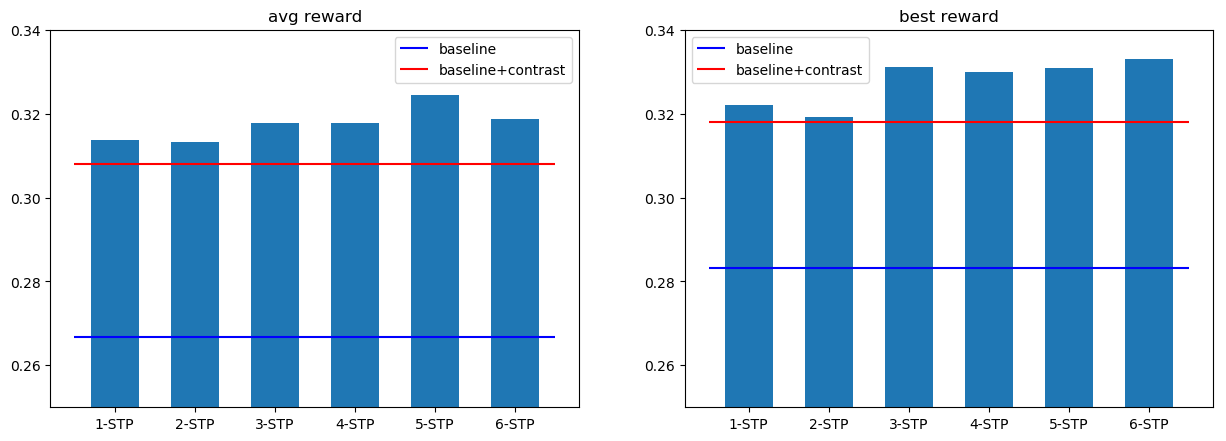

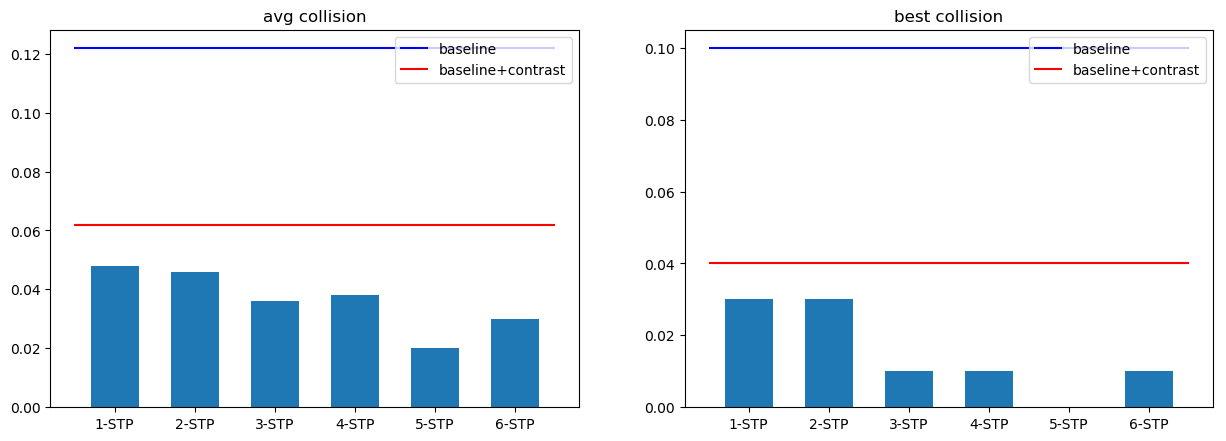

In [64]:
metrics = ['reward', 'collision']
for met in metrics :
    # baseline avg
    avg_base = np.mean([res[met] for res in results_base])
    avg_cont = np.mean([res[met] for res in results_cont])
    
    if met == 'reward' :
        max_base = max([res[met] for res in results_base])
        max_cont = max([res[met] for res in results_cont])
    else :
        max_base = min([res[met] for res in results_base])
        max_cont = min([res[met] for res in results_cont])
    
    x = range(6)
    x_names = ['{}-STP'.format(i+1) for i in x]
    avgs = []
    maxs = []
    for n in x :
        avg = np.mean([res[met] for res in results[n]])
        avgs.append(avg)
        if met=='reward' :
            mx = max([res[met] for res in results[n]])
        else :
            mx = min([res[met] for res in results[n]])
        maxs.append(mx)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=100)
    ax1.hlines(avg_base,  xmin=-0.5, xmax=5.5, label='baseline', colors='b')
    ax1.hlines(avg_cont, xmin=-0.5, xmax=5.5, label='baseline+contrast', colors='r')
    
    ax2.hlines(max_base,  xmin=-0.5, xmax=5.5, label='baseline', colors='b')
    ax2.hlines(max_cont, xmin=-0.5, xmax=5.5, label='baseline+contrast', colors='r')
    
    ax1.bar(x, avgs, width=0.6)
    ax2.bar(x, maxs, width=0.6)
    plt.sca(ax1)
    plt.xticks(x, x_names)
    plt.sca(ax2)
    plt.xticks(x, x_names)
    if met == 'reward' :
        ax1.set_ylim(0.25, 0.34)
        ax2.set_ylim(0.25, 0.34)
    ax1.set_title('avg {}'.format(met))
    ax2.set_title('best {}'.format(met))
    ax1.legend()
    ax2.legend()
    plt.show()

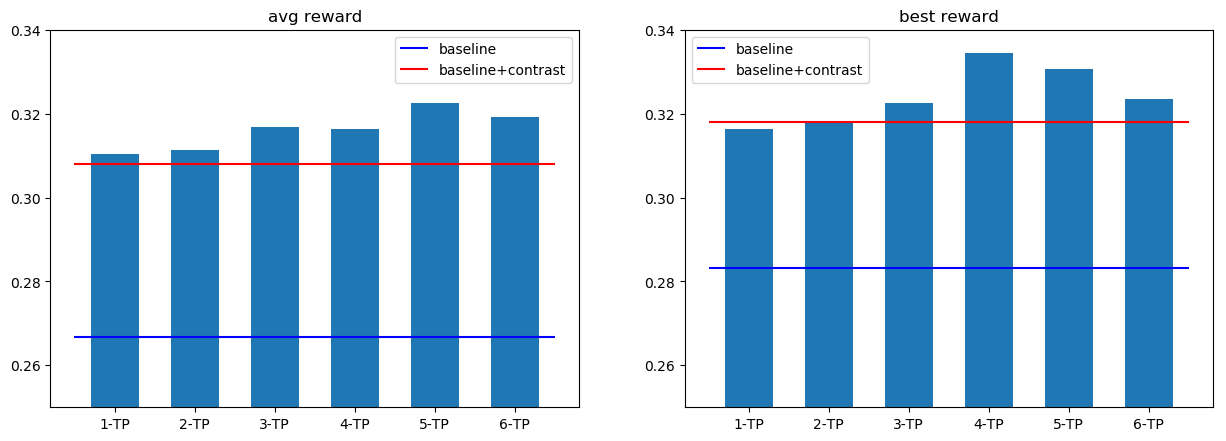

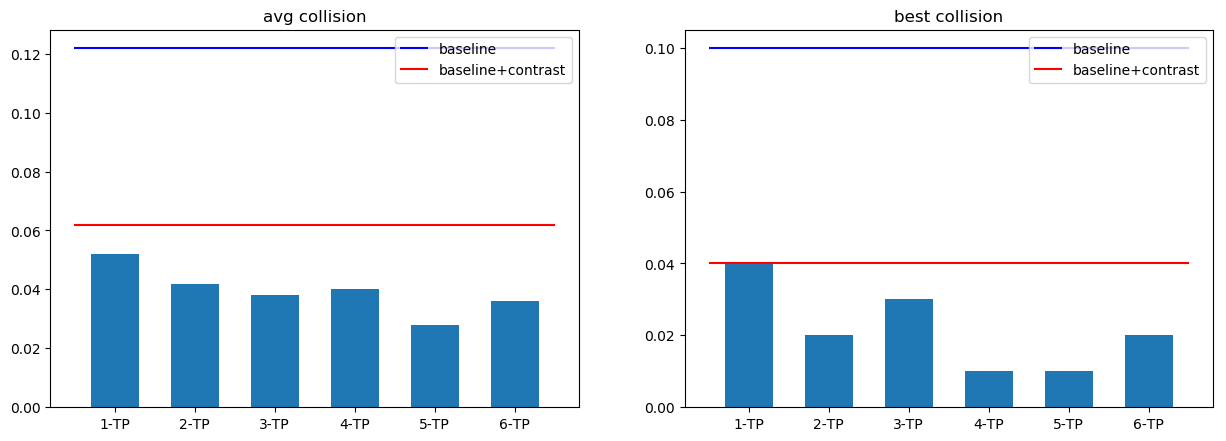

In [65]:
metrics = ['reward', 'collision']
for met in metrics :
    # baseline avg
    avg_base = np.mean([res[met] for res in results_base])
    avg_cont = np.mean([res[met] for res in results_cont])
    
    if met == 'reward' :
        max_base = max([res[met] for res in results_base])
        max_cont = max([res[met] for res in results_cont])
    else :
        max_base = min([res[met] for res in results_base])
        max_cont = min([res[met] for res in results_cont])
    
    x = range(6)
    x_names = ['{}-TP'.format(i+1) for i in x]
    avgs = []
    maxs = []
    for n in x :
        avg = np.mean([res[met] for res in results_traj[n]])
        avgs.append(avg)
        if met=='reward' :
            mx = max([res[met] for res in results_traj[n]])
        else :
            mx = min([res[met] for res in results_traj[n]])
        maxs.append(mx)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=100)
    ax1.hlines(avg_base,  xmin=-0.5, xmax=5.5, label='baseline', colors='b')
    ax1.hlines(avg_cont, xmin=-0.5, xmax=5.5, label='baseline+contrast', colors='r')
    
    ax2.hlines(max_base,  xmin=-0.5, xmax=5.5, label='baseline', colors='b')
    ax2.hlines(max_cont, xmin=-0.5, xmax=5.5, label='baseline+contrast', colors='r')
    
    ax1.bar(x, avgs, width=0.6)
    ax2.bar(x, maxs, width=0.6)
    plt.sca(ax1)
    plt.xticks(x, x_names)
    plt.sca(ax2)
    plt.xticks(x, x_names)
    if met == 'reward' :
        ax1.set_ylim(0.25, 0.34)
        ax2.set_ylim(0.25, 0.34)
    ax1.set_title('avg {}'.format(met))
    ax2.set_title('best {}'.format(met))
    ax1.legend()
    ax2.legend()
    plt.show()